# **Importing Important Libraries**



In [1]:
# importing required libraries
import numpy as np
import pandas as pd

import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer

# importing library for plotting
import matplotlib.pyplot as plt
#plt.rcParams.update({'font.size': 22})

import seaborn as sns

import joblib
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS # for feature selection

# importing library for support vector machine classifier
from sklearn.svm import SVC
# importing library for K-neares-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
# importing library for Linear Discriminant Analysis Model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# importing library for Quadratic Discriminant Analysis Model
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn import metrics
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from keras.layers import Dense # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.models import model_from_json # saving and loading trained model

from keras.layers import LSTM
from keras.layers import Input
from keras.models import Model

# representation of model layers
#from keras.utils.vis_utils import plot_model


#**Upload Dataset file on googel Colab**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving output_labled file.csv to output_labled file.csv



# **Exploring DataSet**

In [3]:
df = pd.read_csv('output_labled file.csv')
df.head()

address  balance  Total_tnx  \
0  0x000000000532b45f47779fce440748893b257865      0.0         23   
1  0x00000000072d54638c2c2a3da3f715360269eea1      0.0         53   
2  0x0000000009324b6434d7766af41908e4c49ee1d7      0.0         15   
3  0x0000000086c5d614bec59dfd2c9b88f7cb57f23c      0.0          6   
4  0x00000000bf02300fd6251627aa3db8933a0eee83      0.0         24   

   First_Tnx_Time  Last_Tnx_Time  Total_Success_Tnx  Total_Failed_Tnx  \
0      1594562749     1594683194                 23                 0   
1      1630132405     1630423837                 53                 0   
2      1594482934     1594552251                 15                 0   
3      1606864365     1606945633                  6                 0   
4      1594242737     1594375693                 24                 0   

   Active_Duration  First_Tnx_Bit  Last_Tnx_Bit  ...  Std_value_Out  \
0   1 day, 9:27:25              0             1  ...   1.190000e+15   
1  3 days, 8:57:12              0             1  ...   1.820000e+19   
2         19:15:17              0             1  ...   1.220000e+19   
3         22:34:28              0             1  ...   0.000000e+00   
4  1 day, 12:55:56              0             1  ...   1.040000e+19   

   Std_gasPrice_Out  Avg_gasUsed_Out  max_value_Out  min_value_Out  \
0      0.000000e+00      21000.00000   3.900000e+19   3.900000e+19   
1      4.815991e+10      71970.08696   8.200000e+19   0.000000e+00   
2      6.000000e+09      21000.00000   3.950000e+19   1.520000e+19   
3      0.000000e+00      21000.00000   6.050000e+19   6.050000e+19   
4      0.000000e+00      21000.00000   4.150000e+19   1.320000e+19   

    Tnx_fee_Out  mean_out_time  Per_Tnx_Out         Class  Unnamed: 51  
0  7.654500e+06     187.500000    13.043478  Phish / Hack          NaN  
1  3.831957e+09    7889.545454    43.396226  Phish / Hack          NaN  
2  3.515400e+07   13080.000000    40.000000  Phish / Hack          NaN  
3  6.090000e+05       0.000000    16.666667  Phish / Hack          NaN  
4  1.764000e+07   30782.333330    16.666667  Phish / Hack          NaN  

[5 rows x 52 columns]

**Find missing values**

In [4]:
# Find missing values in the DataFrame
missing_values = df.isnull()
missing_values

address  balance  Total_tnx  First_Tnx_Time  Last_Tnx_Time  \
0       False    False      False           False          False   
1       False    False      False           False          False   
2       False    False      False           False          False   
3       False    False      False           False          False   
4       False    False      False           False          False   
...       ...      ...        ...             ...            ...   
8557    False    False      False           False          False   
8558    False    False      False           False          False   
8559    False    False      False           False          False   
8560    False    False      False           False          False   
8561    False    False      False           False          False   

      Total_Success_Tnx  Total_Failed_Tnx  Active_Duration  First_Tnx_Bit  \
0                 False             False            False          False   
1                 False             False            False          False   
2                 False             False            False          False   
3                 False             False            False          False   
4                 False             False            False          False   
...                 ...               ...              ...            ...   
8557              False             False            False          False   
8558              False             False            False          False   
8559              False             False            False          False   
8560              False             False            False          False   
8561              False             False            False          False   

      Last_Tnx_Bit  ...  Std_value_Out  Std_gasPrice_Out  Avg_gasUsed_Out  \
0            False  ...          False             False            False   
1            False  ...          False             False            False   
2            False  ...          False             False            False   
3            False  ...          False             False            False   
4            False  ...          False             False            False   
...            ...  ...            ...               ...              ...   
8557         False  ...          False             False            False   
8558         False  ...          False             False            False   
8559         False  ...          False             False            False   
8560         False  ...          False             False            False   
8561         False  ...          False             False            False   

      max_value_Out  min_value_Out  Tnx_fee_Out  mean_out_time  Per_Tnx_Out  \
0             False          False        False          False        False   
1             False          False        False          False        False   
2             False          False        False          False        False   
3             False          False        False          False        False   
4             False          False        False          False        False   
...             ...            ...          ...            ...          ...   
8557          False          False        False          False        False   
8558          False          False        False          False        False   
8559          False          False        False          False        False   
8560          False          False        False          False        False   
8561          False          False        False          False        False   

      Class  Unnamed: 51  
0     False         True  
1     False         True  
2     False         True  
3     False         True  
4     False         True  
...     ...          ...  
8557  False         True  
8558  False         True  
8559  False         True  
8560  False         True  
8561  False         True  

[8562 rows x 52 columns]

In [5]:
# Count the number of missing values in each column
missing_values_count = df.isnull().sum()
missing_values_count

address                         0
balance                         0
Total_tnx                       0
First_Tnx_Time                  0
Last_Tnx_Time                   0
Total_Success_Tnx               0
Total_Failed_Tnx                0
Active_Duration                 0
First_Tnx_Bit                   0
Last_Tnx_Bit                    0
First_Tnx_Value                 0
Last_Tnx_Value                  0
distinct_address                0
Tnx_fee                         0
Tnx_Input                       0
value_In                        0
Unique_Tnx_Received_Count       0
Unique_Tnx_Received             0
Success_Tnx_In                  0
Failed_Tnx_In                   0
Avg_value_In                    0
gasPrice_In                     0
gasUsed_In                      0
Avg_gasPrice_In                 0
Std_value_In                    0
Std_gasPrice_In                 0
Avg_gasUsed_In                  0
max_value_In                    0
min_value_In                    0
Tnx_fee_In    

**Find dublication in the DataSet**

In [6]:
# Find duplicate rows in the DataFrame
duplicate_rows = df.duplicated()
duplicate_rows

0       False
1       False
2       False
3       False
4       False
        ...  
8557    False
8558    False
8559    False
8560    False
8561    False
Length: 8562, dtype: bool

In [7]:
# Show the duplicate rows in the DataFrame
duplicate_df = df[df.duplicated(keep=False)]

In [8]:
# Drop duplicate rows from the DataFrame
df_without_duplicates = df.drop_duplicates()

**Print all the information of the Dataset**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8562 entries, 0 to 8561
Data columns (total 52 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   address                    8562 non-null   object 
 1   balance                    8562 non-null   float64
 2   Total_tnx                  8562 non-null   int64  
 3   First_Tnx_Time             8562 non-null   int64  
 4   Last_Tnx_Time              8562 non-null   int64  
 5   Total_Success_Tnx          8562 non-null   int64  
 6   Total_Failed_Tnx           8562 non-null   int64  
 7   Active_Duration            8562 non-null   object 
 8   First_Tnx_Bit              8562 non-null   int64  
 9   Last_Tnx_Bit               8562 non-null   int64  
 10  First_Tnx_Value            8562 non-null   float64
 11  Last_Tnx_Value             8562 non-null   float64
 12  distinct_address           8562 non-null   int64  
 13  Tnx_fee                    8562 non-null   float

**Visualized all the columns of the dataset**

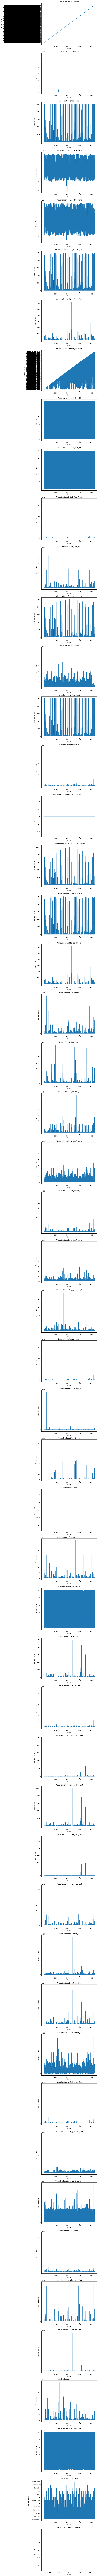

In [ ]:
# Get the names of all columns in the DataFrame
column_names = df.columns

# Calculate the number of rows and columns for subplots
num_rows = len(column_names)
num_cols = 1  # You can change this value to adjust the number of columns in the subplot

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5 * num_rows))

# If there is only one row, use single-dimensional axes array
if num_rows == 1:
    axes = [axes]

# Plot each column on its respective subplot
for i, col_name in enumerate(column_names):
    axes[i].plot(df[col_name])
    axes[i].set_xlabel('Index')
    axes[i].set_ylabel('Column Values')
    axes[i].set_title(f'Visualization of {col_name}')

# Adjust layout to avoid overlapping titles
plt.tight_layout()

# Display the plot
plt.show()


**Droping unnecessery column that have less information**

In [10]:

# Drop the columns in place (modify the original DataFrame)
df.drop(columns=['address', 'Unnamed: 51', 'timeDiff', 'Unique_Tnx_Received_Count', 'First_Tnx_Bit', 'Last_Tnx_Bit', 'Active_Duration' ], inplace=True)

**Describe Dataset**

In [11]:
df.describe()

balance     Total_tnx  First_Tnx_Time  Last_Tnx_Time  \
count  8.562000e+03   8562.000000    8.562000e+03   8.562000e+03   
mean   1.110242e+20    181.448026    1.581483e+09   1.591938e+09   
std    4.728892e+21   1060.611908    3.754325e+07   4.092242e+07   
min    0.000000e+00      1.000000    1.441633e+09   1.472709e+09   
25%    0.000000e+00      3.000000    1.547060e+09   1.575637e+09   
50%    0.000000e+00      8.000000    1.598155e+09   1.600962e+09   
75%    0.000000e+00     26.000000    1.603357e+09   1.605946e+09   
max    3.060000e+23  10000.000000    1.655825e+09   1.686648e+09   

       Total_Success_Tnx  Total_Failed_Tnx  First_Tnx_Value  Last_Tnx_Value  \
count        8562.000000       8562.000000     8.562000e+03    8.562000e+03   
mean          166.801098         10.288834     1.289271e+20    4.309344e+19   
std           995.504516        117.488882     5.248550e+21    4.664135e+20   
min             0.000000          0.000000     0.000000e+00    0.000000e+00   
25%             3.000000          0.000000     0.000000e+00    0.000000e+00   
50%             7.000000          0.000000     0.000000e+00    0.000000e+00   
75%            23.000000          0.000000     5.000000e+17    5.097500e+17   
max         10000.000000       6172.000000     3.420000e+23    1.530000e+22   

       distinct_address       Tnx_fee  ...   gasUsed_Out  Avg_gasPrice_Out  \
count       8562.000000  8.562000e+03  ...  8.562000e+03      8.562000e+03   
mean         109.217589  5.022922e+07  ...  2.815277e+06      5.645832e+10   
std          753.347579  8.752750e+07  ...  2.071390e+07      5.842538e+10   
min            2.000000  2.100000e-05  ...  0.000000e+00      0.000000e+00   
25%            4.000000  6.300000e+05  ...  8.400000e+04      2.100000e+10   
50%            7.000000  8.958069e+06  ...  9.333650e+05      4.100000e+10   
75%           17.000000  7.183985e+07  ...  1.675359e+06      7.500000e+10   
max         9989.000000  1.445941e+09  ...  8.943139e+08      8.640000e+11   

       Std_value_Out  Std_gasPrice_Out  Avg_gasUsed_Out  max_value_Out  \
count   8.562000e+03      8.562000e+03     8.562000e+03   8.562000e+03   
mean    3.572496e+19      9.094252e+09     7.676568e+05   1.541277e+20   
std     7.515034e+20      3.698229e+10     9.169091e+05   2.497474e+21   
min     0.000000e+00      0.000000e+00     0.000000e+00   0.000000e+00   
25%     0.000000e+00      0.000000e+00     2.100000e+04   0.000000e+00   
50%     0.000000e+00      0.000000e+00     4.156087e+05   0.000000e+00   
75%     2.475000e+17      4.714045e+09     1.229285e+06   5.957500e+18   
max     4.230000e+22      2.140000e+12     7.789555e+06   1.090000e+23   

       min_value_Out   Tnx_fee_Out  mean_out_time  Per_Tnx_Out  
count   8.562000e+03  8.562000e+03   8.562000e+03  8562.000000  
mean    2.368159e+19  1.251594e+11   7.272350e+05    37.947973  
std     2.602530e+20  5.629104e+12   5.299275e+06    32.470866  
min     0.000000e+00  0.000000e+00   0.000000e+00     0.000000  
25%     0.000000e+00  7.720062e+06   0.000000e+00    11.111111  
50%     0.000000e+00  5.603012e+07   0.000000e+00    33.333333  
75%     5.027500e+16  1.598303e+08   2.642369e+04    50.000000  
max     7.710000e+21  5.060000e+14   1.668996e+08   100.000000  

[8 rows x 44 columns]

**After droping columns dataset information**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8562 entries, 0 to 8561
Data columns (total 45 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   balance              8562 non-null   float64
 1   Total_tnx            8562 non-null   int64  
 2   First_Tnx_Time       8562 non-null   int64  
 3   Last_Tnx_Time        8562 non-null   int64  
 4   Total_Success_Tnx    8562 non-null   int64  
 5   Total_Failed_Tnx     8562 non-null   int64  
 6   First_Tnx_Value      8562 non-null   float64
 7   Last_Tnx_Value       8562 non-null   float64
 8   distinct_address     8562 non-null   int64  
 9   Tnx_fee              8562 non-null   float64
 10  Tnx_Input            8562 non-null   int64  
 11  value_In             8562 non-null   float64
 12  Unique_Tnx_Received  8562 non-null   int64  
 13  Success_Tnx_In       8562 non-null   int64  
 14  Failed_Tnx_In        8562 non-null   int64  
 15  Avg_value_In         8562 non-null   f

**Checking Dataset Uniqueness**

In [13]:
df.nunique()

balance                1340
Total_tnx               603
First_Tnx_Time         8281
Last_Tnx_Time          8140
Total_Success_Tnx       646
Total_Failed_Tnx        206
First_Tnx_Value        1310
Last_Tnx_Value         1896
distinct_address        503
Tnx_fee                5450
Tnx_Input               493
value_In               1803
Unique_Tnx_Received     394
Success_Tnx_In          550
Failed_Tnx_In           194
Avg_value_In           1913
gasPrice_In            2279
gasUsed_In             3432
Avg_gasPrice_In        4516
Std_value_In           1791
Std_gasPrice_In        5157
Avg_gasUsed_In         3040
max_value_In           1290
min_value_In           1075
Tnx_fee_In             6215
mean_in_time           5798
Per_Tnx_In             1191
Tnx_Output              304
value_Out              1943
Unique_Tnx_Sent         100
Success_Tnx_Out         296
Failed_Tnx_Out           55
Avg_value_Out          1968
gasPrice_Out           2103
gasUsed_Out            4231
Avg_gasPrice_Out    

**How many milicious acounts lables  in the trget column?**

In [14]:
df['Class'].value_counts()

Class
Scam Token         3954
Phish / Hack       3125
Upbit Hack          518
Phishing            448
Airdrop Hunting     136
Parity Bug          111
DAO                  69
Heist                66
Exploit              63
Ponzi                35
Gambling             28
Spam Token            5
Fraud Proof           4
Name: count, dtype: int64

**Grouping Labels due to the unbelancing of the milicious accounts labels.**

This code snippet categorizes malicious labels into different categories based on their relevance to specific types of attacks. It defines a function `categorize_label()` that takes a label as input and returns a corresponding category based on predefined criteria. The function is then applied to the 'Class' column of the DataFrame to create a new 'category' column, effectively organizing the data for further analysis or processing.

In [15]:
# Function to categorize labels based on the given criteria
def categorize_label(label):
    if label in ['Scam Token', 'Spam Token']:
        return 'Scams'
    elif label in ['Phishing', 'Phish / Hack']:
        return 'Phishing'
    elif label in ['Parity Bug', 'Upbit Hack']:
        return 'Hack and Security Breaches'
    else:
        return 'Suspecious'

# Apply the categorize_label function to create a new 'category' column
df['category'] = df['Class'].apply(categorize_label)


**Printing the labels of column "category" values after grouping.**

In [16]:
df['category'].value_counts()

category
Scams                         3959
Phishing                      3573
Hack and Security Breaches     629
Suspecious                     401
Name: count, dtype: int64

**visualising the column category**

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Replace 'target_column' with the actual name of your target column
target_column_name = 'category'
target_column = df[target_column_name]

# Get unique categories and their counts
categories = target_column.unique()
category_counts = [np.sum(target_column == cat) for cat in categories]

# Define colors for different categories
colors = ['blue', 'green', 'red', 'purple', 'orange']  # Add more colors if needed

# Create a histogram with colored bars
plt.figure(figsize=(8, 6))

# Loop through categories and colors to create histogram bars
for i, cat in enumerate(categories):
    plt.hist(target_column[target_column == cat], bins=2, alpha=0.9, color=colors[i], label=cat)  # Decreased bins to 5

# Add labels and title
plt.xlabel(target_column_name)
plt.ylabel('Frequency')
plt.title(f'Histogram of {target_column_name}')

# Create a legend for the colored bars
plt.legend()

# Show the histogram
plt.show()


In [18]:
import matplotlib.pyplot as plt

# Sample data
labels = df.category.unique()  # Get the unique category labels
values = df.category.value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%0.2f%%')
plt.title("Pie chart distribution of abnormal Accounts labels")

# Create a legend to the left and outside of the plot
plt.legend(labels, loc='center left', bbox_to_anchor=(0.99, 0.1))  # Adjust the values as needed

# Show the plot
plt.show()


**Label Encoding**

In [19]:
from sklearn.preprocessing import LabelEncoder

# Assuming your class data is stored in a list or pandas Series called 'class_data'
class_data = ['Scams', 'Hack and Security Breaches', 'Phishing', 'Suspecious' ]

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit the label encoder on the class data and transform it
encoded_class_data = label_encoder.fit_transform(class_data)

# Print the encoded class data
print(encoded_class_data)


[2 0 1 3]


**Droping the column Class**

In [20]:
df= df.drop('Class', axis=1)

# **Histogram of every column of Dataset**

In [22]:

# Create histograms for each column
df.hist(figsize=(20, 16))
plt.tight_layout()
plt.show()


 **Encoding classes data**

In [25]:
encoded_class_data

array([2, 0, 1, 3])

**Applying SMOTE for Data Balancing**

This code snippet showcases the application of SMOTE (Synthetic Minority Over-sampling Technique) for addressing class imbalance in datasets. By generating synthetic samples for the minority class, SMOTE enhances model training and improves performance on imbalanced datasets.

In [27]:
# SMOTE for balancing of my Target column "category"

In [28]:
import pandas as pd
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE


# Step 2: Separate features and target variable
X = df.drop('category', axis=1)
y = df['category']

# Step 3: Impute missing values in X
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Step 4: Create an instance of SMOTE
smote = SMOTE(sampling_strategy='minority', k_neighbors=3)


# Step 5: Perform oversampling using fit_resample
X_resampled, y_resampled = smote.fit_resample(X_imputed, y)

# Step 6: Create a new DataFrame with the oversampled data
df_oversampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='category')], axis=1)

# Step 6: Write the oversampled DataFrame to a new CSV file
df_oversampled.to_csv('oversampled_file.csv', index=False)


**Printing the head of oversampled file after SMOTE**

In [29]:
df11= pd.read_csv('oversampled_file.csv')
print(df11.head())
df11.head().T

   balance  Total_tnx  First_Tnx_Time  Last_Tnx_Time  Total_Success_Tnx  \
0      0.0       23.0    1.594563e+09   1.594683e+09               23.0   
1      0.0       53.0    1.630132e+09   1.630424e+09               53.0   
2      0.0       15.0    1.594483e+09   1.594552e+09               15.0   
3      0.0        6.0    1.606864e+09   1.606946e+09                6.0   
4      0.0       24.0    1.594243e+09   1.594376e+09               24.0   

   Total_Failed_Tnx  First_Tnx_Value  Last_Tnx_Value  distinct_address  \
0               0.0     1.000000e+16    3.900000e+19              24.0   
1               0.0     2.080000e+20    2.380000e+17              45.0   
2               0.0     5.010000e+18    1.520000e+19              13.0   
3               0.0     5.000000e+18    6.050000e+19               7.0   
4               0.0     2.860000e+16    2.640000e+19              19.0   

       Tnx_fee  ...  Avg_gasPrice_Out  Std_value_Out  Std_gasPrice_Out  \
0   840000.000  ...      4.050

0                        1  \
balance                                  0.0                      0.0   
Total_tnx                               23.0                     53.0   
First_Tnx_Time                  1594562749.0             1630132405.0   
Last_Tnx_Time                   1594683194.0             1630423837.0   
Total_Success_Tnx                       23.0                     53.0   
Total_Failed_Tnx                         0.0                      0.0   
First_Tnx_Value          10000000000000000.0  208000000000000000000.0   
Last_Tnx_Value        39000000000000000000.0     238000000000000000.0   
distinct_address                        24.0                     45.0   
Tnx_fee                             840000.0              2122180.421   
Tnx_Input                                0.0                     30.0   
value_In                                 0.0  215000000000000000000.0   
Unique_Tnx_Received                      0.0                     26.0   
Success_Tnx_In                           0.0                     30.0   
Failed_Tnx_In                            0.0                      0.0   
Avg_value_In                             0.0    7170000000000000000.0   
gasPrice_In                              0.0          3580000000000.0   
gasUsed_In                               0.0                 630000.0   
Avg_gasPrice_In                          0.0           119000000000.0   
Std_value_In                             0.0   37300000000000000000.0   
Std_gasPrice_In                          0.0            31908943358.0   
Avg_gasUsed_In                           0.0                  21000.0   
max_value_In                             0.0  208000000000000000000.0   
min_value_In                             0.0       4310000000000000.0   
Tnx_fee_In                               0.0             2257529494.0   
mean_in_time                             0.0              9731.448275   
Per_Tnx_In                               0.0                56.603774   
Tnx_Output                               3.0                     23.0   
value_Out            117000000000000000000.0  216000000000000000000.0   
Unique_Tnx_Sent                          0.0                      0.0   
Success_Tnx_Out                          3.0                     23.0   
Failed_Tnx_Out                           0.0                      0.0   
Avg_value_Out         39000000000000000000.0    9390000000000000000.0   
gasPrice_Out                  122000000000.0          2310000000000.0   
gasUsed_Out                          63000.0                1655312.0   
Avg_gasPrice_Out               40500000000.0           101000000000.0   
Std_value_Out             1190000000000000.0   18200000000000000000.0   
Std_gasPrice_Out                         0.0            48159908250.0   
Avg_gasUsed_Out                      21000.0              71970.08696   
max_value_Out         39000000000000000000.0   82000000000000000000.0   
min_value_Out         39000000000000000000.0                      0.0   
Tnx_fee_Out                        7654500.0             3831956726.0   
mean_out_time                          187.5              7889.545454   
Per_Tnx_Out                        13.043478                43.396226   
category                            Phishing                 Phishing   

                                           2                       3  \
balance                                  0.0                     0.0   
Total_tnx                               15.0                     6.0   
First_Tnx_Time                  1594482934.0            1606864365.0   
Last_Tnx_Time                   1594552251.0            1606945633.0   
Total_Success_Tnx                       15.0                     6.0   
Total_Failed_Tnx                         0.0                     0.0   
First_Tnx_Value        5010000000000000000.0   5000000000000000000.0   
Last_Tnx_Value        15200000000000000000.0  60500000000000000000.0   
distinct_address                    

In [33]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12120 entries, 0 to 12119
Data columns (total 45 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   balance              12120 non-null  float64
 1   Total_tnx            12120 non-null  float64
 2   First_Tnx_Time       12120 non-null  float64
 3   Last_Tnx_Time        12120 non-null  float64
 4   Total_Success_Tnx    12120 non-null  float64
 5   Total_Failed_Tnx     12120 non-null  float64
 6   First_Tnx_Value      12120 non-null  float64
 7   Last_Tnx_Value       12120 non-null  float64
 8   distinct_address     12120 non-null  float64
 9   Tnx_fee              12120 non-null  float64
 10  Tnx_Input            12120 non-null  float64
 11  value_In             12120 non-null  float64
 12  Unique_Tnx_Received  12120 non-null  float64
 13  Success_Tnx_In       12120 non-null  float64
 14  Failed_Tnx_In        12120 non-null  float64
 15  Avg_value_In         12120 non-null 

**Target Column after Sampling**

In [34]:
df11['category'].value_counts()

category
Scams                         3959
Suspecious                    3959
Phishing                      3573
Hack and Security Breaches     629
Name: count, dtype: int64

**Lable Encoding after SMOTE**

In [35]:
from sklearn.preprocessing import LabelEncoder

# Assuming your DataFrame is called 'df'
label_encoder = LabelEncoder()
df11['category'] = label_encoder.fit_transform(df11['category'])


In [36]:
df11

balance     Total_tnx  First_Tnx_Time  Last_Tnx_Time  \
0      0.000000e+00     23.000000    1.594563e+09   1.594683e+09   
1      0.000000e+00     53.000000    1.630132e+09   1.630424e+09   
2      0.000000e+00     15.000000    1.594483e+09   1.594552e+09   
3      0.000000e+00      6.000000    1.606864e+09   1.606946e+09   
4      0.000000e+00     24.000000    1.594243e+09   1.594376e+09   
...             ...           ...             ...            ...   
12115  0.000000e+00  10000.000000    1.532509e+09   1.533460e+09   
12116  0.000000e+00   1988.242230    1.551760e+09   1.602630e+09   
12117  8.714500e+14   2259.108384    1.591372e+09   1.634064e+09   
12118  1.694215e+16     52.228574    1.647122e+09   1.649554e+09   
12119  0.000000e+00   9778.170126    1.535499e+09   1.542322e+09   

       Total_Success_Tnx  Total_Failed_Tnx  First_Tnx_Value  Last_Tnx_Value  \
0              23.000000          0.000000     1.000000e+16    3.900000e+19   
1              53.000000          0.000000     2.080000e+20    2.380000e+17   
2              15.000000          0.000000     5.010000e+18    1.520000e+19   
3               6.000000          0.000000     5.000000e+18    6.050000e+19   
4              24.000000          0.000000     2.860000e+16    2.640000e+19   
...                  ...               ...              ...             ...   
12115        9571.637747        428.362253     0.000000e+00    0.000000e+00   
12116        1913.340217         74.902013     0.000000e+00    0.000000e+00   
12117        1937.767050        321.341334     1.330458e+16    0.000000e+00   
12118          51.935067          0.293507     3.724468e+17    4.719375e+16   
12119        9333.361711        444.808415     0.000000e+00    0.000000e+00   

       distinct_address       Tnx_fee  ...  Avg_gasPrice_Out  Std_value_Out  \
0             24.000000  8.400000e+05  ...      4.050000e+10   1.190000e+15   
1             45.000000  2.122180e+06  ...      1.010000e+11   1.820000e+19   
2             13.000000  1.050000e+06  ...      4.650000e+10   1.220000e+19   
3              7.000000  2.520000e+06  ...      2.900000e+10   0.000000e+00   
4             19.000000  9.817500e+05  ...      5.250000e+10   1.040000e+19   
...                 ...           ...  ...               ...            ...   
12115       9424.957416  8.811763e+06  ...      6.529299e+09   0.000000e+00   
12116       1879.897476  1.356940e+07  ...      4.715860e+09   0.000000e+00   
12117       1030.522665  2.696334e+06  ...      9.326527e+10   5.158546e+17   
12118         16.228574  1.591569e+06  ...      7.475394e+10   4.867092e+19   
12119       8188.985901  3.148768e+06  ...      2.552871e+09   0.000000e+00   

       Std_gasPrice_Out  Avg_gasUsed_Out  max_value_Out  min_value_Out  \
0          0.000000e+00     2.100000e+04   3.900000e+19   3.900000e+19   
1          4.815991e+10     7.197009e+04   8.200000e+19   0.000000e+00   
2          6.000000e+09     2.100000e+04   3.950000e+19   1.520000e+19   
3          0.000000e+00     2.100000e+04   6.050000e+19   6.050000e+19   
4          0.000000e+00     2.100000e+04   4.150000e+19   1.320000e+19   
...                 ...              ...            ...            ...   
12115      0.000000e+00     1.563362e+06   0.000000e+00   0.000000e+00   
12116      0.000000e+00     2.878711e+06   0.000000e+00   0.000000e+00   
12117      3.249989e+10     1.112113e+05   7.656603e+18   0.000000e+00   
12118      2.145407e+10     3.443260e+05   2.027274e+20   0.000000e+00   
12119      0.000000e+00     1.131275e+06   0.000000e+00   0.000000e+00   

        Tnx_fee_Out  mean_out_time  Per_Tnx_Out  category  
0      7.654500e+06     187.500000    13.043478         1  
1      3.831957e+09    7889.545454    43.396226         1  
2      3.515400e+07   13080.000000    40.000000         1  
3      6.090000e+05       0.000000    16.666667         1  
4      1.764000e+07   30782.333330    16.666667         1  
...             ...            ...          ... 

**Checking Overestimation**

In [37]:


# Calculate proportions of classes in the original dataset
original_proportions = df['category'].value_counts(normalize=True)
print("Original Class Proportions:")
print(original_proportions)

# Calculate proportions of classes in the resampled dataset
new_proportions = y_resampled.value_counts(normalize=True)
print("\nNew Class Proportions after SMOTE:")
print(new_proportions)

# Compare proportions of the minority class before and after SMOTE
minority_class = df11['category'].value_counts().idxmin()  # Assuming the class of interest is the minority class
original_minority_proportion = original_proportions[minority_class]
new_minority_proportion = new_proportions[minority_class]

print(f"\nProportion of {minority_class} class in the original dataset: {original_minority_proportion:.2f}")
print(f"Proportion of {minority_class} class in the resampled dataset: {new_minority_proportion:.2f}")

# Check if there's a significant difference in proportions
if new_minority_proportion > original_minority_proportion:
    print("\nWarning: Potential overestimation after SMOTE!")
else:
    print("\nNo significant overestimation detected.")

Original Class Proportions:
category
Scams                         0.462392
Phishing                      0.417309
Hack and Security Breaches    0.073464
Suspecious                    0.046835
Name: proportion, dtype: float64

New Class Proportions after SMOTE:
category
Scams                         0.326650
Suspecious                    0.326650
Phishing                      0.294802
Hack and Security Breaches    0.051898
Name: proportion, dtype: float64

Proportion of 0 class in the original dataset: 0.46
Proportion of 0 class in the resampled dataset: 0.33

No significant overestimation detected.


# **Applying Features Selection Techniques and Machine Learning Models for Selecting Features.**

## **1. Ridge Regression**
**.  Select Top 20 Features**

**.  Results with 60:40 traning and testing ration.**

Selected Features:
Index(['Failed_Tnx_Out', 'Last_Tnx_Value', 'First_Tnx_Value', 'mean_out_time',
       'min_value_Out', 'Unique_Tnx_Sent', 'gasUsed_In', 'value_In',
       'Per_Tnx_Out', 'Per_Tnx_In', 'Total_Success_Tnx', 'max_value_In',
       'Success_Tnx_In', 'Success_Tnx_Out', 'gasUsed_Out', 'Last_Tnx_Time',
       'Tnx_Output', 'Total_tnx', 'Avg_gasUsed_Out', 'Tnx_Input'],
      dtype='object')
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM AUC values: {0: 0.9979006596978907, 1: 0.9930619946624215, 2: 0.9978354948865246, 3: 0.9975364144193968}
LightGBM Execution Time: 15.696797132492065 seconds
LightGBM Accuracy: 0.9727722772277227
LightGBM 10-Fold Cross-Validation Accuracy: 0.9701611318530163
LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       263
           1       0.98      0.95    

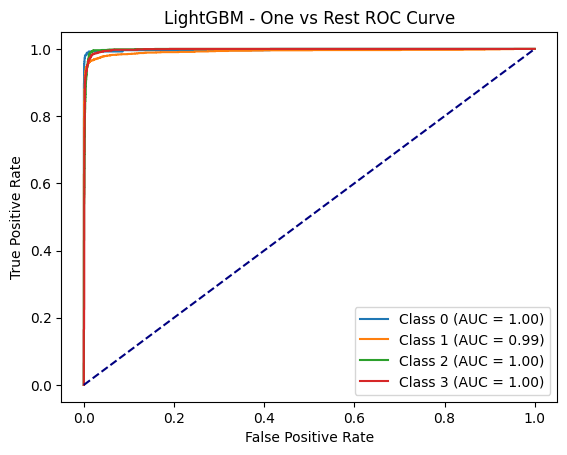

XGBoost AUC values: {0: 0.9981652022838567, 1: 0.9928510036538845, 2: 0.9976469935644852, 3: 0.9976057891769515}
XGBoost Execution Time: 14.936190128326416 seconds
XGBoost Accuracy: 0.9735973597359736
XGBoost 10-Fold Cross-Validation Accuracy: 0.9689237344498693
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       263
           1       0.98      0.95      0.97      1467
           2       0.97      0.99      0.98      1565
           3       0.97      0.98      0.97      1553

    accuracy                           0.97      4848
   macro avg       0.98      0.97      0.97      4848
weighted avg       0.97      0.97      0.97      4848



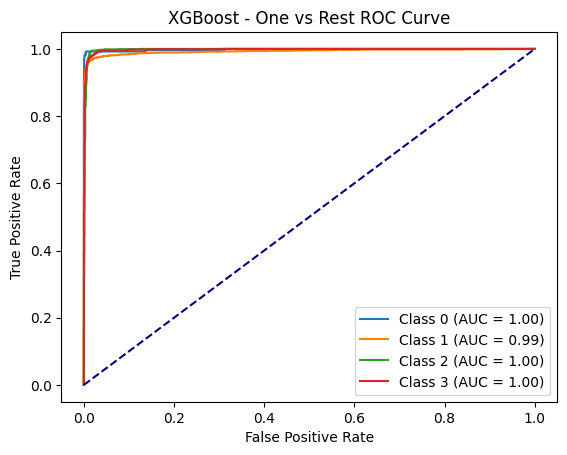

RandomForest AUC values: {0: 0.99883360768915, 1: 0.9897378529966268, 2: 0.9971421175403545, 3: 0.9973849624838899}
RandomForest Execution Time: 55.89211177825928 seconds
RandomForest Accuracy: 0.9657590759075908
RandomForest 10-Fold Cross-Validation Accuracy: 0.9639730111703976
RandomForest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       263
           1       0.97      0.94      0.96      1467
           2       0.97      0.98      0.97      1565
           3       0.96      0.98      0.97      1553

    accuracy                           0.97      4848
   macro avg       0.97      0.96      0.96      4848
weighted avg       0.97      0.97      0.97      4848



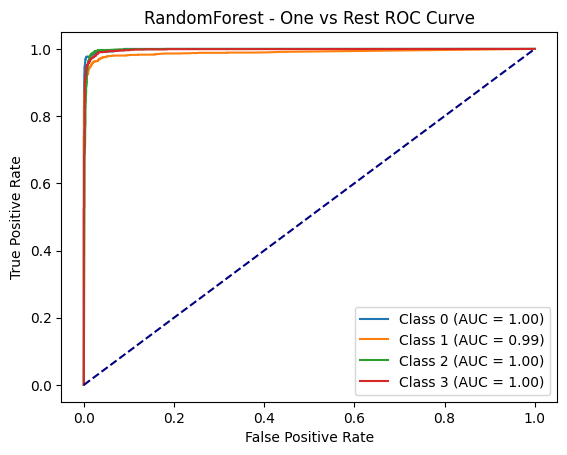

ExtraTrees AUC values: {0: 0.9988186805212899, 1: 0.9889522567570046, 2: 0.9944211588598055, 3: 0.9972549092412062}
ExtraTrees Execution Time: 25.286052465438843 seconds
ExtraTrees Accuracy: 0.9639026402640264
ExtraTrees 10-Fold Cross-Validation Accuracy: 0.9639724443369561
ExtraTrees Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       263
           1       0.97      0.94      0.95      1467
           2       0.96      0.98      0.97      1565
           3       0.96      0.98      0.97      1553

    accuracy                           0.96      4848
   macro avg       0.97      0.96      0.96      4848
weighted avg       0.96      0.96      0.96      4848



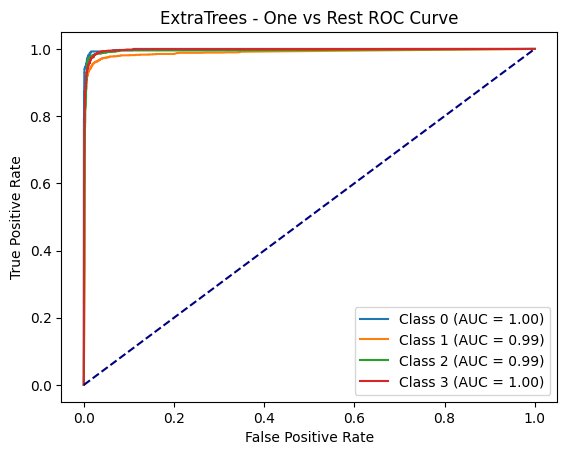

Bagging AUC values: {0: 0.9916387127805582, 1: 0.9898719275505468, 2: 0.9960259016581693, 3: 0.9951195346614854}
Bagging Execution Time: 222.70812344551086 seconds
Bagging Accuracy: 0.9649339933993399
Bagging 10-Fold Cross-Validation Accuracy: 0.9643858548604077
Bagging Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       263
           1       0.97      0.94      0.96      1467
           2       0.97      0.98      0.97      1565
           3       0.96      0.97      0.97      1553

    accuracy                           0.96      4848
   macro avg       0.97      0.96      0.96      4848
weighted avg       0.96      0.96      0.96      4848



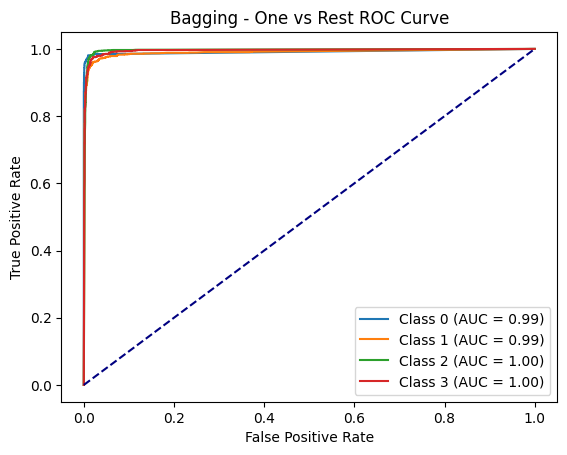

KNeighbors AUC values: {0: 0.9002168585775239, 1: 0.9248209701473429, 2: 0.9821453143748557, 3: 0.9332000230597786}
KNeighbors Execution Time: 2.8866446018218994 seconds
KNeighbors Accuracy: 0.8407590759075908
KNeighbors 10-Fold Cross-Validation Accuracy: 0.8437869386459484
KNeighbors Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.59      0.69       263
           1       0.84      0.75      0.79      1467
           2       0.94      0.94      0.94      1565
           3       0.75      0.86      0.81      1553

    accuracy                           0.84      4848
   macro avg       0.84      0.79      0.81      4848
weighted avg       0.84      0.84      0.84      4848



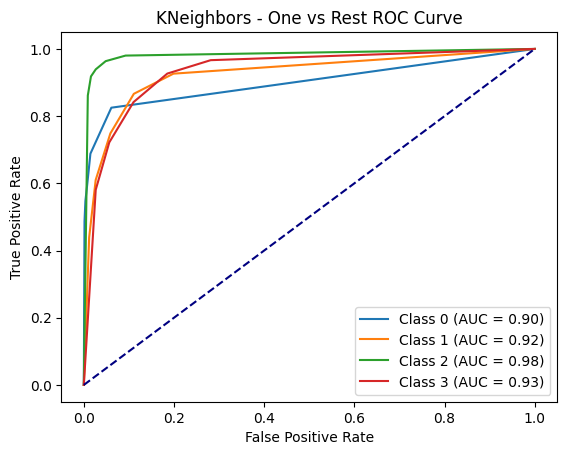

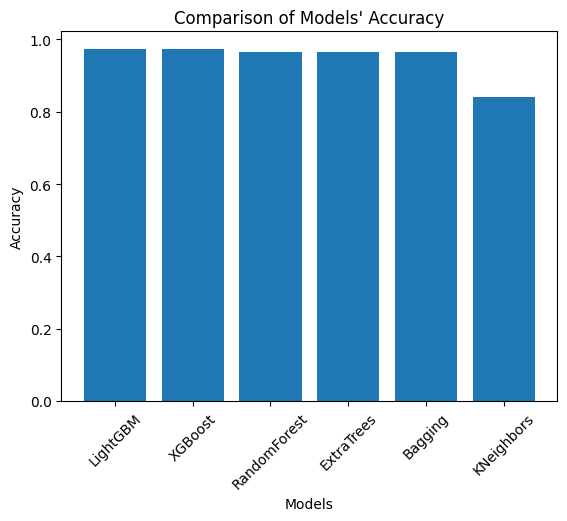

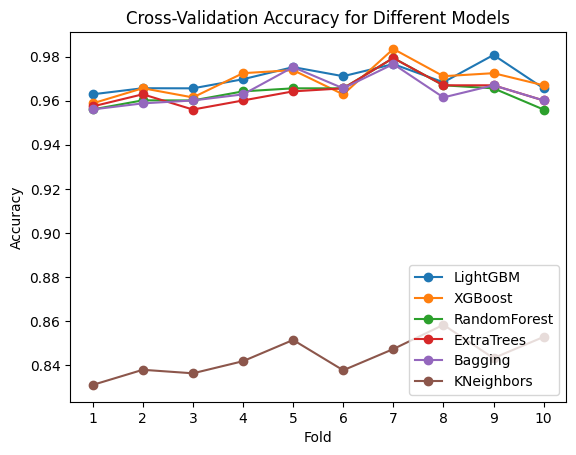

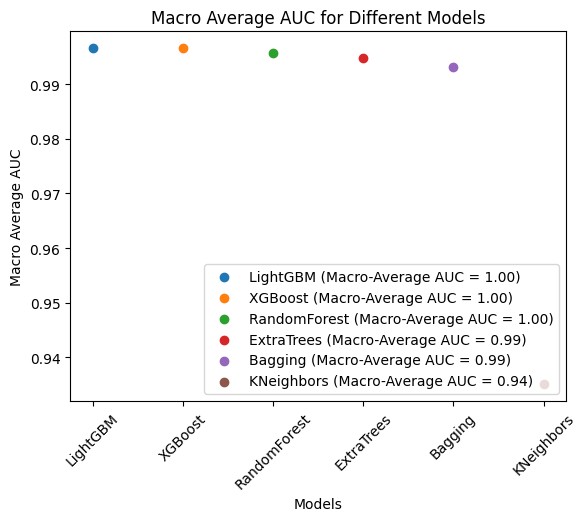

In [42]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc, classification_report
import lightgbm as lgb
import xgboost as xgb

# Separate features (X) and the target variable (y)
X = df11.drop('category', axis=1)  # Replace 'category' with the name of your target column
y = df11['category']
feature_names = X.columns  # Store feature names

# Apply feature scaling (optional but recommended for Ridge Regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform Ridge Regression for feature selection
alpha_value = 1.0  # You can adjust the alpha value as per your requirements
ridge = Ridge(alpha=alpha_value)
ridge.fit(X_scaled, y)

# Get the absolute values of the coefficients for feature importance
feature_importance = np.abs(ridge.coef_)

# Sort the features based on their importance
top_20_indices = np.argsort(feature_importance)[-20:]

# Get the top 20 features
X_selected = X.iloc[:, top_20_indices]

# Get the column names of the selected features
selected_feature_names = feature_names[top_20_indices]

print("Selected Features:")
print(selected_feature_names)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.4, random_state=42)

algorithms = {
    "LightGBM": lgb.LGBMClassifier(verbosity=0),
    "XGBoost": xgb.XGBClassifier(),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "ExtraTrees": ExtraTreesClassifier(n_estimators=100, random_state=42),
    "Bagging": BaggingClassifier(n_estimators=100, random_state=42),
    "KNeighbors": KNeighborsClassifier(),
}

accuracy_values = {}
cv_accuracy_values = {}
auc_values = {}

for alg_name, clf in algorithms.items():
    start_time = time.time()

    # Train the classifier using the one-vs-rest approach with selected features
    clf_ovr = OneVsRestClassifier(clf)
    clf_ovr.fit(X_train, y_train)

    # Calculate accuracy
    y_pred = clf_ovr.predict(X_test)
    accuracy = np.mean(y_pred == y_test)
    accuracy_values[alg_name] = accuracy

    # Calculate cross-validation accuracy with 10-fold
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    cross_val_acc = cross_val_score(clf_ovr, X_train, y_train, cv=cv, scoring='accuracy')
    cv_accuracy_values[alg_name] = cross_val_acc

    # Predict probabilities for each class
    y_score = clf_ovr.predict_proba(X_test)

    # Set zero probabilities to a small value to avoid division by zero
    y_score[y_score == 0] = 1e-10

    # Calculate AUC for each class
    auc_values[alg_name] = {}
    for i in range(4):
        y_true = (y_test == i).astype(int)
        auc_values[alg_name][i] = roc_auc_score(y_true, y_score[:, i])

    end_time = time.time()

    # Print AUC values, execution time, and cross-validation accuracy
    print(f"{alg_name} AUC values:", auc_values[alg_name])
    print(f"{alg_name} Execution Time:", end_time - start_time, "seconds")
    print(f"{alg_name} Accuracy:", accuracy)
    print(f"{alg_name} 10-Fold Cross-Validation Accuracy:", np.mean(cv_accuracy_values[alg_name]))

    # Print Classification Report
    print(f"{alg_name} Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plot ROC curve
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(4):
        y_true = (y_test == i).astype(int)
        fpr[i], tpr[i], _ = roc_curve(y_true, y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    for i in range(4):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{alg_name} - One vs Rest ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

# Comparison graph 1: Models' Accuracy
plt.figure()
plt.bar(accuracy_values.keys(), accuracy_values.values())
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Models\' Accuracy')
plt.xticks(rotation=45)  # Rotate the x-axis labels to avoid overlapping
plt.show()

# Comparison graph 2: Cross-Validation Accuracy
plt.figure()
for alg_name, accuracy_scores in cv_accuracy_values.items():
    plt.plot(range(1, 11), accuracy_scores, marker='o', label=alg_name)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy for Different Models')
plt.legend(loc='lower right')
plt.xticks(range(1, 11))  # Set explicit x-axis ticks
plt.show()

# Comparison graph 3: Macro Average AUC
plt.figure()
for alg_name, roc_auc in auc_values.items():
    macro_auc = np.mean(list(roc_auc.values()))
    plt.scatter(alg_name, macro_auc, marker='o', label=f'{alg_name} (Macro-Average AUC = {macro_auc:.2f})')
plt.xlabel('Models')
plt.ylabel('Macro Average AUC')
plt.title('Macro Average AUC for Different Models')
plt.legend(loc='lower right')
plt.xticks(rotation=45)  # Rotate the x-axis labels to avoid overlapping
plt.show()


## **1. Redige Regression**
**Results with 70:30 traning and testing ration.**

Selected Features:
Index(['Failed_Tnx_Out', 'Last_Tnx_Value', 'First_Tnx_Value', 'mean_out_time',
       'min_value_Out', 'Unique_Tnx_Sent', 'gasUsed_In', 'value_In',
       'Per_Tnx_Out', 'Per_Tnx_In', 'Total_Success_Tnx', 'max_value_In',
       'Success_Tnx_In', 'Success_Tnx_Out', 'gasUsed_Out', 'Last_Tnx_Time',
       'Tnx_Output', 'Total_tnx', 'Avg_gasUsed_Out', 'Tnx_Input'],
      dtype='object')
LightGBM AUC values: {0: 0.9974240299205236, 1: 0.9927403353814644, 2: 0.9976593983021712, 3: 0.99726456119723}
LightGBM Execution Time: 15.405266523361206 seconds
LightGBM Accuracy: 0.9744224422442245
LightGBM 10-Fold Cross-Validation Accuracy: 0.971594634086717
LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       186
           1       0.99      0.95      0.97      1116
           2       0.97      0.99      0.98      1159
           3       0.97      0.98      0.97      1175

    accuracy               

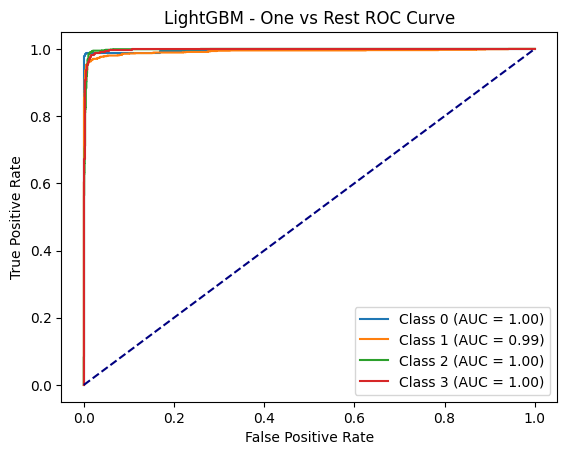

XGBoost AUC values: {0: 0.9976203833567088, 1: 0.9922121237981454, 2: 0.9976856971976524, 3: 0.9975588542972499}
XGBoost Execution Time: 14.343514680862427 seconds
XGBoost Accuracy: 0.9744224422442245
XGBoost 10-Fold Cross-Validation Accuracy: 0.9720649432184368
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       186
           1       0.98      0.96      0.97      1116
           2       0.97      0.99      0.98      1159
           3       0.97      0.98      0.97      1175

    accuracy                           0.97      3636
   macro avg       0.98      0.98      0.98      3636
weighted avg       0.97      0.97      0.97      3636



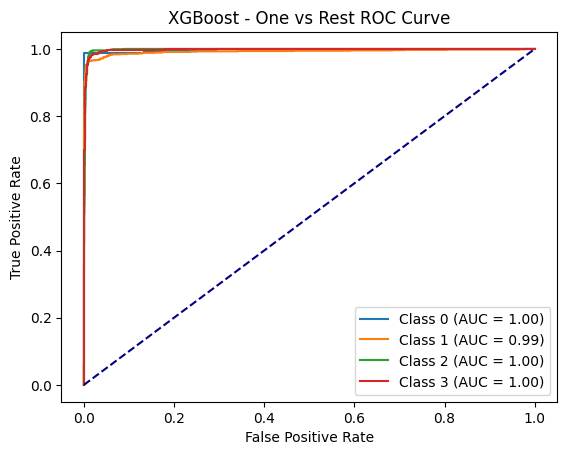

RandomForest AUC values: {0: 0.9991826398628643, 1: 0.9905341497411391, 2: 0.9971295887653907, 3: 0.997833089818185}
RandomForest Execution Time: 63.930519580841064 seconds
RandomForest Accuracy: 0.9686468646864687
RandomForest 10-Fold Cross-Validation Accuracy: 0.9671148909927328
RandomForest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       186
           1       0.98      0.94      0.96      1116
           2       0.97      0.99      0.98      1159
           3       0.96      0.98      0.97      1175

    accuracy                           0.97      3636
   macro avg       0.97      0.97      0.97      3636
weighted avg       0.97      0.97      0.97      3636



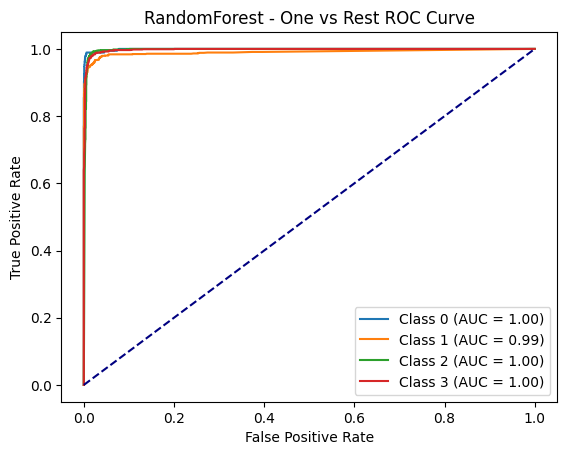

ExtraTrees AUC values: {0: 0.9986138382421693, 1: 0.9898189039654091, 2: 0.9948710187216786, 3: 0.9972673277598624}
ExtraTrees Execution Time: 28.055822372436523 seconds
ExtraTrees Accuracy: 0.9678217821782178
ExtraTrees 10-Fold Cross-Validation Accuracy: 0.964050520034669
ExtraTrees Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       186
           1       0.98      0.94      0.96      1116
           2       0.97      0.98      0.97      1159
           3       0.96      0.98      0.97      1175

    accuracy                           0.97      3636
   macro avg       0.96      0.97      0.96      3636
weighted avg       0.97      0.97      0.97      3636



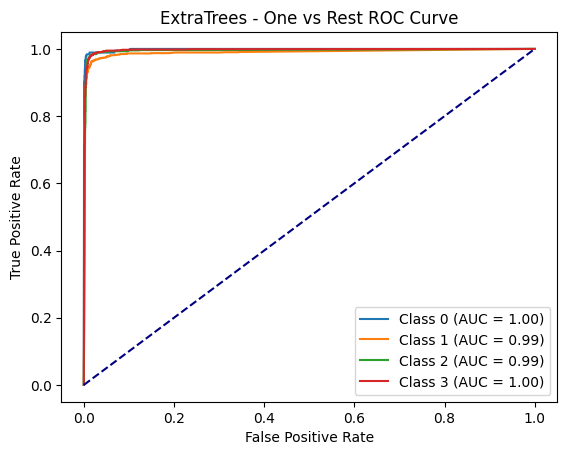

Bagging AUC values: {0: 0.9913362942184822, 1: 0.9901446136997212, 2: 0.9961175167015404, 3: 0.9965104999697407}
Bagging Execution Time: 268.32786893844604 seconds
Bagging Accuracy: 0.9691969196919692
Bagging 10-Fold Cross-Validation Accuracy: 0.9653472731515433
Bagging Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       186
           1       0.97      0.95      0.96      1116
           2       0.97      0.98      0.98      1159
           3       0.96      0.97      0.97      1175

    accuracy                           0.97      3636
   macro avg       0.97      0.97      0.97      3636
weighted avg       0.97      0.97      0.97      3636



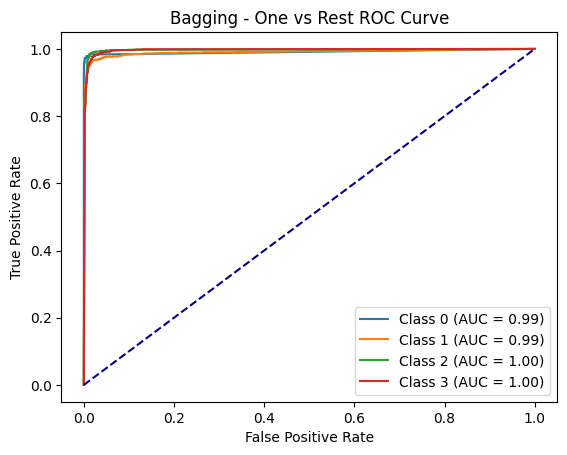

KNeighbors AUC values: {0: 0.9113191522518311, 1: 0.9294861537805086, 2: 0.9828045281473072, 3: 0.9360023169962046}
KNeighbors Execution Time: 3.0260579586029053 seconds
KNeighbors Accuracy: 0.844059405940594
KNeighbors 10-Fold Cross-Validation Accuracy: 0.84182042691735
KNeighbors Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.62      0.71       186
           1       0.86      0.75      0.80      1116
           2       0.93      0.94      0.94      1159
           3       0.76      0.88      0.81      1175

    accuracy                           0.84      3636
   macro avg       0.84      0.80      0.81      3636
weighted avg       0.85      0.84      0.84      3636



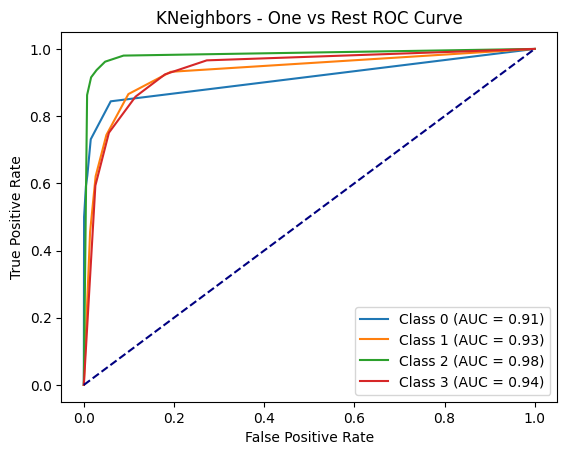

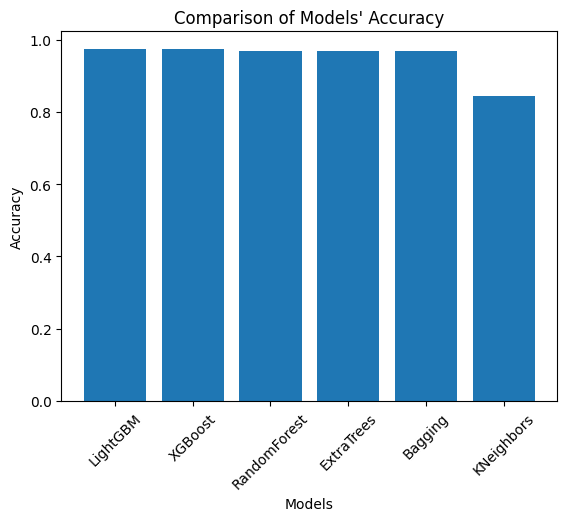

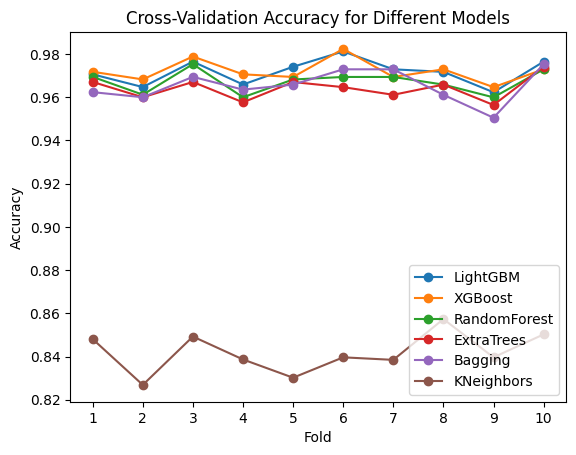

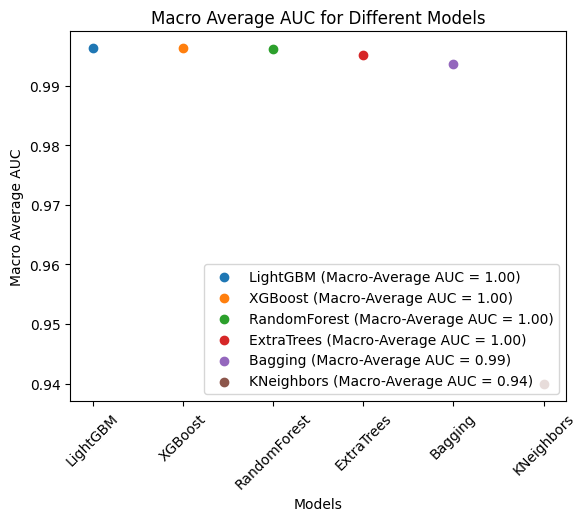

In [43]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc, classification_report
import lightgbm as lgb
import xgboost as xgb

# Separate features (X) and the target variable (y)
X = df11.drop('category', axis=1)  # Replace 'category' with the name of your target column
y = df11['category']
feature_names = X.columns  # Store feature names

# Apply feature scaling (optional but recommended for Ridge Regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform Ridge Regression for feature selection
alpha_value = 1.0  # You can adjust the alpha value as per your requirements
ridge = Ridge(alpha=alpha_value)
ridge.fit(X_scaled, y)

# Get the absolute values of the coefficients for feature importance
feature_importance = np.abs(ridge.coef_)

# Sort the features based on their importance
top_20_indices = np.argsort(feature_importance)[-20:]

# Get the top 20 features
X_selected = X.iloc[:, top_20_indices]

# Get the column names of the selected features
selected_feature_names = feature_names[top_20_indices]

print("Selected Features:")
print(selected_feature_names)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

algorithms = {
    "LightGBM": lgb.LGBMClassifier(verbosity=0),
    "XGBoost": xgb.XGBClassifier(),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "ExtraTrees": ExtraTreesClassifier(n_estimators=100, random_state=42),
    "Bagging": BaggingClassifier(n_estimators=100, random_state=42),
    "KNeighbors": KNeighborsClassifier(),
}

accuracy_values = {}
cv_accuracy_values = {}
auc_values = {}

for alg_name, clf in algorithms.items():
    start_time = time.time()

    # Train the classifier using the one-vs-rest approach with selected features
    clf_ovr = OneVsRestClassifier(clf)
    clf_ovr.fit(X_train, y_train)

    # Calculate accuracy
    y_pred = clf_ovr.predict(X_test)
    accuracy = np.mean(y_pred == y_test)
    accuracy_values[alg_name] = accuracy

    # Calculate cross-validation accuracy with 10-fold
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    cross_val_acc = cross_val_score(clf_ovr, X_train, y_train, cv=cv, scoring='accuracy')
    cv_accuracy_values[alg_name] = cross_val_acc

    # Predict probabilities for each class
    y_score = clf_ovr.predict_proba(X_test)

    # Set zero probabilities to a small value to avoid division by zero
    y_score[y_score == 0] = 1e-10

    # Calculate AUC for each class
    auc_values[alg_name] = {}
    for i in range(4):
        y_true = (y_test == i).astype(int)
        auc_values[alg_name][i] = roc_auc_score(y_true, y_score[:, i])

    end_time = time.time()

    # Print AUC values, execution time, and cross-validation accuracy
    print(f"{alg_name} AUC values:", auc_values[alg_name])
    print(f"{alg_name} Execution Time:", end_time - start_time, "seconds")
    print(f"{alg_name} Accuracy:", accuracy)
    print(f"{alg_name} 10-Fold Cross-Validation Accuracy:", np.mean(cv_accuracy_values[alg_name]))

    # Print Classification Report
    print(f"{alg_name} Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plot ROC curve
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(4):
        y_true = (y_test == i).astype(int)
        fpr[i], tpr[i], _ = roc_curve(y_true, y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    for i in range(4):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{alg_name} - One vs Rest ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

# Comparison graph 1: Models' Accuracy
plt.figure()
plt.bar(accuracy_values.keys(), accuracy_values.values())
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Models\' Accuracy')
plt.xticks(rotation=45)  # Rotate the x-axis labels to avoid overlapping
plt.show()

# Comparison graph 2: Cross-Validation Accuracy
plt.figure()
for alg_name, accuracy_scores in cv_accuracy_values.items():
    plt.plot(range(1, 11), accuracy_scores, marker='o', label=alg_name)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy for Different Models')
plt.legend(loc='lower right')
plt.xticks(range(1, 11))  # Set explicit x-axis ticks
plt.show()

# Comparison graph 3: Macro Average AUC
plt.figure()
for alg_name, roc_auc in auc_values.items():
    macro_auc = np.mean(list(roc_auc.values()))
    plt.scatter(alg_name, macro_auc, marker='o', label=f'{alg_name} (Macro-Average AUC = {macro_auc:.2f})')
plt.xlabel('Models')
plt.ylabel('Macro Average AUC')
plt.title('Macro Average AUC for Different Models')
plt.legend(loc='lower right')
plt.xticks(rotation=45)  # Rotate the x-axis labels to avoid overlapping
plt.show()


## **1. Redige Regression**
**Results with 80:20 traning and testing ration.**

Selected Features:
Index(['Failed_Tnx_Out', 'Last_Tnx_Value', 'First_Tnx_Value', 'mean_out_time',
       'min_value_Out', 'Unique_Tnx_Sent', 'gasUsed_In', 'value_In',
       'Per_Tnx_Out', 'Per_Tnx_In', 'Total_Success_Tnx', 'max_value_In',
       'Success_Tnx_In', 'Success_Tnx_Out', 'gasUsed_Out', 'Last_Tnx_Time',
       'Tnx_Output', 'Total_tnx', 'Avg_gasUsed_Out', 'Tnx_Input'],
      dtype='object')
LightGBM AUC values: {0: 0.9994215717383257, 1: 0.992182205267103, 2: 0.9971307228939396, 3: 0.9965718385426414}
LightGBM Execution Time: 16.45620632171631 seconds
LightGBM Accuracy: 0.9735973597359736
LightGBM 10-Fold Cross-Validation Accuracy: 0.9741136042045684
LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       132
           1       0.98      0.95      0.97       747
           2       0.97      0.99      0.98       765
           3       0.97      0.98      0.97       780

    accuracy              

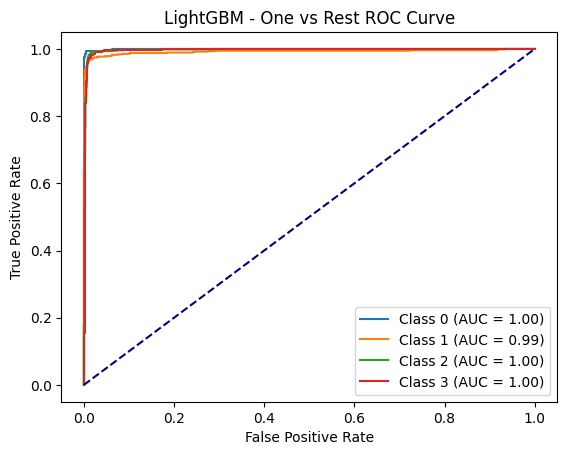

XGBoost AUC values: {0: 0.994225633296314, 1: 0.9920955936646606, 2: 0.9976141230050388, 3: 0.9970444194896748}
XGBoost Execution Time: 15.343431949615479 seconds
XGBoost Accuracy: 0.974009900990099
XGBoost 10-Fold Cross-Validation Accuracy: 0.9747316289510921
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       132
           1       0.98      0.95      0.97       747
           2       0.97      0.99      0.98       765
           3       0.97      0.98      0.97       780

    accuracy                           0.97      2424
   macro avg       0.98      0.97      0.98      2424
weighted avg       0.97      0.97      0.97      2424



RandomForest AUC values: {0: 0.9994364456079117, 1: 0.9897411151263771, 2: 0.9968435194049491, 3: 0.997545464470647}
RandomForest Execution Time: 72.97776246070862 seconds
RandomForest Accuracy: 0.9665841584158416
RandomForest 10-Fold Cross-Validation Accuracy: 0.9680283638143266
RandomForest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       132
           1       0.97      0.94      0.95       747
           2       0.97      0.99      0.98       765
           3       0.96      0.98      0.97       780

    accuracy                           0.97      2424
   macro avg       0.97      0.96      0.96      2424
weighted avg       0.97      0.97      0.97      2424



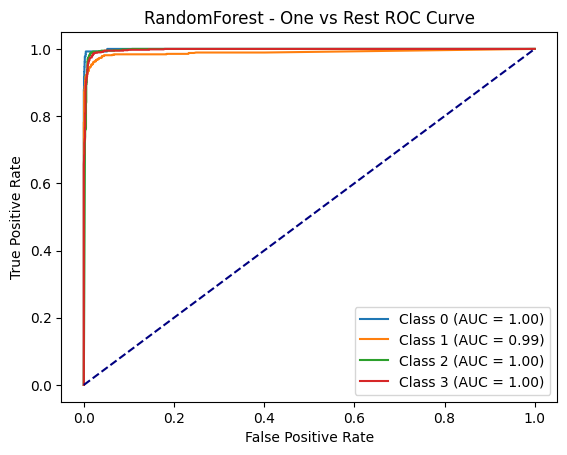

ExtraTrees AUC values: {0: 0.9991042625204929, 1: 0.9892809161511879, 2: 0.9958061987101451, 3: 0.9972136440202134}
ExtraTrees Execution Time: 30.89384150505066 seconds
ExtraTrees Accuracy: 0.966996699669967
ExtraTrees 10-Fold Cross-Validation Accuracy: 0.9660676858915027
ExtraTrees Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       132
           1       0.97      0.94      0.96       747
           2       0.97      0.98      0.97       765
           3       0.96      0.98      0.97       780

    accuracy                           0.97      2424
   macro avg       0.97      0.96      0.96      2424
weighted avg       0.97      0.97      0.97      2424



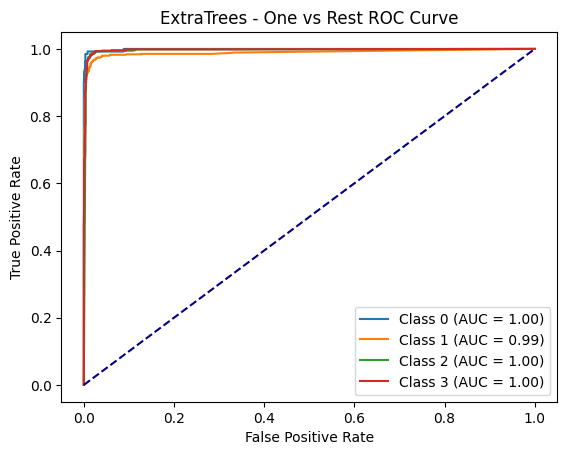

Bagging AUC values: {0: 0.9918441615103919, 1: 0.9880667571897609, 2: 0.9936732498906736, 3: 0.9955740376817019}
Bagging Execution Time: 317.29181027412415 seconds
Bagging Accuracy: 0.9678217821782178
Bagging 10-Fold Cross-Validation Accuracy: 0.9677188726820083
Bagging Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       132
           1       0.97      0.95      0.96       747
           2       0.97      0.99      0.98       765
           3       0.97      0.97      0.97       780

    accuracy                           0.97      2424
   macro avg       0.97      0.97      0.97      2424
weighted avg       0.97      0.97      0.97      2424



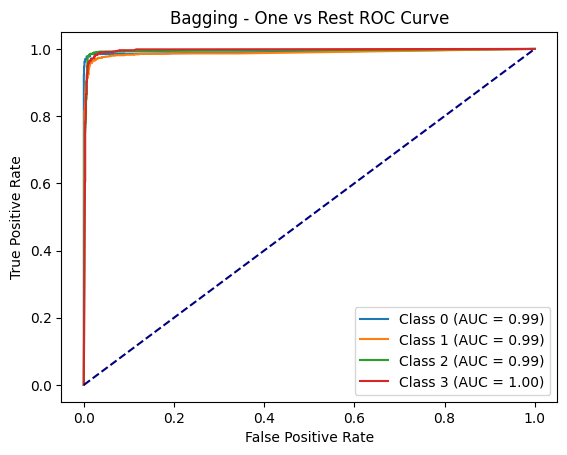

KNeighbors AUC values: {0: 0.9292714448146386, 1: 0.9288383907324788, 2: 0.9818293562150598, 3: 0.9360857664233576}
KNeighbors Execution Time: 3.132413387298584 seconds
KNeighbors Accuracy: 0.8444719471947195
KNeighbors 10-Fold Cross-Validation Accuracy: 0.8502479971912802
KNeighbors Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.67      0.74       132
           1       0.86      0.74      0.80       747
           2       0.94      0.94      0.94       765
           3       0.75      0.88      0.81       780

    accuracy                           0.84      2424
   macro avg       0.85      0.81      0.82      2424
weighted avg       0.85      0.84      0.84      2424



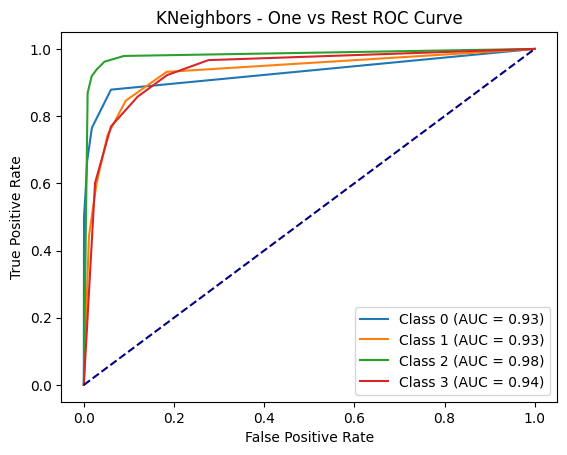

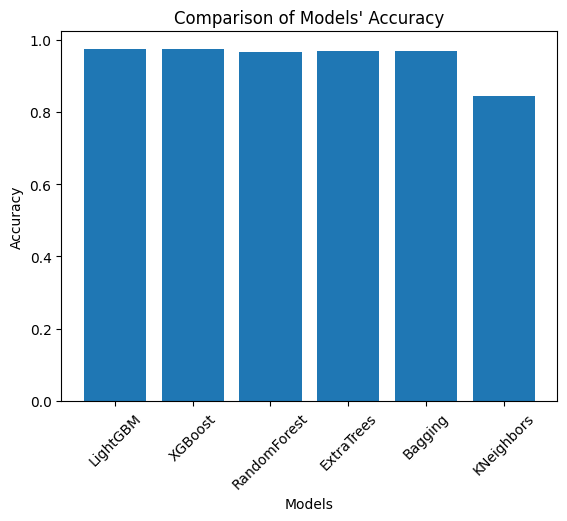

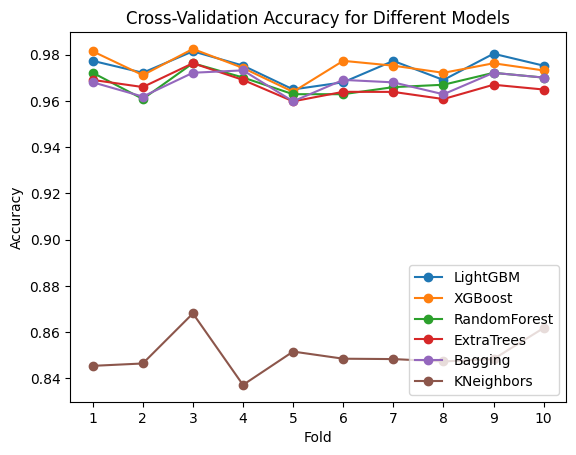

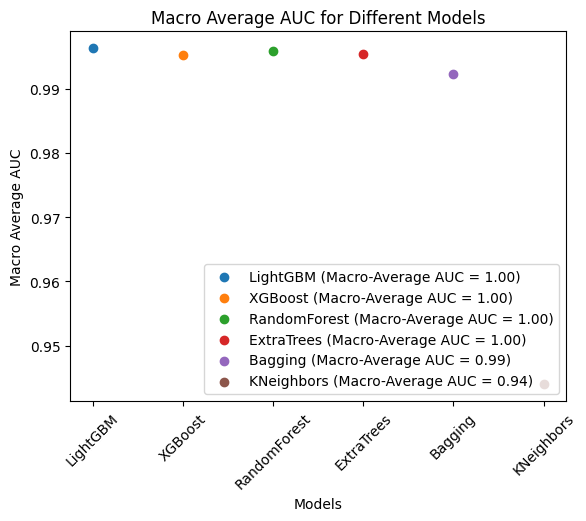

In [44]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc, classification_report
import lightgbm as lgb
import xgboost as xgb

# Separate features (X) and the target variable (y)
X = df11.drop('category', axis=1)  # Replace 'category' with the name of your target column
y = df11['category']
feature_names = X.columns  # Store feature names

# Apply feature scaling (optional but recommended for Ridge Regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform Ridge Regression for feature selection
alpha_value = 1.0  # You can adjust the alpha value as per your requirements
ridge = Ridge(alpha=alpha_value)
ridge.fit(X_scaled, y)

# Get the absolute values of the coefficients for feature importance
feature_importance = np.abs(ridge.coef_)

# Sort the features based on their importance
top_20_indices = np.argsort(feature_importance)[-20:]

# Get the top 20 features
X_selected = X.iloc[:, top_20_indices]

# Get the column names of the selected features
selected_feature_names = feature_names[top_20_indices]

print("Selected Features:")
print(selected_feature_names)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

algorithms = {
    "LightGBM": lgb.LGBMClassifier(verbosity=0),
    "XGBoost": xgb.XGBClassifier(),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "ExtraTrees": ExtraTreesClassifier(n_estimators=100, random_state=42),
    "Bagging": BaggingClassifier(n_estimators=100, random_state=42),
    "KNeighbors": KNeighborsClassifier(),
}

accuracy_values = {}
cv_accuracy_values = {}
auc_values = {}

for alg_name, clf in algorithms.items():
    start_time = time.time()

    # Train the classifier using the one-vs-rest approach with selected features
    clf_ovr = OneVsRestClassifier(clf)
    clf_ovr.fit(X_train, y_train)

    # Calculate accuracy
    y_pred = clf_ovr.predict(X_test)
    accuracy = np.mean(y_pred == y_test)
    accuracy_values[alg_name] = accuracy

    # Calculate cross-validation accuracy with 10-fold
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    cross_val_acc = cross_val_score(clf_ovr, X_train, y_train, cv=cv, scoring='accuracy')
    cv_accuracy_values[alg_name] = cross_val_acc

    # Predict probabilities for each class
    y_score = clf_ovr.predict_proba(X_test)

    # Set zero probabilities to a small value to avoid division by zero
    y_score[y_score == 0] = 1e-10

    # Calculate AUC for each class
    auc_values[alg_name] = {}
    for i in range(4):
        y_true = (y_test == i).astype(int)
        auc_values[alg_name][i] = roc_auc_score(y_true, y_score[:, i])

    end_time = time.time()

    # Print AUC values, execution time, and cross-validation accuracy
    print(f"{alg_name} AUC values:", auc_values[alg_name])
    print(f"{alg_name} Execution Time:", end_time - start_time, "seconds")
    print(f"{alg_name} Accuracy:", accuracy)
    print(f"{alg_name} 10-Fold Cross-Validation Accuracy:", np.mean(cv_accuracy_values[alg_name]))

    # Print Classification Report
    print(f"{alg_name} Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plot ROC curve
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(4):
        y_true = (y_test == i).astype(int)
        fpr[i], tpr[i], _ = roc_curve(y_true, y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    for i in range(4):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{alg_name} - One vs Rest ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

# Comparison graph 1: Models' Accuracy
plt.figure()
plt.bar(accuracy_values.keys(), accuracy_values.values())
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Models\' Accuracy')
plt.xticks(rotation=45)  # Rotate the x-axis labels to avoid overlapping
plt.show()

# Comparison graph 2: Cross-Validation Accuracy
plt.figure()
for alg_name, accuracy_scores in cv_accuracy_values.items():
    plt.plot(range(1, 11), accuracy_scores, marker='o', label=alg_name)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy for Different Models')
plt.legend(loc='lower right')
plt.xticks(range(1, 11))  # Set explicit x-axis ticks
plt.show()

# Comparison graph 3: Macro Average AUC
plt.figure()
for alg_name, roc_auc in auc_values.items():
    macro_auc = np.mean(list(roc_auc.values()))
    plt.scatter(alg_name, macro_auc, marker='o', label=f'{alg_name} (Macro-Average AUC = {macro_auc:.2f})')
plt.xlabel('Models')
plt.ylabel('Macro Average AUC')
plt.title('Macro Average AUC for Different Models')
plt.legend(loc='lower right')
plt.xticks(rotation=45)  # Rotate the x-axis labels to avoid overlapping
plt.show()


# **2. PCA**
**Result with top 20 features with 60:40 traning an testing ratio.**

LightGBM AUC values: {0: 0.9973160122900349, 1: 0.9881609144650716, 2: 0.9958484943736685, 3: 0.9940399266386366}
LightGBM Execution Time: 18.900254011154175 seconds
LightGBM Accuracy: 0.9568894389438944
LightGBM 10-Fold Cross-Validation Accuracy: 0.9551721662106807
LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       263
           1       0.97      0.93      0.95      1467
           2       0.97      0.97      0.97      1565
           3       0.94      0.97      0.96      1553

    accuracy                           0.96      4848
   macro avg       0.96      0.95      0.95      4848
weighted avg       0.96      0.96      0.96      4848



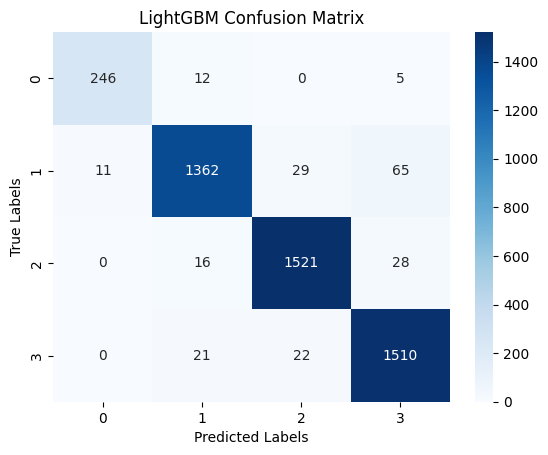

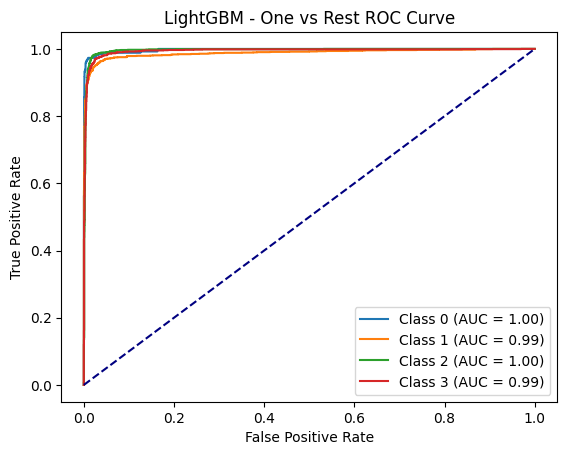

XGBoost AUC values: {0: 0.9972446935991474, 1: 0.9880288560698575, 2: 0.9959825959853208, 3: 0.9947053380456056}
XGBoost Execution Time: 20.221890687942505 seconds
XGBoost Accuracy: 0.9608085808580858
XGBoost 10-Fold Cross-Validation Accuracy: 0.9550334809619541
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       263
           1       0.97      0.94      0.95      1467
           2       0.97      0.97      0.97      1565
           3       0.95      0.98      0.96      1553

    accuracy                           0.96      4848
   macro avg       0.96      0.96      0.96      4848
weighted avg       0.96      0.96      0.96      4848



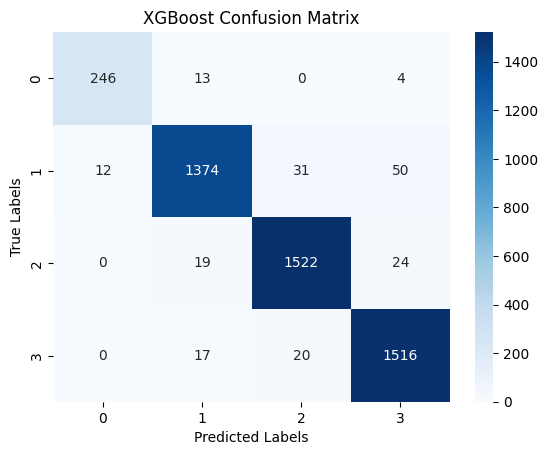

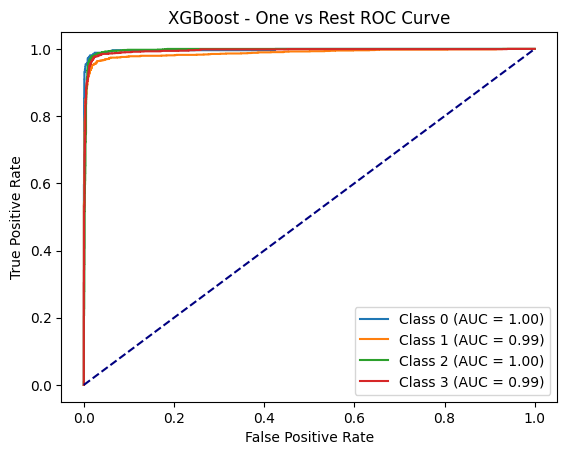

RandomForest AUC values: {0: 0.994517168316257, 1: 0.9899067062882175, 2: 0.9958733099839525, 3: 0.9949199112393947}
RandomForest Execution Time: 114.22664427757263 seconds
RandomForest Accuracy: 0.9533828382838284
RandomForest 10-Fold Cross-Validation Accuracy: 0.9500844581828076
RandomForest Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       263
           1       0.96      0.93      0.95      1467
           2       0.97      0.96      0.97      1565
           3       0.93      0.97      0.95      1553

    accuracy                           0.95      4848
   macro avg       0.96      0.94      0.95      4848
weighted avg       0.95      0.95      0.95      4848



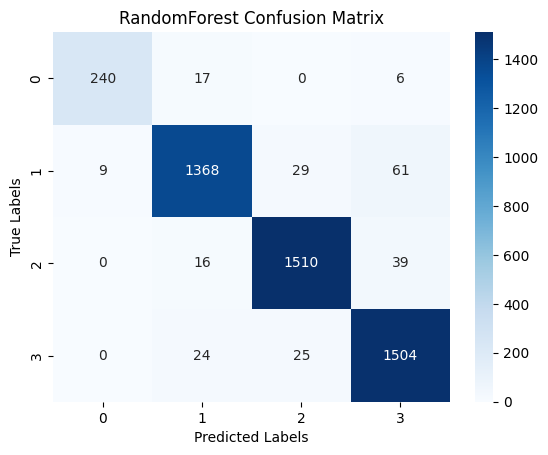

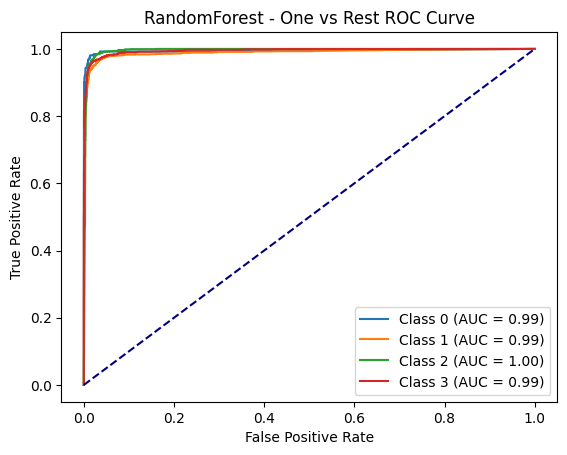

ExtraTrees AUC values: {0: 0.9967919028407228, 1: 0.9887503384626428, 2: 0.9936091531648661, 3: 0.9959719647810739}
ExtraTrees Execution Time: 28.8131206035614 seconds
ExtraTrees Accuracy: 0.9645214521452146
ExtraTrees 10-Fold Cross-Validation Accuracy: 0.9562723899209455
ExtraTrees Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       263
           1       0.97      0.94      0.96      1467
           2       0.97      0.97      0.97      1565
           3       0.95      0.98      0.97      1553

    accuracy                           0.96      4848
   macro avg       0.96      0.96      0.96      4848
weighted avg       0.96      0.96      0.96      4848



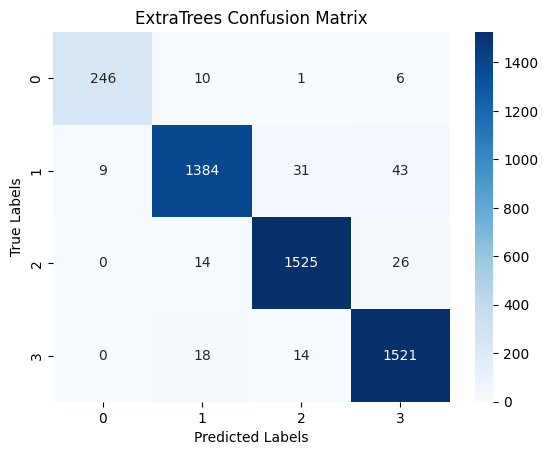

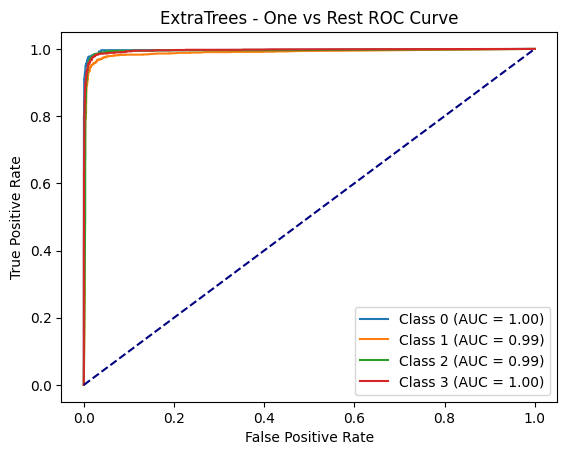

Bagging AUC values: {0: 0.9918920599906291, 1: 0.98802794879844, 2: 0.9945898076936177, 3: 0.9909762982606479}
Bagging Execution Time: 538.1833639144897 seconds
Bagging Accuracy: 0.9500825082508251
Bagging 10-Fold Cross-Validation Accuracy: 0.9498091660746407
Bagging Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       263
           1       0.95      0.93      0.94      1467
           2       0.97      0.96      0.96      1565
           3       0.93      0.97      0.95      1553

    accuracy                           0.95      4848
   macro avg       0.95      0.94      0.94      4848
weighted avg       0.95      0.95      0.95      4848



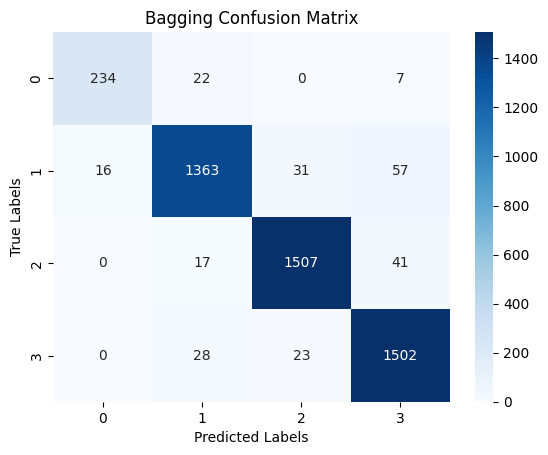

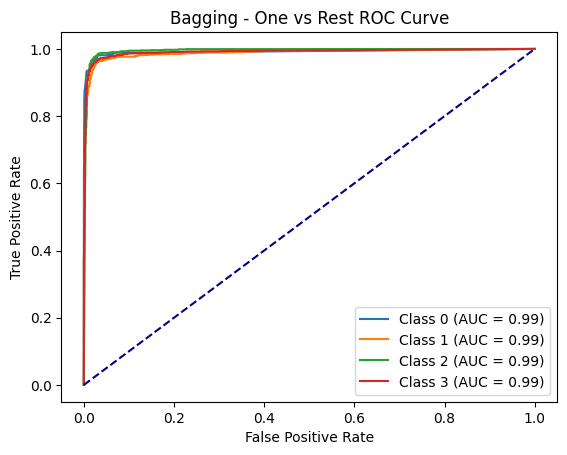

KNeighbors AUC values: {0: 0.9828312690995186, 1: 0.9771187156585167, 2: 0.9901772029206514, 3: 0.9883592088150889}
KNeighbors Execution Time: 3.2520196437835693 seconds
KNeighbors Accuracy: 0.9428630363036303
KNeighbors 10-Fold Cross-Validation Accuracy: 0.943482171198815
KNeighbors Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       263
           1       0.96      0.89      0.93      1467
           2       0.95      0.97      0.96      1565
           3       0.92      0.97      0.94      1553

    accuracy                           0.94      4848
   macro avg       0.93      0.94      0.93      4848
weighted avg       0.94      0.94      0.94      4848



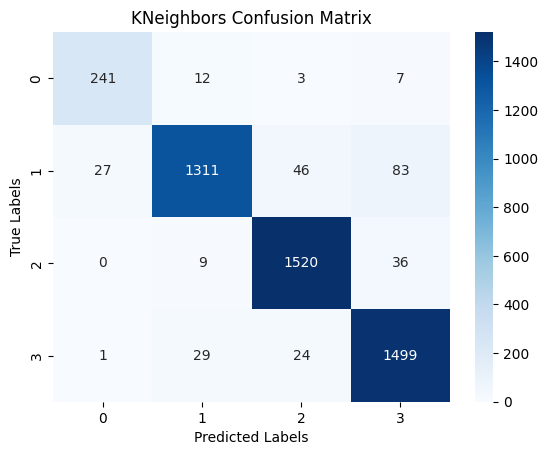

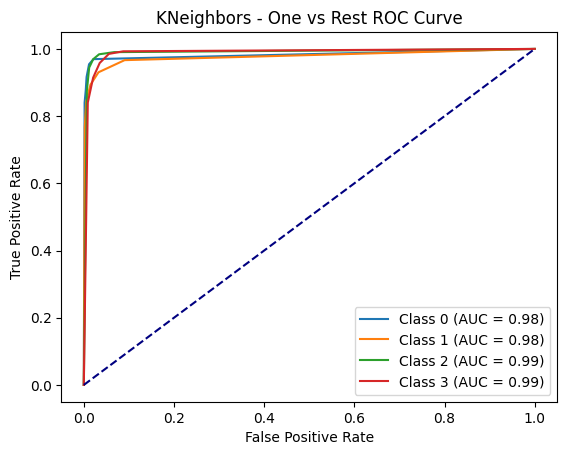

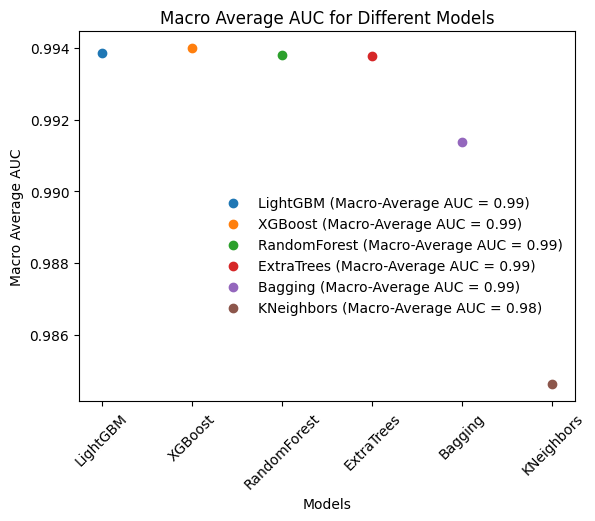

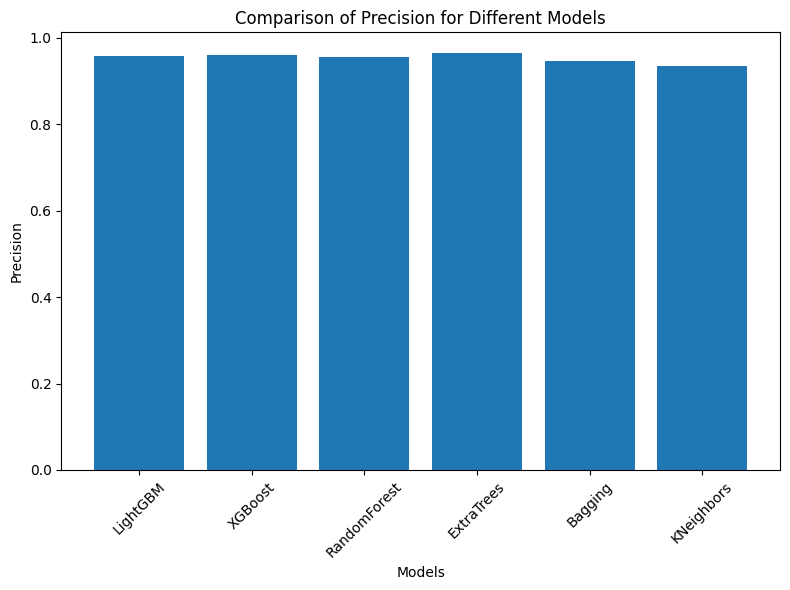

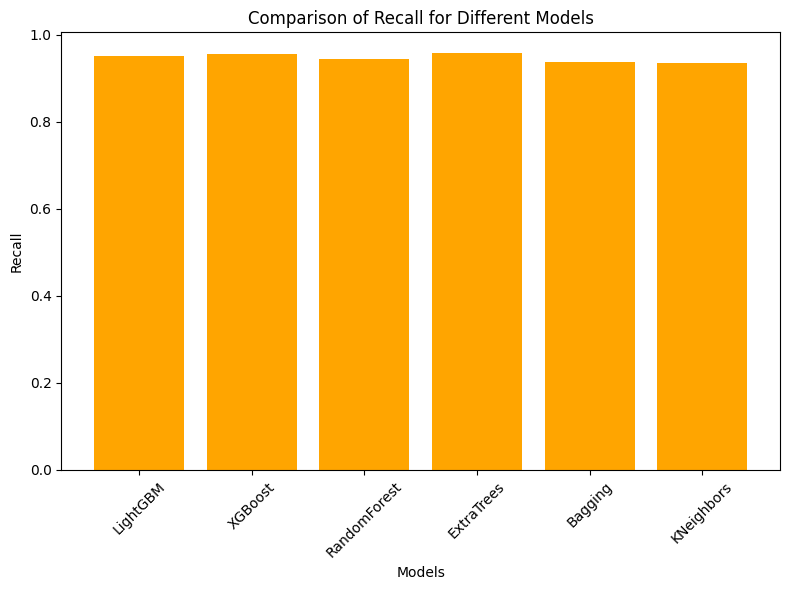

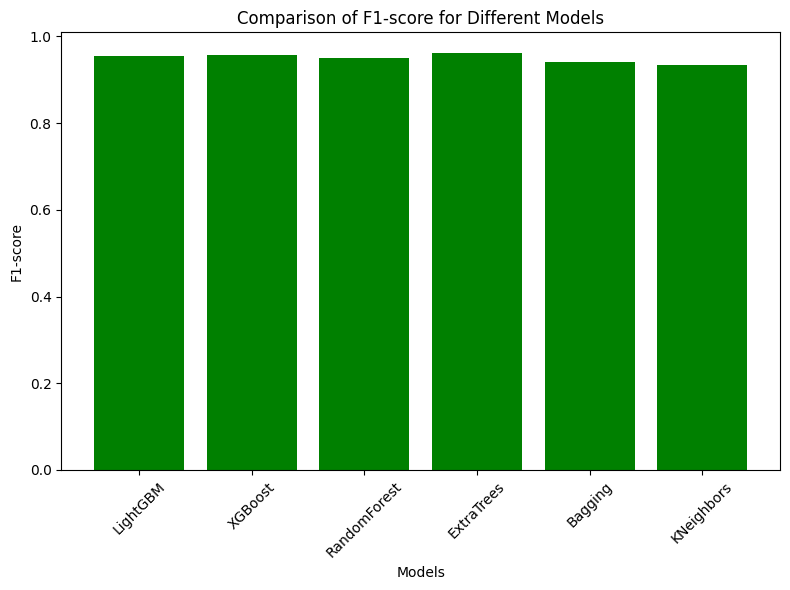

In [56]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score, auc, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
import lightgbm as lgb
import xgboost as xgb

# Load your data here instead of generating synthetic data
# X, y = ...

# Separate features (X) and the target variable (y)
X = df11.drop('category', axis=1)  # Replace 'category' with the name of your target column
y = df11['category']

# Apply feature scaling (optional but recommended for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=20)  # Adjust the number of components as needed
X_pca = pca.fit_transform(X_scaled)

# Convert PCA components to DataFrame with appropriate column names
X_selected = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.4, random_state=42)

algorithms = {
    "LightGBM": lgb.LGBMClassifier(verbosity=0),
    "XGBoost": xgb.XGBClassifier(),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "ExtraTrees": ExtraTreesClassifier(n_estimators=100, random_state=42),
    "Bagging": BaggingClassifier(n_estimators=100, random_state=42),
    "KNeighbors": KNeighborsClassifier(),
}

accuracy_values = {}
cv_accuracy_values = {}
auc_values = {}

precision_values = {}
recall_values = {}
f1_score_values = {}

# Store confusion matrices for each model
confusion_matrices = {}

for alg_name, clf in algorithms.items():
    start_time = time.time()

    # Train the classifier using the one-vs-rest approach with selected features
    clf_ovr = OneVsRestClassifier(clf)
    clf_ovr.fit(X_train, y_train)

    # Calculate accuracy
    y_pred = clf_ovr.predict(X_test)
    accuracy = np.mean(y_pred == y_test)
    accuracy_values[alg_name] = accuracy

    # Calculate cross-validation accuracy with 10-fold
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    cross_val_acc = cross_val_score(clf_ovr, X_train, y_train, cv=cv, scoring='accuracy')
    cv_accuracy_values[alg_name] = cross_val_acc

    # Predict probabilities for each class
    y_score = clf_ovr.predict_proba(X_test)

    # Set zero probabilities to a small value to avoid division by zero
    y_score[y_score == 0] = 1e-10

    # Calculate AUC for each class
    auc_values[alg_name] = {}
    for i in range(4):
        y_true = (y_test == i).astype(int)
        auc_values[alg_name][i] = roc_auc_score(y_true, y_score[:, i])

    # Calculate confusion matrix
    confusion_matrices[alg_name] = confusion_matrix(y_test, y_pred)

    end_time = time.time()

    # Print AUC values, execution time, and cross-validation accuracy
    print(f"{alg_name} AUC values:", auc_values[alg_name])
    print(f"{alg_name} Execution Time:", end_time - start_time, "seconds")
    print(f"{alg_name} Accuracy:", accuracy)
    print(f"{alg_name} 10-Fold Cross-Validation Accuracy:", np.mean(cv_accuracy_values[alg_name]))

    # Print Classification Report
    print(f"{alg_name} Classification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate Precision, Recall, and F1-score
    precision = np.mean([classification_report(y_test, y_pred, output_dict=True)[str(i)]['precision'] for i in range(4)])
    recall = np.mean([classification_report(y_test, y_pred, output_dict=True)[str(i)]['recall'] for i in range(4)])
    f1_score = np.mean([classification_report(y_test, y_pred, output_dict=True)[str(i)]['f1-score'] for i in range(4)])

    precision_values[alg_name] = precision
    recall_values[alg_name] = recall
    f1_score_values[alg_name] = f1_score

    # Print confusion matrix using a heatmap
    plt.figure()
    sns.heatmap(confusion_matrices[alg_name], annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"{alg_name} Confusion Matrix")
    plt.show()

    # Plot ROC curve
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(4):
        y_true = (y_test == i).astype(int)
        fpr[i], tpr[i], _ = roc_curve(y_true, y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    for i in range(4):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{alg_name} - One vs Rest ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

# Comparison graph 1: Models' Accuracy
plt.figure()
plt.bar(accuracy_values.keys(), accuracy_values.values())
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Models\' Accuracy')
plt.xticks(rotation=45)  # Rotate the x-axis labels to avoid overlapping
plt.show()

# Comparison graph 2: Cross-Validation Accuracy
plt.figure()
for alg_name, accuracy_scores in cv_accuracy_values.items():
    plt.plot(range(1, 11), accuracy_scores, marker='o', label=alg_name)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy for Different Models')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(range(1, 11))  # Set explicit x-axis ticks
plt.show()

# Comparison graph 3: Macro Average AUC
plt.figure()
for alg_name, roc_auc in auc_values.items():
    macro_auc = np.mean(list(roc_auc.values()))
    plt.scatter(alg_name, macro_auc, marker='o', label=f'{alg_name} (Macro-Average AUC = {macro_auc:.2f})')
plt.xlabel('Models')
plt.ylabel('Macro Average AUC')
plt.title('Macro Average AUC for Different Models')
legend = plt.legend(loc='lower right', bbox_to_anchor=(1, 0.2), frameon=False)  # Adjust the values as needed

plt.xticks(rotation=45)  # Rotate the x-axis labels to avoid overlapping
plt.show()

# Comparison graph 4: Precision
plt.figure(figsize=(8, 6))
plt.bar(algorithms.keys(), precision_values.values())
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Comparison of Precision for Different Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Comparison graph 5: Recall
plt.figure(figsize=(8, 6))
plt.bar(algorithms.keys(), recall_values.values(), color='orange')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Comparison of Recall for Different Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Comparison graph 6: F1-score
plt.figure(figsize=(8, 6))
plt.bar(algorithms.keys(), f1_score_values.values(), color='green')
plt.xlabel('Models')
plt.ylabel('F1-score')
plt.title('Comparison of F1-score for Different Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **2. PCA**
**Result with top 20 features with 70:30 traning an testing ratio.**

LightGBM AUC values: {0: 0.9968739286270842, 1: 0.9880426125049782, 2: 0.9961178650312817, 3: 0.9948037037357242}
LightGBM Execution Time: 19.32821536064148 seconds
LightGBM Accuracy: 0.9590209020902091
LightGBM 10-Fold Cross-Validation Accuracy: 0.9576856512656399
LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       186
           1       0.97      0.93      0.95      1116
           2       0.97      0.97      0.97      1159
           3       0.94      0.98      0.96      1175

    accuracy                           0.96      3636
   macro avg       0.95      0.96      0.96      3636
weighted avg       0.96      0.96      0.96      3636



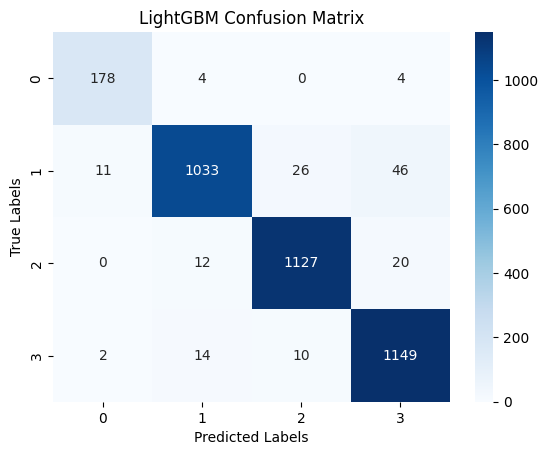

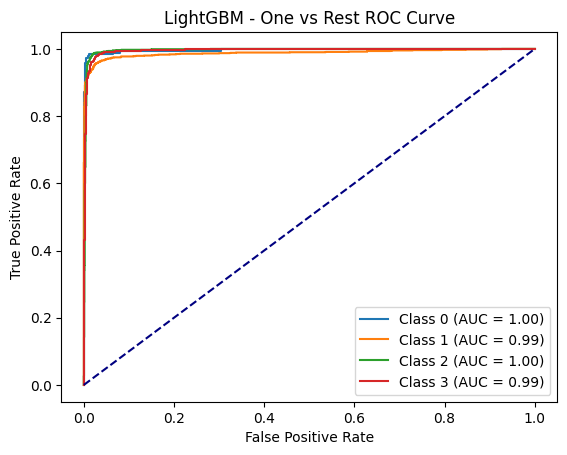

XGBoost AUC values: {0: 0.9954916627707651, 1: 0.9885144649257553, 2: 0.9961157750528329, 3: 0.9955043357223755}
XGBoost Execution Time: 21.44989323616028 seconds
XGBoost Accuracy: 0.9606710671067107
XGBoost 10-Fold Cross-Validation Accuracy: 0.9601610940729384
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       186
           1       0.98      0.93      0.95      1116
           2       0.97      0.97      0.97      1159
           3       0.94      0.98      0.96      1175

    accuracy                           0.96      3636
   macro avg       0.96      0.96      0.96      3636
weighted avg       0.96      0.96      0.96      3636



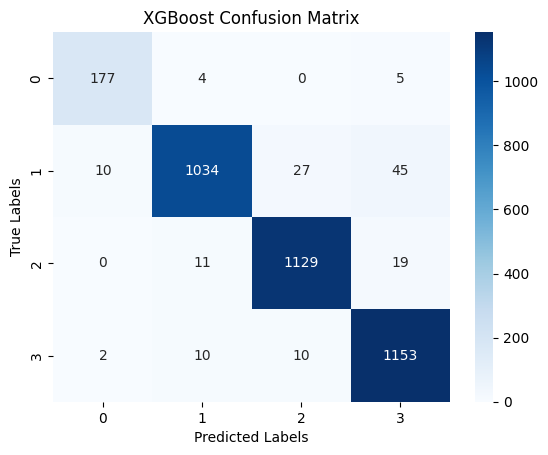

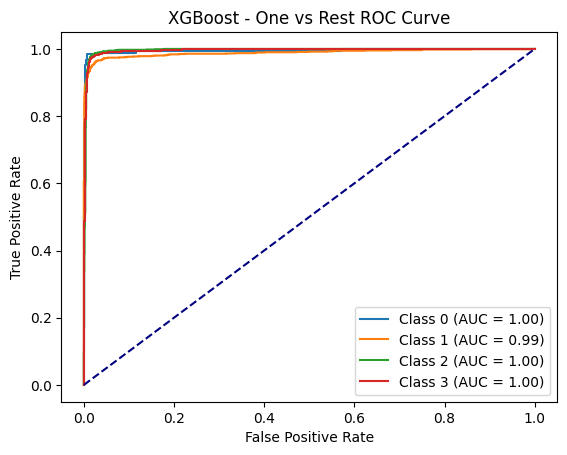

RandomForest AUC values: {0: 0.9954511453950445, 1: 0.9905042811628832, 2: 0.9960424516422529, 3: 0.995703528231907}
RandomForest Execution Time: 136.29494190216064 seconds
RandomForest Accuracy: 0.9573707370737073
RandomForest 10-Fold Cross-Validation Accuracy: 0.9563888981487654
RandomForest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       186
           1       0.97      0.93      0.95      1116
           2       0.97      0.96      0.97      1159
           3       0.93      0.98      0.96      1175

    accuracy                           0.96      3636
   macro avg       0.96      0.95      0.95      3636
weighted avg       0.96      0.96      0.96      3636



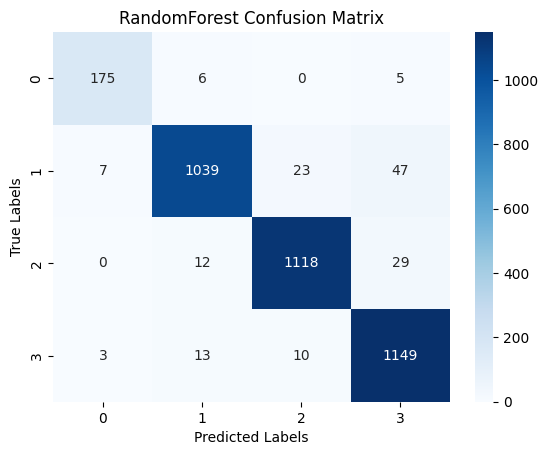

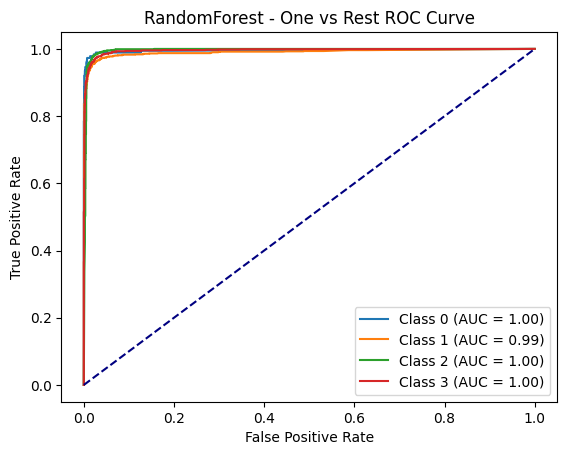

ExtraTrees AUC values: {0: 0.9981330839956366, 1: 0.9890544105933889, 2: 0.9940454772343874, 3: 0.9963453707626203}
ExtraTrees Execution Time: 32.89445376396179 seconds
ExtraTrees Accuracy: 0.9628712871287128
ExtraTrees 10-Fold Cross-Validation Accuracy: 0.9602780463141988
ExtraTrees Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       186
           1       0.97      0.94      0.95      1116
           2       0.97      0.97      0.97      1159
           3       0.95      0.98      0.96      1175

    accuracy                           0.96      3636
   macro avg       0.96      0.96      0.96      3636
weighted avg       0.96      0.96      0.96      3636



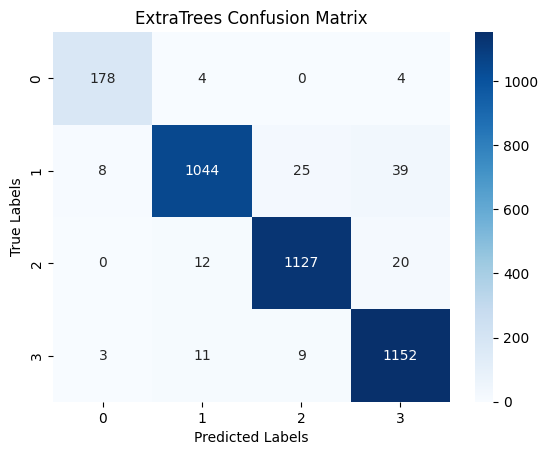

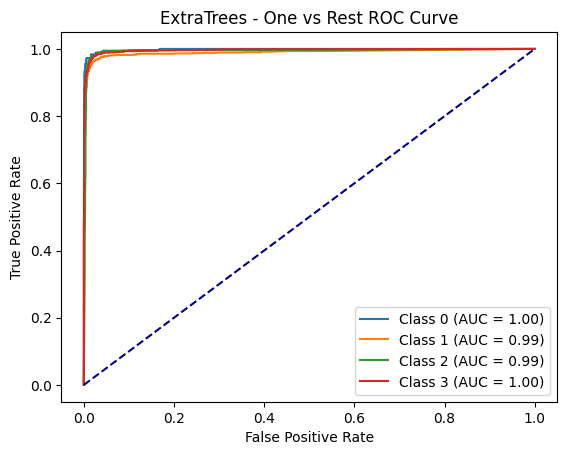

Bagging AUC values: {0: 0.992851020726196, 1: 0.9876920122887867, 2: 0.9954205088888524, 3: 0.9935390387923954}
Bagging Execution Time: 660.4046695232391 seconds
Bagging Accuracy: 0.9554455445544554
Bagging 10-Fold Cross-Validation Accuracy: 0.9529703369113497
Bagging Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       186
           1       0.96      0.93      0.95      1116
           2       0.97      0.96      0.97      1159
           3       0.94      0.97      0.95      1175

    accuracy                           0.96      3636
   macro avg       0.95      0.95      0.95      3636
weighted avg       0.96      0.96      0.96      3636



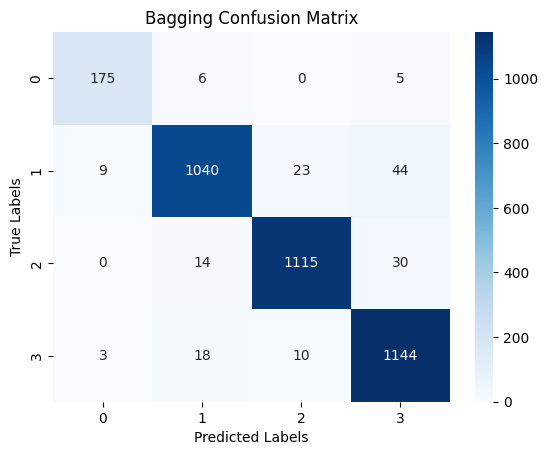

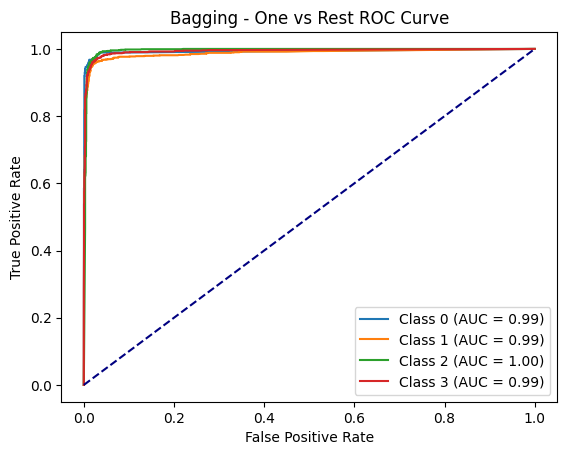

KNeighbors AUC values: {0: 0.9820554776375253, 1: 0.9767444672014564, 2: 0.9891740857998854, 3: 0.9878305826207994}
KNeighbors Execution Time: 3.2440614700317383 seconds
KNeighbors Accuracy: 0.9455445544554455
KNeighbors 10-Fold Cross-Validation Accuracy: 0.9446018623463786
KNeighbors Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       186
           1       0.97      0.90      0.93      1116
           2       0.96      0.97      0.96      1159
           3       0.92      0.97      0.95      1175

    accuracy                           0.95      3636
   macro avg       0.94      0.94      0.94      3636
weighted avg       0.95      0.95      0.95      3636



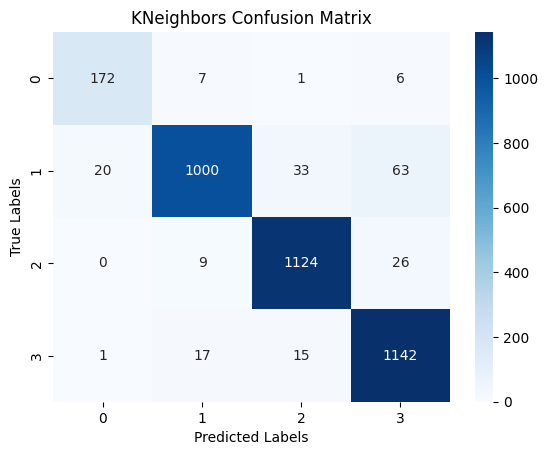

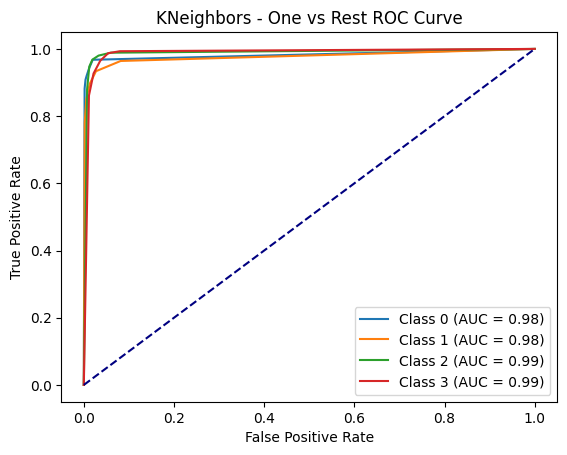

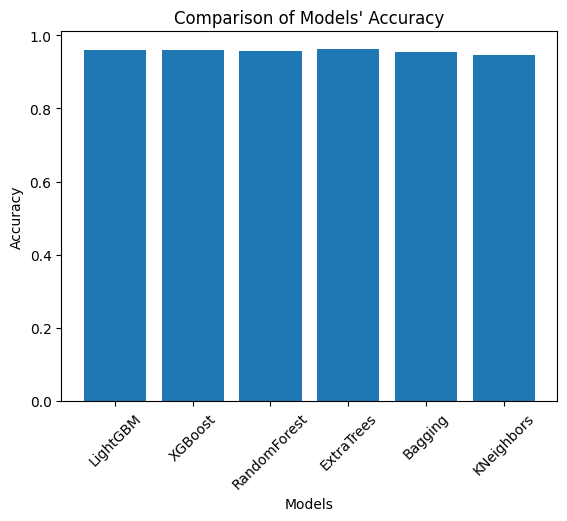

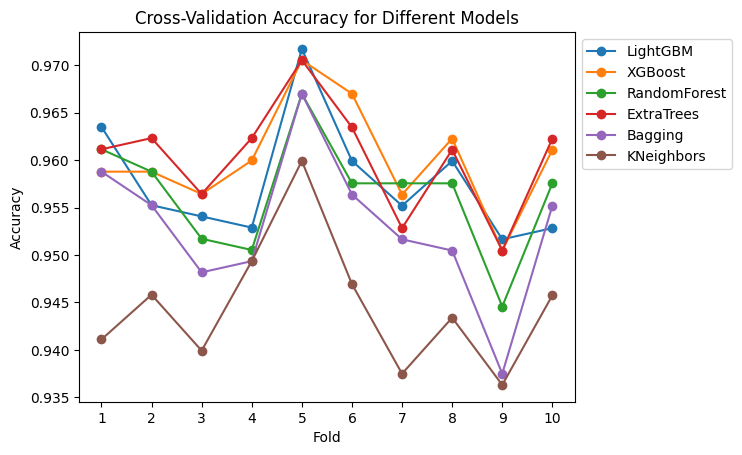

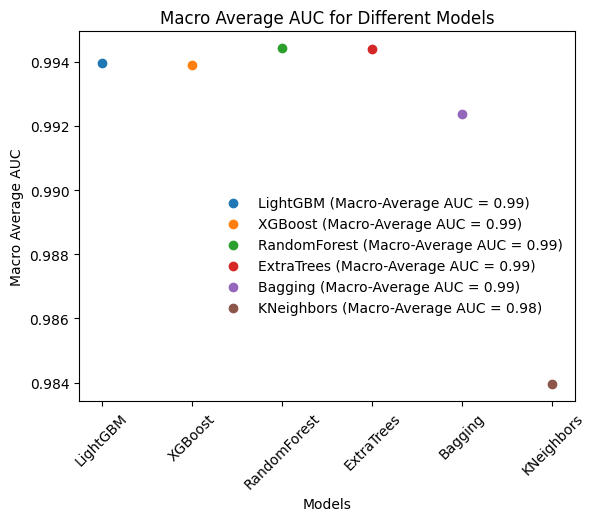

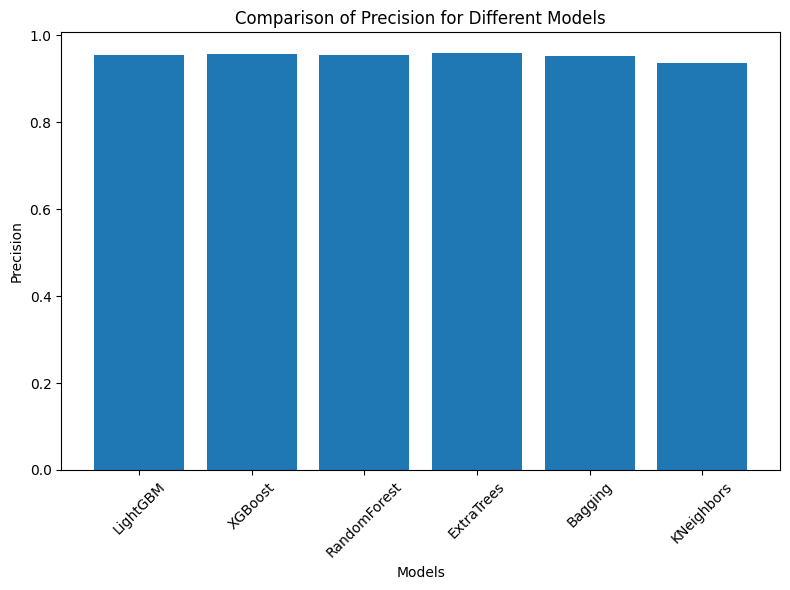

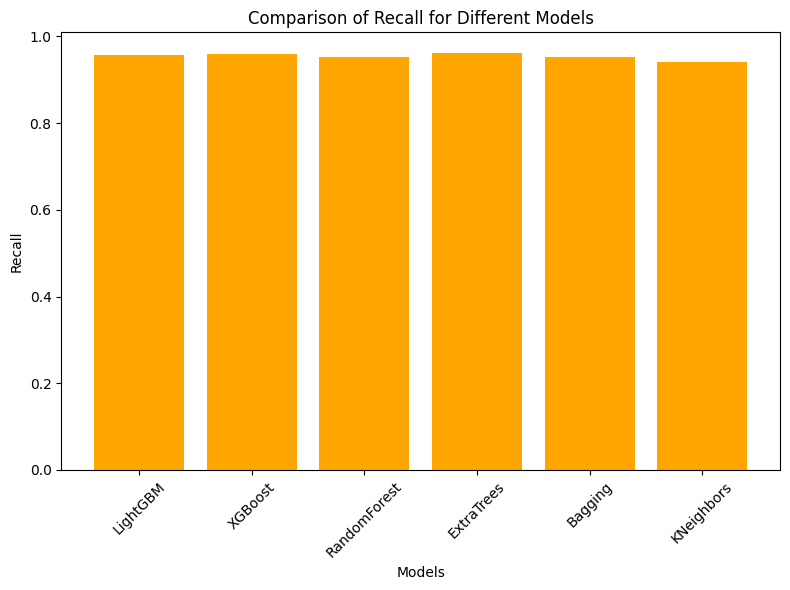

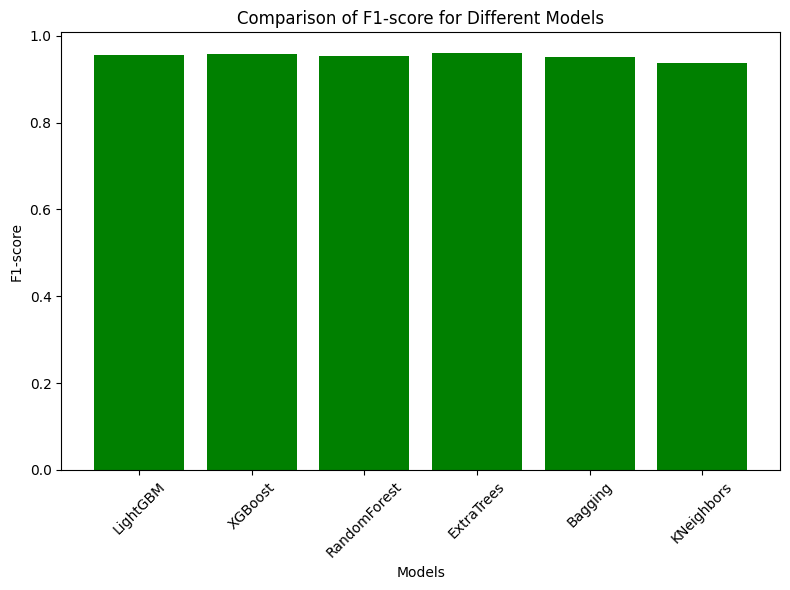

In [57]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score, auc, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
import lightgbm as lgb
import xgboost as xgb

# Load your data here instead of generating synthetic data
# X, y = ...

# Separate features (X) and the target variable (y)
X = df11.drop('category', axis=1)  # Replace 'category' with the name of your target column
y = df11['category']

# Apply feature scaling (optional but recommended for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=20)  # Adjust the number of components as needed
X_pca = pca.fit_transform(X_scaled)

# Convert PCA components to DataFrame with appropriate column names
X_selected = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

algorithms = {
    "LightGBM": lgb.LGBMClassifier(verbosity=0),
    "XGBoost": xgb.XGBClassifier(),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "ExtraTrees": ExtraTreesClassifier(n_estimators=100, random_state=42),
    "Bagging": BaggingClassifier(n_estimators=100, random_state=42),
    "KNeighbors": KNeighborsClassifier(),
}

accuracy_values = {}
cv_accuracy_values = {}
auc_values = {}

precision_values = {}
recall_values = {}
f1_score_values = {}

# Store confusion matrices for each model
confusion_matrices = {}

for alg_name, clf in algorithms.items():
    start_time = time.time()

    # Train the classifier using the one-vs-rest approach with selected features
    clf_ovr = OneVsRestClassifier(clf)
    clf_ovr.fit(X_train, y_train)

    # Calculate accuracy
    y_pred = clf_ovr.predict(X_test)
    accuracy = np.mean(y_pred == y_test)
    accuracy_values[alg_name] = accuracy

    # Calculate cross-validation accuracy with 10-fold
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    cross_val_acc = cross_val_score(clf_ovr, X_train, y_train, cv=cv, scoring='accuracy')
    cv_accuracy_values[alg_name] = cross_val_acc

    # Predict probabilities for each class
    y_score = clf_ovr.predict_proba(X_test)

    # Set zero probabilities to a small value to avoid division by zero
    y_score[y_score == 0] = 1e-10

    # Calculate AUC for each class
    auc_values[alg_name] = {}
    for i in range(4):
        y_true = (y_test == i).astype(int)
        auc_values[alg_name][i] = roc_auc_score(y_true, y_score[:, i])

    # Calculate confusion matrix
    confusion_matrices[alg_name] = confusion_matrix(y_test, y_pred)

    end_time = time.time()

    # Print AUC values, execution time, and cross-validation accuracy
    print(f"{alg_name} AUC values:", auc_values[alg_name])
    print(f"{alg_name} Execution Time:", end_time - start_time, "seconds")
    print(f"{alg_name} Accuracy:", accuracy)
    print(f"{alg_name} 10-Fold Cross-Validation Accuracy:", np.mean(cv_accuracy_values[alg_name]))

    # Print Classification Report
    print(f"{alg_name} Classification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate Precision, Recall, and F1-score
    precision = np.mean([classification_report(y_test, y_pred, output_dict=True)[str(i)]['precision'] for i in range(4)])
    recall = np.mean([classification_report(y_test, y_pred, output_dict=True)[str(i)]['recall'] for i in range(4)])
    f1_score = np.mean([classification_report(y_test, y_pred, output_dict=True)[str(i)]['f1-score'] for i in range(4)])

    precision_values[alg_name] = precision
    recall_values[alg_name] = recall
    f1_score_values[alg_name] = f1_score

    # Print confusion matrix using a heatmap
    plt.figure()
    sns.heatmap(confusion_matrices[alg_name], annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"{alg_name} Confusion Matrix")
    plt.show()

    # Plot ROC curve
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(4):
        y_true = (y_test == i).astype(int)
        fpr[i], tpr[i], _ = roc_curve(y_true, y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    for i in range(4):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{alg_name} - One vs Rest ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

# Comparison graph 1: Models' Accuracy
plt.figure()
plt.bar(accuracy_values.keys(), accuracy_values.values())
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Models\' Accuracy')
plt.xticks(rotation=45)  # Rotate the x-axis labels to avoid overlapping
plt.show()

# Comparison graph 2: Cross-Validation Accuracy
plt.figure()
for alg_name, accuracy_scores in cv_accuracy_values.items():
    plt.plot(range(1, 11), accuracy_scores, marker='o', label=alg_name)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy for Different Models')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(range(1, 11))  # Set explicit x-axis ticks
plt.show()

# Comparison graph 3: Macro Average AUC
plt.figure()
for alg_name, roc_auc in auc_values.items():
    macro_auc = np.mean(list(roc_auc.values()))
    plt.scatter(alg_name, macro_auc, marker='o', label=f'{alg_name} (Macro-Average AUC = {macro_auc:.2f})')
plt.xlabel('Models')
plt.ylabel('Macro Average AUC')
plt.title('Macro Average AUC for Different Models')
legend = plt.legend(loc='lower right', bbox_to_anchor=(1, 0.2), frameon=False)  # Adjust the values as needed

plt.xticks(rotation=45)  # Rotate the x-axis labels to avoid overlapping
plt.show()

# Comparison graph 4: Precision
plt.figure(figsize=(8, 6))
plt.bar(algorithms.keys(), precision_values.values())
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Comparison of Precision for Different Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Comparison graph 5: Recall
plt.figure(figsize=(8, 6))
plt.bar(algorithms.keys(), recall_values.values(), color='orange')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Comparison of Recall for Different Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Comparison graph 6: F1-score
plt.figure(figsize=(8, 6))
plt.bar(algorithms.keys(), f1_score_values.values(), color='green')
plt.xlabel('Models')
plt.ylabel('F1-score')
plt.title('Comparison of F1-score for Different Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **2. PCA**
**Result with top 20 features with 80:20 traning an testing ratio.**

LightGBM AUC values: {0: 0.9980432598233646, 1: 0.9871407713940636, 2: 0.9959689079569943, 3: 0.9947197267452742}
LightGBM Execution Time: 21.091857194900513 seconds
LightGBM Accuracy: 0.9620462046204621
LightGBM 10-Fold Cross-Validation Accuracy: 0.9585378698413713
LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       132
           1       0.97      0.93      0.95       747
           2       0.97      0.98      0.97       765
           3       0.94      0.98      0.96       780

    accuracy                           0.96      2424
   macro avg       0.96      0.96      0.96      2424
weighted avg       0.96      0.96      0.96      2424



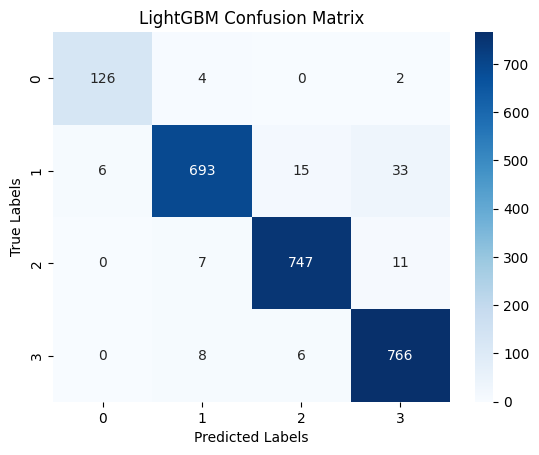

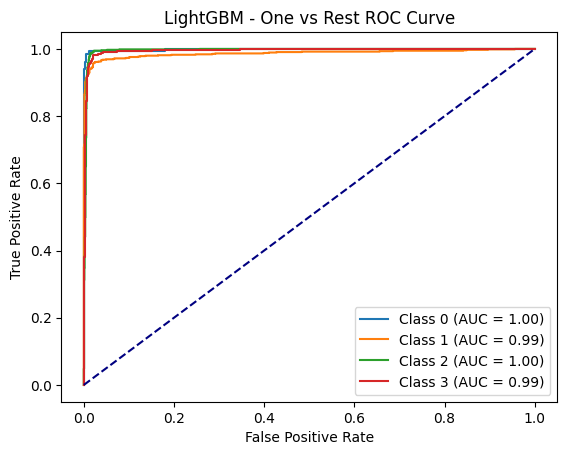

XGBoost AUC values: {0: 0.996552567560421, 1: 0.9870226283787505, 2: 0.9955918795084842, 3: 0.9950605153159899}
XGBoost Execution Time: 23.52022671699524 seconds
XGBoost Accuracy: 0.9636963696369637
XGBoost 10-Fold Cross-Validation Accuracy: 0.9610129477727064
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       132
           1       0.97      0.93      0.95       747
           2       0.98      0.98      0.98       765
           3       0.95      0.98      0.97       780

    accuracy                           0.96      2424
   macro avg       0.96      0.96      0.96      2424
weighted avg       0.96      0.96      0.96      2424



RandomForest AUC values: {0: 0.9948767782537415, 1: 0.9885257587695244, 2: 0.9954441410882214, 3: 0.9954660303200448}
RandomForest Execution Time: 163.97776985168457 seconds
RandomForest Accuracy: 0.9624587458745875
RandomForest 10-Fold Cross-Validation Accuracy: 0.9562687646952431
RandomForest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       132
           1       0.97      0.94      0.95       747
           2       0.97      0.97      0.97       765
           3       0.94      0.98      0.96       780

    accuracy                           0.96      2424
   macro avg       0.97      0.96      0.96      2424
weighted avg       0.96      0.96      0.96      2424



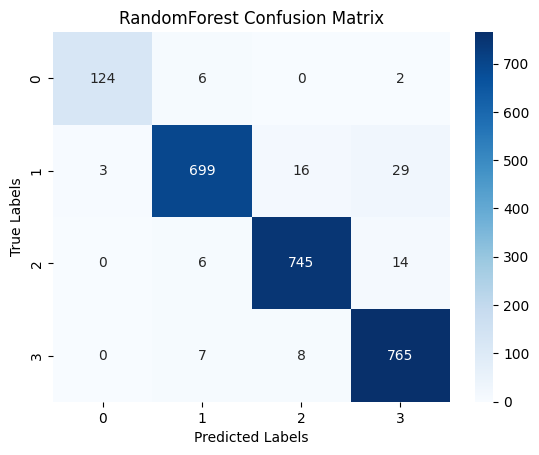

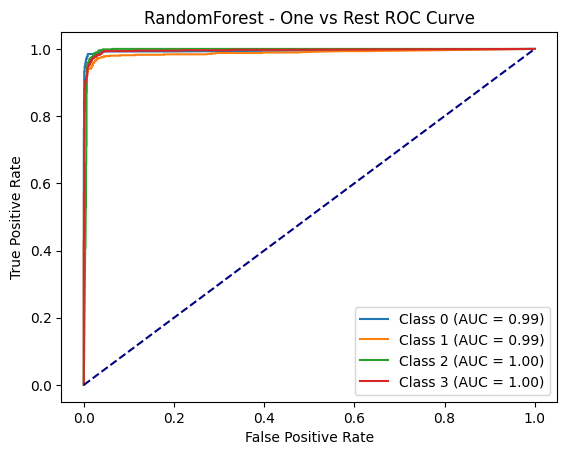

ExtraTrees AUC values: {0: 0.9951147601671161, 1: 0.9892657491424652, 2: 0.9954669912972223, 3: 0.9975587216919335}
ExtraTrees Execution Time: 35.00843405723572 seconds
ExtraTrees Accuracy: 0.9653465346534653
ExtraTrees 10-Fold Cross-Validation Accuracy: 0.9619416339514644
ExtraTrees Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       132
           1       0.97      0.93      0.95       747
           2       0.97      0.98      0.97       765
           3       0.95      0.99      0.97       780

    accuracy                           0.97      2424
   macro avg       0.97      0.96      0.96      2424
weighted avg       0.97      0.97      0.97      2424



Bagging AUC values: {0: 0.9947825770796976, 1: 0.9868737522141835, 2: 0.9955233288814823, 3: 0.9951443477447128}
Bagging Execution Time: 788.8670475482941 seconds
Bagging Accuracy: 0.9653465346534653
Bagging 10-Fold Cross-Validation Accuracy: 0.95369112593491
Bagging Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       132
           1       0.97      0.95      0.96       747
           2       0.97      0.98      0.97       765
           3       0.95      0.98      0.97       780

    accuracy                           0.97      2424
   macro avg       0.97      0.96      0.96      2424
weighted avg       0.97      0.97      0.97      2424



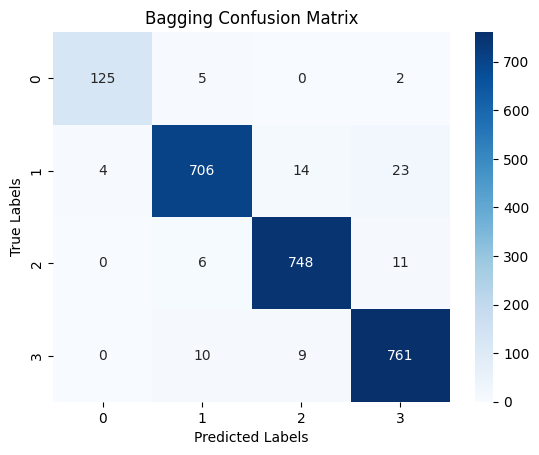

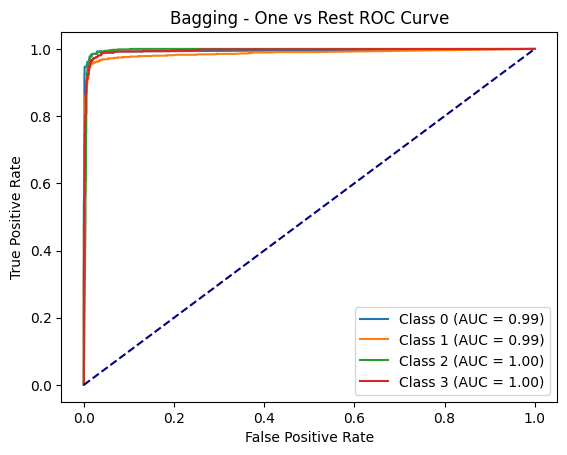

KNeighbors AUC values: {0: 0.9873489475910942, 1: 0.9732082773550972, 2: 0.9910966918412936, 3: 0.9869853078794685}
KNeighbors Execution Time: 3.375140905380249 seconds
KNeighbors Accuracy: 0.9463696369636964
KNeighbors 10-Fold Cross-Validation Accuracy: 0.9467807177130213
KNeighbors Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       132
           1       0.96      0.90      0.93       747
           2       0.96      0.96      0.96       765
           3       0.92      0.97      0.95       780

    accuracy                           0.95      2424
   macro avg       0.94      0.94      0.94      2424
weighted avg       0.95      0.95      0.95      2424



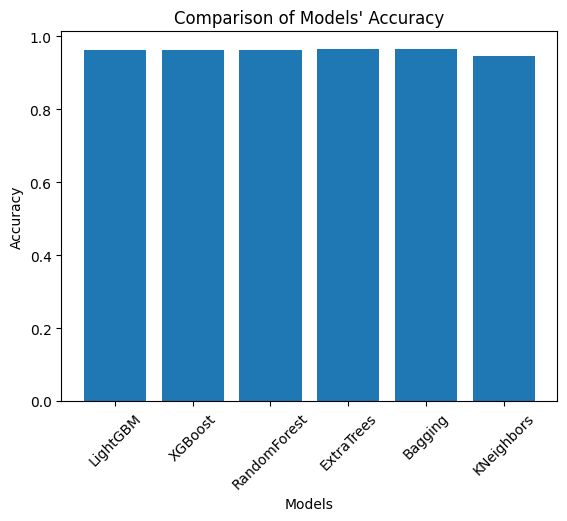

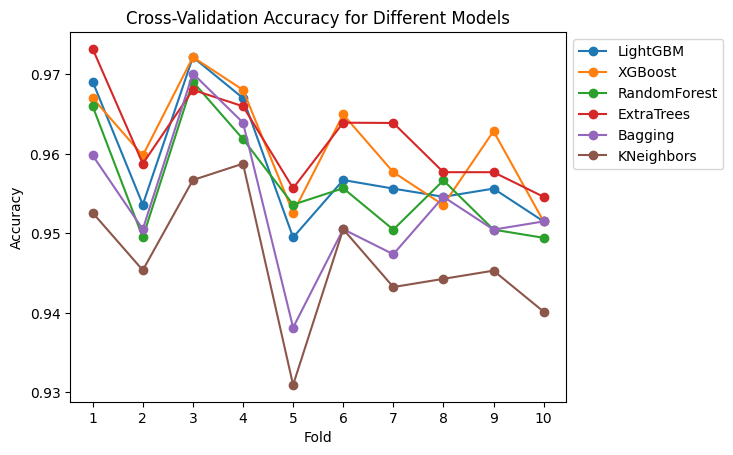

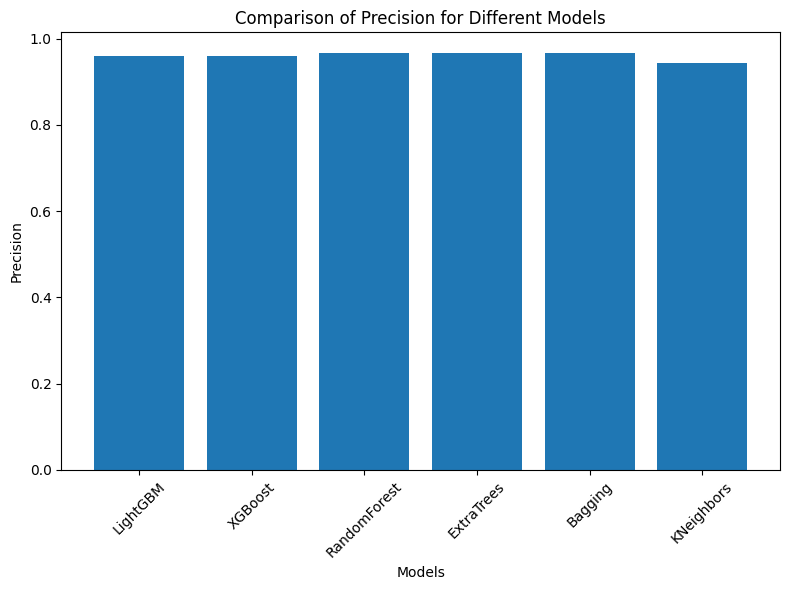

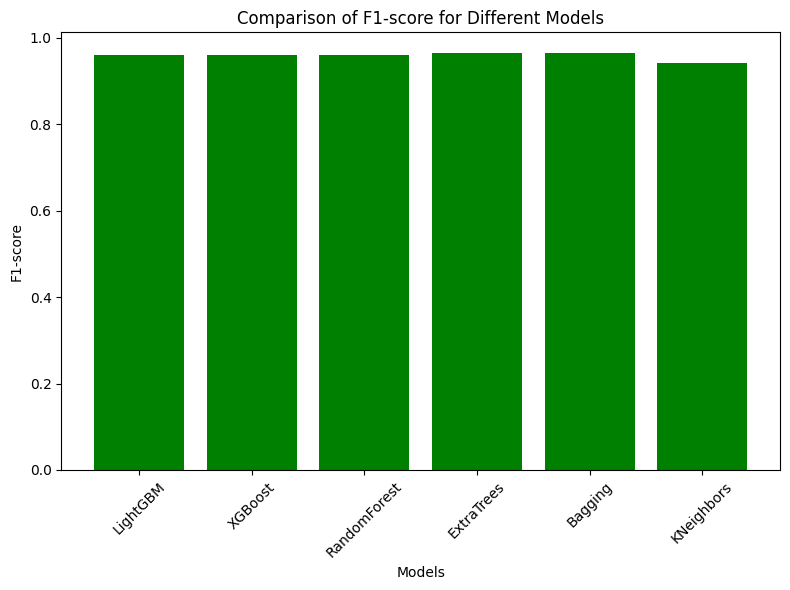

In [52]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score, auc, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
import lightgbm as lgb
import xgboost as xgb

# Load your data here instead of generating synthetic data
# X, y = ...

# Separate features (X) and the target variable (y)
X = df11.drop('category', axis=1)  # Replace 'category' with the name of your target column
y = df11['category']

# Apply feature scaling (optional but recommended for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=20)  # Adjust the number of components as needed
X_pca = pca.fit_transform(X_scaled)

# Convert PCA components to DataFrame with appropriate column names
X_selected = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

algorithms = {
    "LightGBM": lgb.LGBMClassifier(verbosity=0),
    "XGBoost": xgb.XGBClassifier(),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "ExtraTrees": ExtraTreesClassifier(n_estimators=100, random_state=42),
    "Bagging": BaggingClassifier(n_estimators=100, random_state=42),
    "KNeighbors": KNeighborsClassifier(),
}

accuracy_values = {}
cv_accuracy_values = {}
auc_values = {}

precision_values = {}
recall_values = {}
f1_score_values = {}

# Store confusion matrices for each model
confusion_matrices = {}

for alg_name, clf in algorithms.items():
    start_time = time.time()

    # Train the classifier using the one-vs-rest approach with selected features
    clf_ovr = OneVsRestClassifier(clf)
    clf_ovr.fit(X_train, y_train)

    # Calculate accuracy
    y_pred = clf_ovr.predict(X_test)
    accuracy = np.mean(y_pred == y_test)
    accuracy_values[alg_name] = accuracy

    # Calculate cross-validation accuracy with 10-fold
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    cross_val_acc = cross_val_score(clf_ovr, X_train, y_train, cv=cv, scoring='accuracy')
    cv_accuracy_values[alg_name] = cross_val_acc

    # Predict probabilities for each class
    y_score = clf_ovr.predict_proba(X_test)

    # Set zero probabilities to a small value to avoid division by zero
    y_score[y_score == 0] = 1e-10

    # Calculate AUC for each class
    auc_values[alg_name] = {}
    for i in range(4):
        y_true = (y_test == i).astype(int)
        auc_values[alg_name][i] = roc_auc_score(y_true, y_score[:, i])

    # Calculate confusion matrix
    confusion_matrices[alg_name] = confusion_matrix(y_test, y_pred)

    end_time = time.time()

    # Print AUC values, execution time, and cross-validation accuracy
    print(f"{alg_name} AUC values:", auc_values[alg_name])
    print(f"{alg_name} Execution Time:", end_time - start_time, "seconds")
    print(f"{alg_name} Accuracy:", accuracy)
    print(f"{alg_name} 10-Fold Cross-Validation Accuracy:", np.mean(cv_accuracy_values[alg_name]))

    # Print Classification Report
    print(f"{alg_name} Classification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate Precision, Recall, and F1-score
    precision = np.mean([classification_report(y_test, y_pred, output_dict=True)[str(i)]['precision'] for i in range(4)])
    recall = np.mean([classification_report(y_test, y_pred, output_dict=True)[str(i)]['recall'] for i in range(4)])
    f1_score = np.mean([classification_report(y_test, y_pred, output_dict=True)[str(i)]['f1-score'] for i in range(4)])

    precision_values[alg_name] = precision
    recall_values[alg_name] = recall
    f1_score_values[alg_name] = f1_score

    # Print confusion matrix using a heatmap
    plt.figure()
    sns.heatmap(confusion_matrices[alg_name], annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"{alg_name} Confusion Matrix")
    plt.show()

    # Plot ROC curve
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(4):
        y_true = (y_test == i).astype(int)
        fpr[i], tpr[i], _ = roc_curve(y_true, y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    for i in range(4):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{alg_name} - One vs Rest ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

# Comparison graph 1: Models' Accuracy
plt.figure()
plt.bar(accuracy_values.keys(), accuracy_values.values())
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Models\' Accuracy')
plt.xticks(rotation=45)  # Rotate the x-axis labels to avoid overlapping
plt.show()

# Comparison graph 2: Cross-Validation Accuracy
plt.figure()
for alg_name, accuracy_scores in cv_accuracy_values.items():
    plt.plot(range(1, 11), accuracy_scores, marker='o', label=alg_name)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy for Different Models')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(range(1, 11))  # Set explicit x-axis ticks
plt.show()

# Comparison graph 3: Macro Average AUC
plt.figure()
for alg_name, roc_auc in auc_values.items():
    macro_auc = np.mean(list(roc_auc.values()))
    plt.scatter(alg_name, macro_auc, marker='o', label=f'{alg_name} (Macro-Average AUC = {macro_auc:.2f})')
plt.xlabel('Models')
plt.ylabel('Macro Average AUC')
plt.title('Macro Average AUC for Different Models')
legend = plt.legend(loc='lower right', bbox_to_anchor=(1, 0.2), frameon=False)  # Adjust the values as needed

plt.xticks(rotation=45)  # Rotate the x-axis labels to avoid overlapping
plt.show()

# Comparison graph 4: Precision
plt.figure(figsize=(8, 6))
plt.bar(algorithms.keys(), precision_values.values())
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Comparison of Precision for Different Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Comparison graph 5: Recall
plt.figure(figsize=(8, 6))
plt.bar(algorithms.keys(), recall_values.values(), color='orange')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Comparison of Recall for Different Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Comparison graph 6: F1-score
plt.figure(figsize=(8, 6))
plt.bar(algorithms.keys(), f1_score_values.values(), color='green')
plt.xlabel('Models')
plt.ylabel('F1-score')
plt.title('Comparison of F1-score for Different Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **3. Information Gain**
**Top 20 Features and 60:40 for traning and testing ration.**

Selected Features:
Total_tnx
gasPrice_Out
Tnx_fee_Out
Avg_value_Out
distinct_address
Total_Success_Tnx
value_In
Avg_value_In
Per_Tnx_In
First_Tnx_Value
max_value_Out
Per_Tnx_Out
value_Out
Last_Tnx_Time
gasUsed_Out
gasUsed_In
Tnx_fee
Avg_gasUsed_In
Avg_gasUsed_Out
First_Tnx_Time
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM AUC values: {0: 0.9999149980719075, 1: 0.9947944798381105, 2: 0.9984851772953709, 3: 0.9984695537639714}
LightGBM Execution Time: 16.31783413887024 seconds
LightGBM Accuracy: 0.9804042904

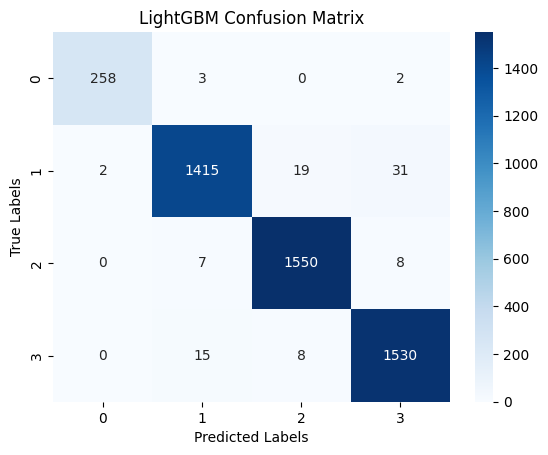

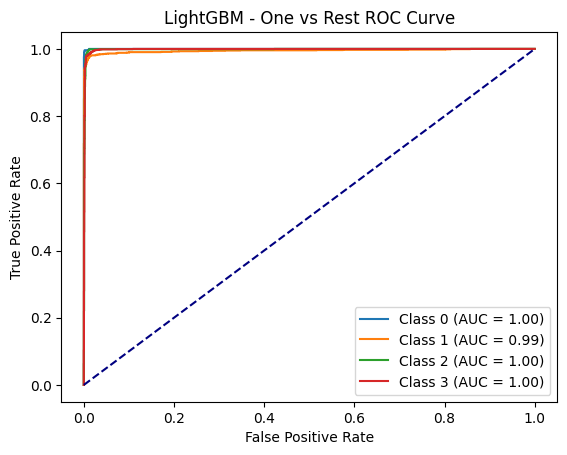

XGBoost AUC values: {0: 0.9996653826538016, 1: 0.9943416505928414, 2: 0.9984373950810594, 3: 0.9987033760102088}
XGBoost Execution Time: 13.717373371124268 seconds
XGBoost Accuracy: 0.9806105610561056
XGBoost 10-Fold Cross-Validation Accuracy: 0.98061202896141
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       263
           1       0.98      0.97      0.97      1467
           2       0.98      0.99      0.99      1565
           3       0.97      0.99      0.98      1553

    accuracy                           0.98      4848
   macro avg       0.98      0.98      0.98      4848
weighted avg       0.98      0.98      0.98      4848



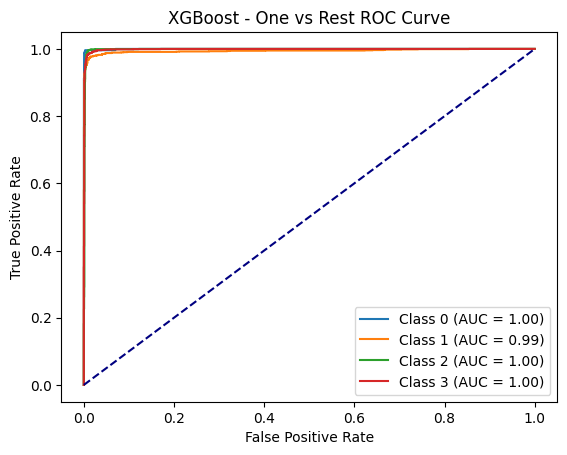

RandomForest AUC values: {0: 0.9997114080880372, 1: 0.9932425416745044, 2: 0.9981136243539427, 3: 0.9979826602190484}
RandomForest Execution Time: 66.87713313102722 seconds
RandomForest Accuracy: 0.9750412541254125
RandomForest 10-Fold Cross-Validation Accuracy: 0.9756614946264189
RandomForest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       263
           1       0.98      0.95      0.96      1467
           2       0.98      0.99      0.99      1565
           3       0.96      0.99      0.98      1553

    accuracy                           0.98      4848
   macro avg       0.98      0.97      0.97      4848
weighted avg       0.98      0.98      0.97      4848



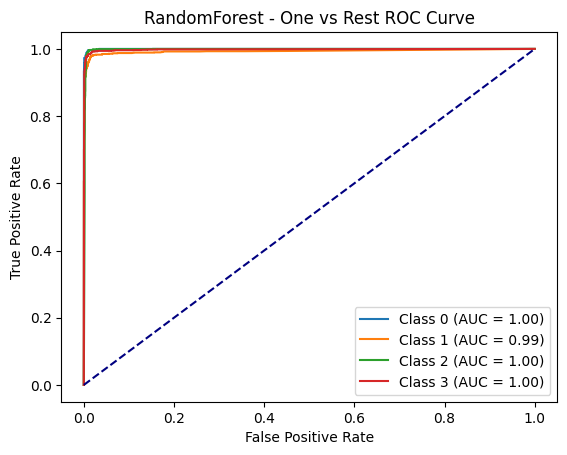

ExtraTrees AUC values: {0: 0.999308374555813, 1: 0.9919742770407709, 2: 0.9955148947185569, 3: 0.9989822429933939}
ExtraTrees Execution Time: 23.507712602615356 seconds
ExtraTrees Accuracy: 0.9773102310231023
ExtraTrees 10-Fold Cross-Validation Accuracy: 0.9748365630243209
ExtraTrees Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       263
           1       0.98      0.96      0.97      1467
           2       0.98      0.99      0.98      1565
           3       0.97      0.99      0.98      1553

    accuracy                           0.98      4848
   macro avg       0.98      0.97      0.98      4848
weighted avg       0.98      0.98      0.98      4848



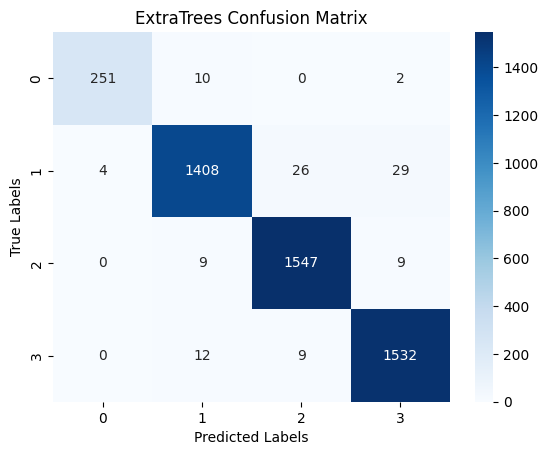

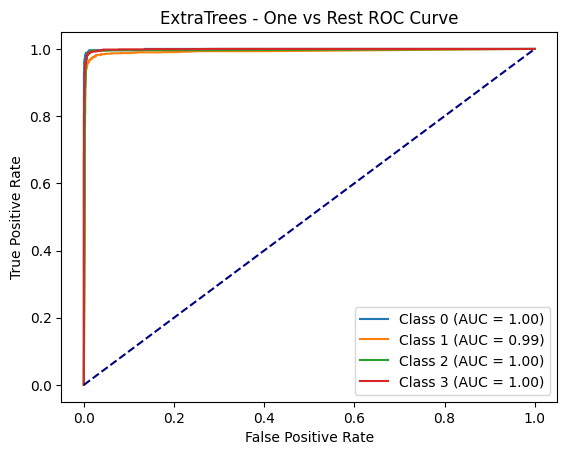

Bagging AUC values: {0: 0.9937786881507311, 1: 0.9933240952941443, 2: 0.9975734225787021, 3: 0.9958718110817868}
Bagging Execution Time: 290.4341106414795 seconds
Bagging Accuracy: 0.9764851485148515
Bagging 10-Fold Cross-Validation Accuracy: 0.9749731698837613
Bagging Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       263
           1       0.98      0.95      0.97      1467
           2       0.98      0.99      0.98      1565
           3       0.97      0.99      0.98      1553

    accuracy                           0.98      4848
   macro avg       0.98      0.97      0.98      4848
weighted avg       0.98      0.98      0.98      4848



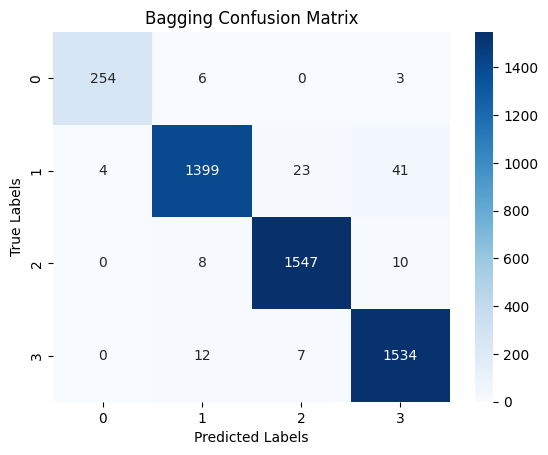

KNeighbors AUC values: {0: 0.9215581475384685, 1: 0.9546999381240894, 2: 0.9746117816732339, 3: 0.9519893456006144}
KNeighbors Execution Time: 3.0716941356658936 seconds
KNeighbors Accuracy: 0.8846947194719472
KNeighbors 10-Fold Cross-Validation Accuracy: 0.8809130175189323
KNeighbors Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.68      0.74       263
           1       0.93      0.84      0.88      1467
           2       0.90      0.96      0.93      1565
           3       0.84      0.89      0.86      1553

    accuracy                           0.88      4848
   macro avg       0.87      0.84      0.85      4848
weighted avg       0.89      0.88      0.88      4848



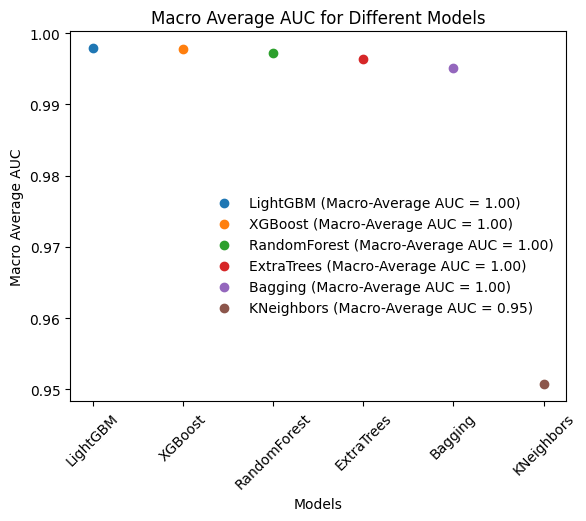

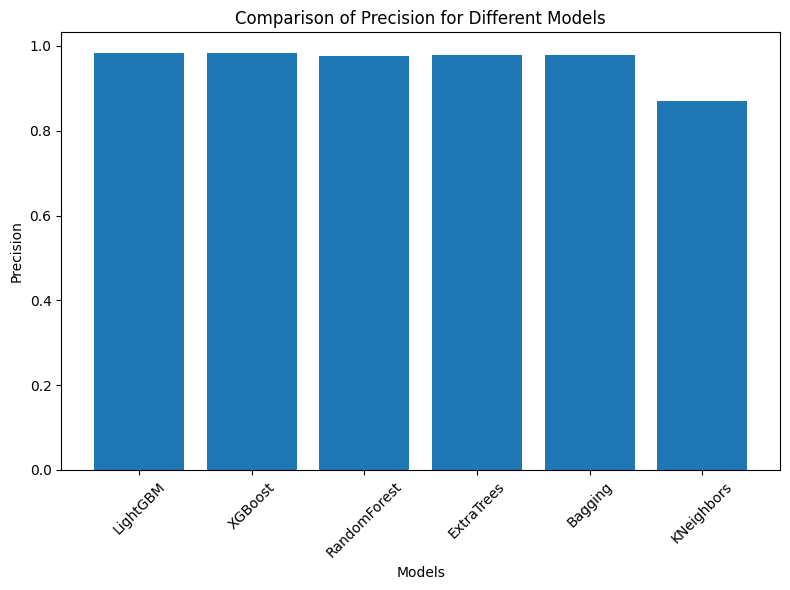

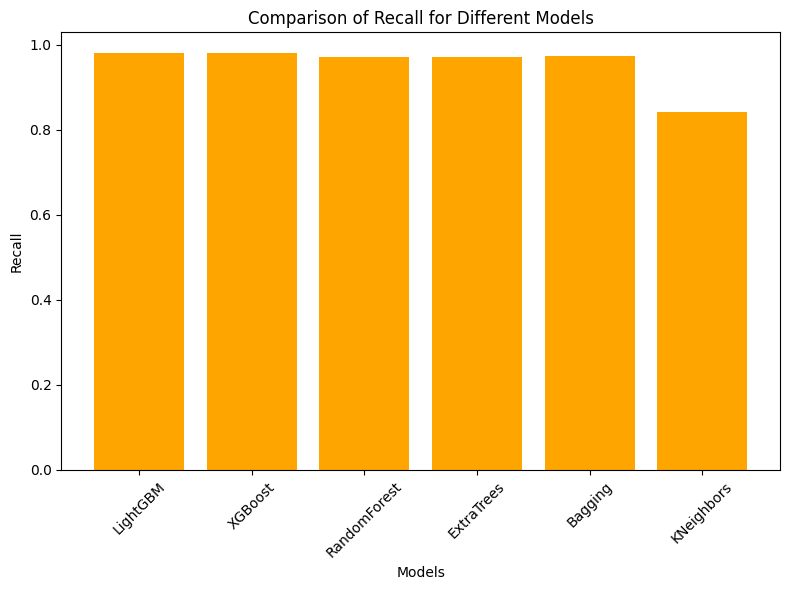

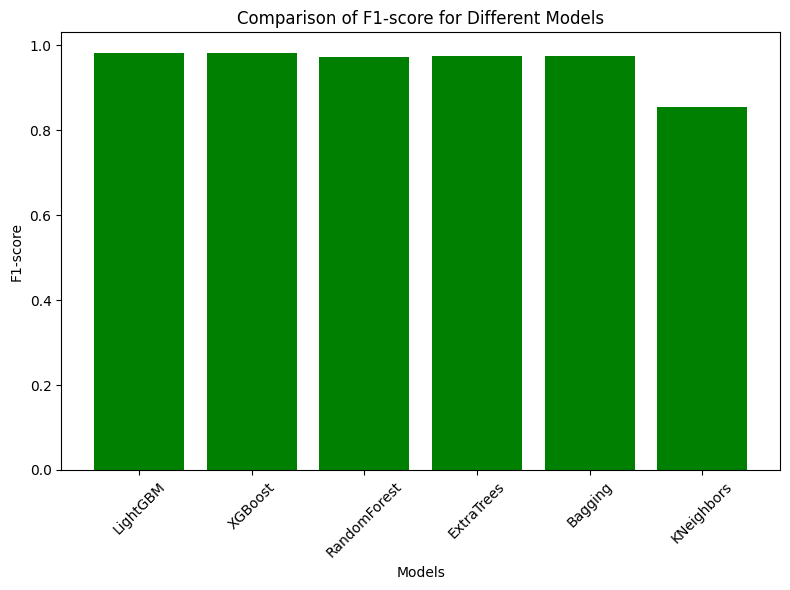

In [53]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc, classification_report, confusion_matrix
import lightgbm as lgb
import xgboost as xgb

# Separate features (X) and the target variable (y)
X = df11.drop('category', axis=1)  # Replace 'category' with the name of your target column
y = df11['category']

# Calculate Information Gain for each feature
info_gain = mutual_info_classif(X, y)

# Get the top 20 features
top_20_indices = np.argsort(info_gain)[-20:]
top_20_features = X.columns[top_20_indices]

# Use only the top 20 features for training and testing
X_selected = X[top_20_features]

# Print the names of the selected features
print("Selected Features:")
for feature_name in top_20_features:
    print(feature_name)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.4, random_state=42)

algorithms = {
    "LightGBM": lgb.LGBMClassifier(verbosity=0),
    "XGBoost": xgb.XGBClassifier(),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "ExtraTrees": ExtraTreesClassifier(n_estimators=100, random_state=42),
    "Bagging": BaggingClassifier(n_estimators=100, random_state=42),
    "KNeighbors": KNeighborsClassifier(),
}

accuracy_values = {}
cv_accuracy_values = {}
auc_values = {}
precision_values = {}
recall_values = {}
f1_score_values = {}

for alg_name, clf in algorithms.items():
    start_time = time.time()

    # Train the classifier using the one-vs-rest approach with selected features
    clf_ovr = OneVsRestClassifier(clf)
    clf_ovr.fit(X_train, y_train)

    # Calculate accuracy
    y_pred = clf_ovr.predict(X_test)
    accuracy = np.mean(y_pred == y_test)
    accuracy_values[alg_name] = accuracy

    # Calculate cross-validation accuracy with 10-fold
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    cross_val_acc = cross_val_score(clf_ovr, X_train, y_train, cv=cv, scoring='accuracy')
    cv_accuracy_values[alg_name] = cross_val_acc

    # Predict probabilities for each class
    y_score = clf_ovr.predict_proba(X_test)

    # Set zero probabilities to a small value to avoid division by zero
    y_score[y_score == 0] = 1e-10

    # Calculate AUC for each class
    auc_values[alg_name] = {}
    for i in range(4):
        y_true = (y_test == i).astype(int)
        auc_values[alg_name][i] = roc_auc_score(y_true, y_score[:, i])

    end_time = time.time()

    # Print AUC values, execution time, and cross-validation accuracy
    print(f"{alg_name} AUC values:", auc_values[alg_name])
    print(f"{alg_name} Execution Time:", end_time - start_time, "seconds")
    print(f"{alg_name} Accuracy:", accuracy)
    print(f"{alg_name} 10-Fold Cross-Validation Accuracy:", np.mean(cv_accuracy_values[alg_name]))

    # Print Classification Report
    print(f"{alg_name} Classification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate Precision, Recall, and F1-score
    precision = np.mean([classification_report(y_test, y_pred, output_dict=True)[str(i)]['precision'] for i in range(4)])
    recall = np.mean([classification_report(y_test, y_pred, output_dict=True)[str(i)]['recall'] for i in range(4)])
    f1_score = np.mean([classification_report(y_test, y_pred, output_dict=True)[str(i)]['f1-score'] for i in range(4)])

    precision_values[alg_name] = precision
    recall_values[alg_name] = recall
    f1_score_values[alg_name] = f1_score

    # Calculate confusion matrix
    y_pred = clf_ovr.predict(X_test)
    confusion = confusion_matrix(y_test, y_pred)

    # Print confusion matrix using a heatmap
    plt.figure()
    sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"{alg_name} Confusion Matrix")
    plt.show()

    # Plot ROC curve
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(4):
        y_true = (y_test == i).astype(int)
        fpr[i], tpr[i], _ = roc_curve(y_true, y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    for i in range(4):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{alg_name} - One vs Rest ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

# Comparison graph 1: Models' Accuracy
plt.figure()
plt.bar(accuracy_values.keys(), accuracy_values.values())
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Models\' Accuracy')
plt.xticks(rotation=45)  # Rotate the x-axis labels to avoid overlapping
plt.show()

# Comparison graph 2: Cross-Validation Accuracy
plt.figure()
for alg_name, accuracy_scores in cv_accuracy_values.items():
    plt.plot(range(1, 11), accuracy_scores, marker='o', label=alg_name)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy for Different Models')
legend = plt.legend(loc='lower right', bbox_to_anchor=(1, 0.2), frameon=False)
plt.xticks(range(1, 11))  # Set explicit x-axis ticks
plt.show()

# Comparison graph 3: Macro Average AUC
plt.figure()
for alg_name, roc_auc in auc_values.items():
    macro_auc = np.mean(list(roc_auc.values()))
    plt.scatter(alg_name, macro_auc, marker='o', label=f'{alg_name} (Macro-Average AUC = {macro_auc:.2f})')
plt.xlabel('Models')
plt.ylabel('Macro Average AUC')
plt.title('Macro Average AUC for Different Models')
legend = plt.legend(loc='lower right', bbox_to_anchor=(1, 0.2), frameon=False)  # Adjust the values as needed

plt.xticks(rotation=45)  # Rotate the x-axis labels to avoid overlapping
plt.show()

# Comparison graph 4: Precision
plt.figure(figsize=(8, 6))
plt.bar(algorithms.keys(), precision_values.values())
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Comparison of Precision for Different Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Comparison graph 5: Recall
plt.figure(figsize=(8, 6))
plt.bar(algorithms.keys(), recall_values.values(), color='orange')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Comparison of Recall for Different Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Comparison graph 6: F1-score
plt.figure(figsize=(8, 6))
plt.bar(algorithms.keys(), f1_score_values.values(), color='green')
plt.xlabel('Models')
plt.ylabel('F1-score')
plt.title('Comparison of F1-score for Different Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## **3. Information Gain**
**Top 20 Features and 70:30 for traning and testing ration.**

Selected Features:
Total_tnx
gasPrice_Out
Tnx_fee_Out
distinct_address
value_In
Total_Success_Tnx
Avg_value_Out
First_Tnx_Value
Per_Tnx_In
Avg_value_In
Per_Tnx_Out
max_value_Out
value_Out
Last_Tnx_Time
gasUsed_In
gasUsed_Out
Tnx_fee
Avg_gasUsed_In
Avg_gasUsed_Out
First_Tnx_Time
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM AUC values: {0: 0.9999236403303724, 1: 0.9939832593730442, 2: 0.9981249410016501, 3: 0.9982567197212687}
LightGBM Execution Time: 16.54491949081421 seconds
LightGBM Accuracy: 0.981023102310231
LightGBM 10-Fold Cross-Validation Accuracy: 0.9809060881836567
LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       186
           1       0.99      0.96      0.97      1116
           2       0.98      0.99   

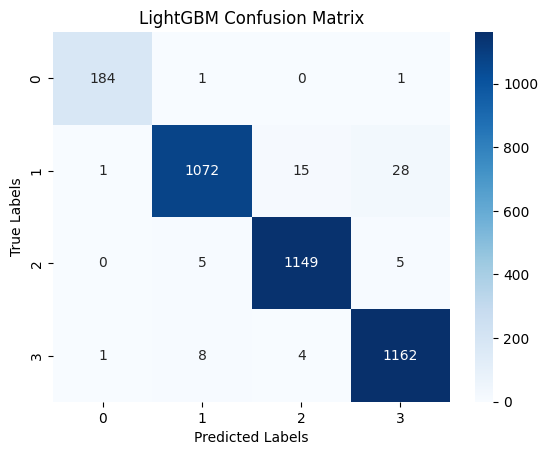

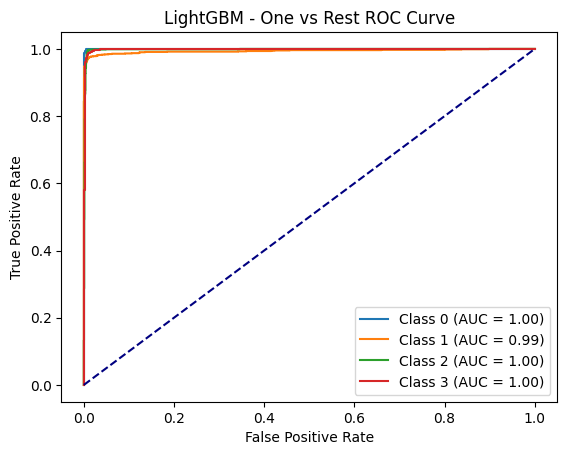

XGBoost AUC values: {0: 0.9999470157394421, 1: 0.9937087529157422, 2: 0.9981096144930253, 3: 0.9988359687724243}
XGBoost Execution Time: 13.582865715026855 seconds
XGBoost Accuracy: 0.9812981298129813
XGBoost 10-Fold Cross-Validation Accuracy: 0.9824379958663911
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       186
           1       0.99      0.96      0.97      1116
           2       0.98      0.99      0.99      1159
           3       0.97      0.99      0.98      1175

    accuracy                           0.98      3636
   macro avg       0.98      0.98      0.98      3636
weighted avg       0.98      0.98      0.98      3636



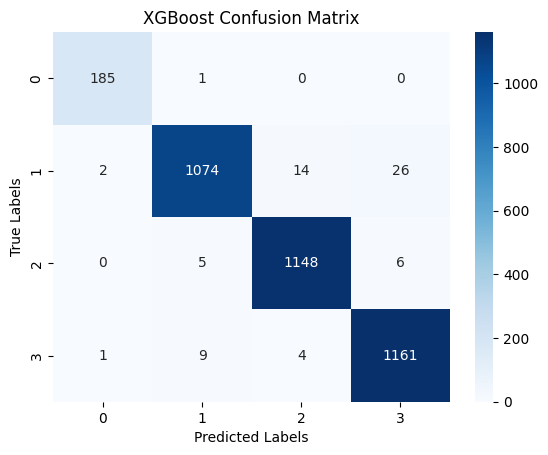

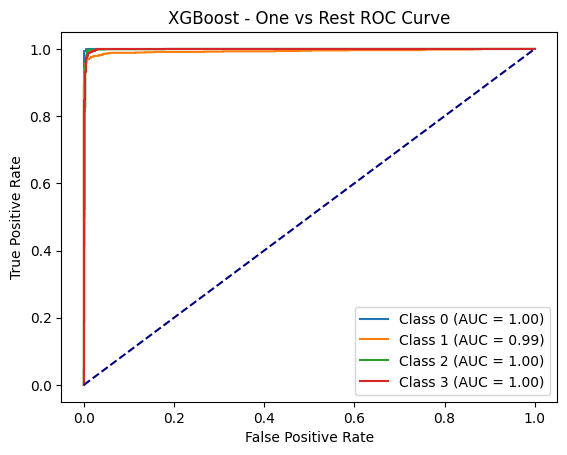

RandomForest AUC values: {0: 0.999823126071373, 1: 0.9942307418785914, 2: 0.9979377137656082, 3: 0.9989851902444086}
RandomForest Execution Time: 76.82625532150269 seconds
RandomForest Accuracy: 0.9782728272827282
RandomForest 10-Fold Cross-Validation Accuracy: 0.9785494032935528
RandomForest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       186
           1       0.99      0.96      0.97      1116
           2       0.98      0.99      0.99      1159
           3       0.97      0.99      0.98      1175

    accuracy                           0.98      3636
   macro avg       0.98      0.98      0.98      3636
weighted avg       0.98      0.98      0.98      3636



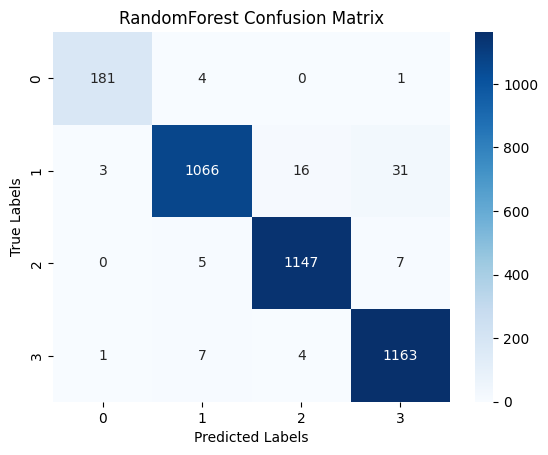

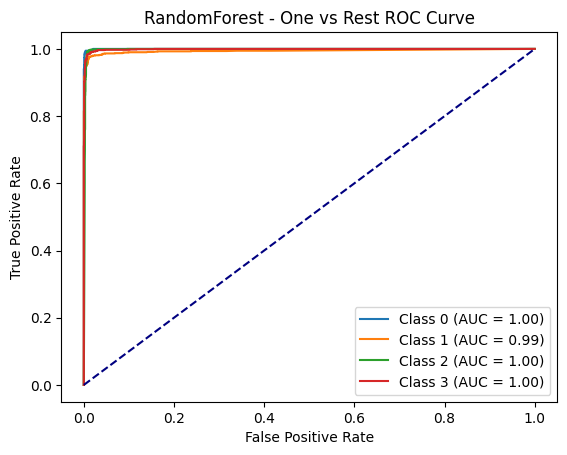

ExtraTrees AUC values: {0: 0.996599657160667, 1: 0.9923778232918018, 2: 0.9956713063027133, 3: 0.9986369491730571}
ExtraTrees Execution Time: 25.30742835998535 seconds
ExtraTrees Accuracy: 0.9796479647964796
ExtraTrees 10-Fold Cross-Validation Accuracy: 0.9767812298597682
ExtraTrees Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       186
           1       0.99      0.96      0.97      1116
           2       0.98      0.99      0.98      1159
           3       0.97      0.99      0.98      1175

    accuracy                           0.98      3636
   macro avg       0.98      0.98      0.98      3636
weighted avg       0.98      0.98      0.98      3636



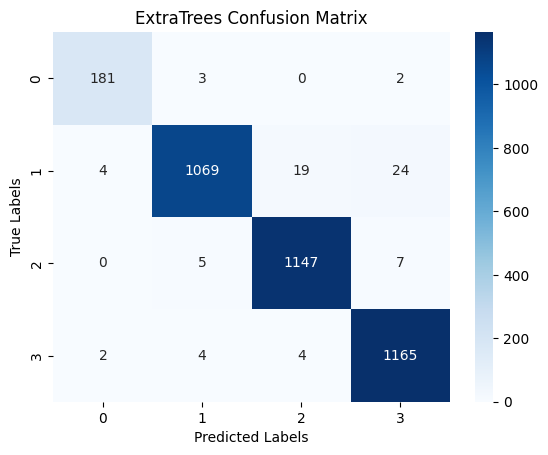

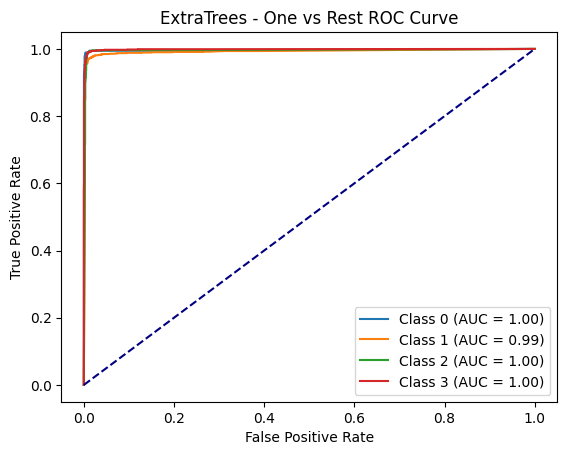

Bagging AUC values: {0: 0.9941810815022596, 1: 0.9940022828127667, 2: 0.9965760928061896, 3: 0.9981119939135622}
Bagging Execution Time: 353.0130889415741 seconds
Bagging Accuracy: 0.9785478547854786
Bagging 10-Fold Cross-Validation Accuracy: 0.9757193535124564
Bagging Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       186
           1       0.99      0.95      0.97      1116
           2       0.98      0.99      0.98      1159
           3       0.97      0.99      0.98      1175

    accuracy                           0.98      3636
   macro avg       0.98      0.98      0.98      3636
weighted avg       0.98      0.98      0.98      3636



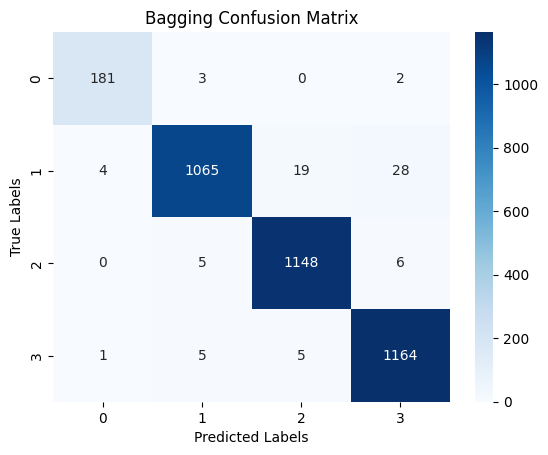

KNeighbors AUC values: {0: 0.9328611500701263, 1: 0.9501959236502248, 2: 0.9722412545722633, 3: 0.9506583554514253}
KNeighbors Execution Time: 3.262181520462036 seconds
KNeighbors Accuracy: 0.8847634763476347
KNeighbors 10-Fold Cross-Validation Accuracy: 0.8866117463386448
KNeighbors Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.72      0.75       186
           1       0.94      0.83      0.88      1116
           2       0.90      0.96      0.93      1159
           3       0.84      0.89      0.86      1175

    accuracy                           0.88      3636
   macro avg       0.86      0.85      0.86      3636
weighted avg       0.89      0.88      0.88      3636



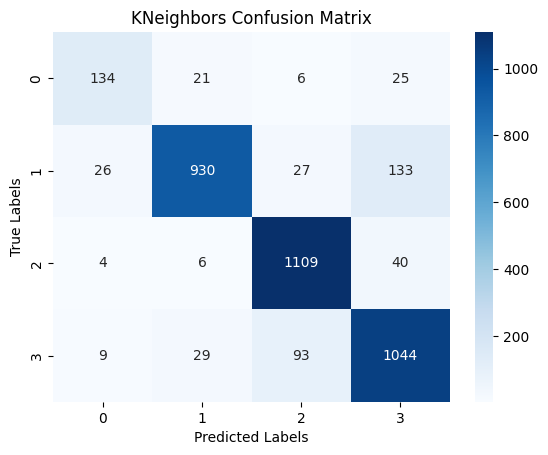

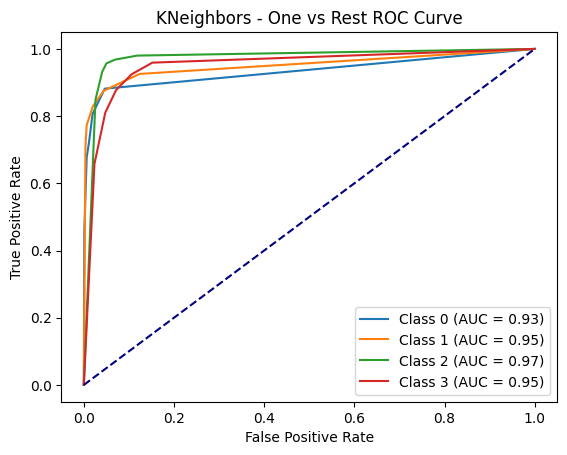

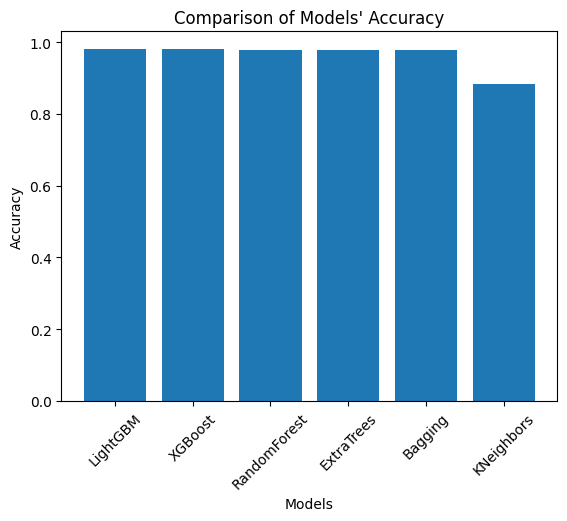

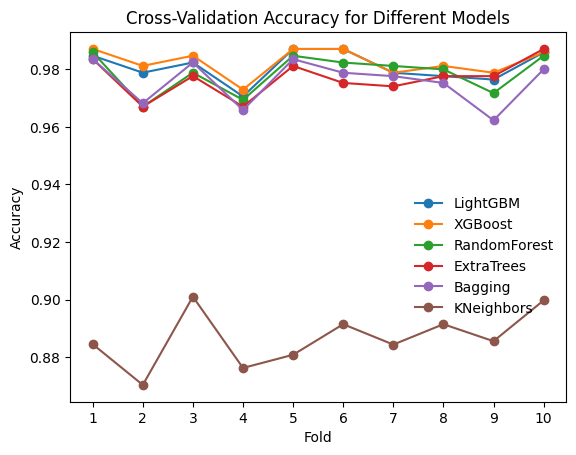

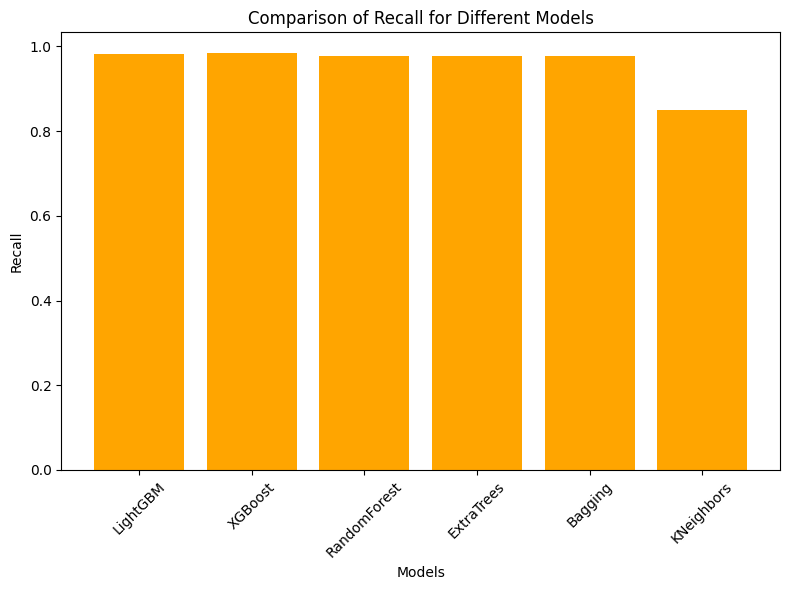

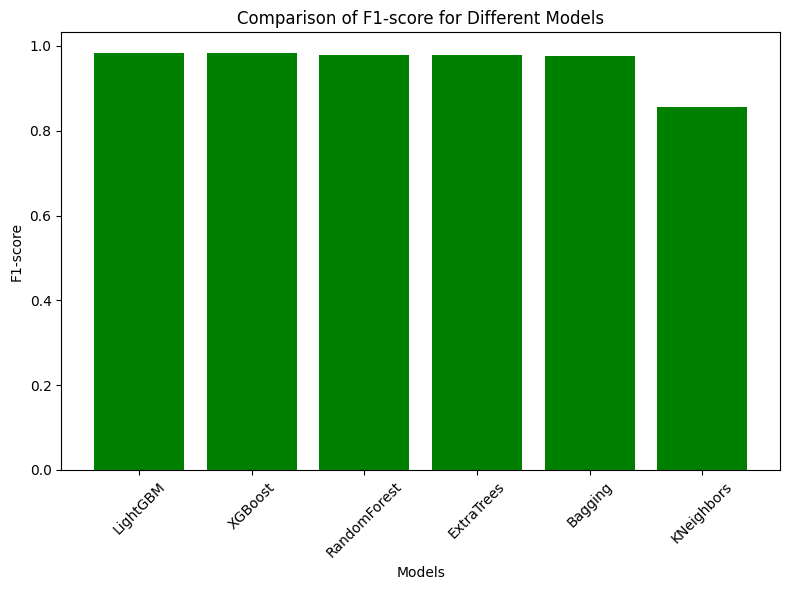

In [54]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc, classification_report, confusion_matrix
import lightgbm as lgb
import xgboost as xgb

# Separate features (X) and the target variable (y)
X = df11.drop('category', axis=1)  # Replace 'category' with the name of your target column
y = df11['category']

# Calculate Information Gain for each feature
info_gain = mutual_info_classif(X, y)

# Get the top 20 features
top_20_indices = np.argsort(info_gain)[-20:]
top_20_features = X.columns[top_20_indices]

# Use only the top 20 features for training and testing
X_selected = X[top_20_features]

# Print the names of the selected features
print("Selected Features:")
for feature_name in top_20_features:
    print(feature_name)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

algorithms = {
    "LightGBM": lgb.LGBMClassifier(verbosity=0),
    "XGBoost": xgb.XGBClassifier(),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "ExtraTrees": ExtraTreesClassifier(n_estimators=100, random_state=42),
    "Bagging": BaggingClassifier(n_estimators=100, random_state=42),
    "KNeighbors": KNeighborsClassifier(),
}

accuracy_values = {}
cv_accuracy_values = {}
auc_values = {}
precision_values = {}
recall_values = {}
f1_score_values = {}

for alg_name, clf in algorithms.items():
    start_time = time.time()

    # Train the classifier using the one-vs-rest approach with selected features
    clf_ovr = OneVsRestClassifier(clf)
    clf_ovr.fit(X_train, y_train)

    # Calculate accuracy
    y_pred = clf_ovr.predict(X_test)
    accuracy = np.mean(y_pred == y_test)
    accuracy_values[alg_name] = accuracy

    # Calculate cross-validation accuracy with 10-fold
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    cross_val_acc = cross_val_score(clf_ovr, X_train, y_train, cv=cv, scoring='accuracy')
    cv_accuracy_values[alg_name] = cross_val_acc

    # Predict probabilities for each class
    y_score = clf_ovr.predict_proba(X_test)

    # Set zero probabilities to a small value to avoid division by zero
    y_score[y_score == 0] = 1e-10

    # Calculate AUC for each class
    auc_values[alg_name] = {}
    for i in range(4):
        y_true = (y_test == i).astype(int)
        auc_values[alg_name][i] = roc_auc_score(y_true, y_score[:, i])

    end_time = time.time()

    # Print AUC values, execution time, and cross-validation accuracy
    print(f"{alg_name} AUC values:", auc_values[alg_name])
    print(f"{alg_name} Execution Time:", end_time - start_time, "seconds")
    print(f"{alg_name} Accuracy:", accuracy)
    print(f"{alg_name} 10-Fold Cross-Validation Accuracy:", np.mean(cv_accuracy_values[alg_name]))

    # Print Classification Report
    print(f"{alg_name} Classification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate Precision, Recall, and F1-score
    precision = np.mean([classification_report(y_test, y_pred, output_dict=True)[str(i)]['precision'] for i in range(4)])
    recall = np.mean([classification_report(y_test, y_pred, output_dict=True)[str(i)]['recall'] for i in range(4)])
    f1_score = np.mean([classification_report(y_test, y_pred, output_dict=True)[str(i)]['f1-score'] for i in range(4)])

    precision_values[alg_name] = precision
    recall_values[alg_name] = recall
    f1_score_values[alg_name] = f1_score

    # Calculate confusion matrix
    y_pred = clf_ovr.predict(X_test)
    confusion = confusion_matrix(y_test, y_pred)

    # Print confusion matrix using a heatmap
    plt.figure()
    sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"{alg_name} Confusion Matrix")
    plt.show()

    # Plot ROC curve
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(4):
        y_true = (y_test == i).astype(int)
        fpr[i], tpr[i], _ = roc_curve(y_true, y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    for i in range(4):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{alg_name} - One vs Rest ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

# Comparison graph 1: Models' Accuracy
plt.figure()
plt.bar(accuracy_values.keys(), accuracy_values.values())
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Models\' Accuracy')
plt.xticks(rotation=45)  # Rotate the x-axis labels to avoid overlapping
plt.show()

# Comparison graph 2: Cross-Validation Accuracy
plt.figure()
for alg_name, accuracy_scores in cv_accuracy_values.items():
    plt.plot(range(1, 11), accuracy_scores, marker='o', label=alg_name)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy for Different Models')
legend = plt.legend(loc='lower right', bbox_to_anchor=(1, 0.2), frameon=False)
plt.xticks(range(1, 11))  # Set explicit x-axis ticks
plt.show()

# Comparison graph 3: Macro Average AUC
plt.figure()
for alg_name, roc_auc in auc_values.items():
    macro_auc = np.mean(list(roc_auc.values()))
    plt.scatter(alg_name, macro_auc, marker='o', label=f'{alg_name} (Macro-Average AUC = {macro_auc:.2f})')
plt.xlabel('Models')
plt.ylabel('Macro Average AUC')
plt.title('Macro Average AUC for Different Models')
legend = plt.legend(loc='lower right', bbox_to_anchor=(1, 0.2), frameon=False)  # Adjust the values as needed

plt.xticks(rotation=45)  # Rotate the x-axis labels to avoid overlapping
plt.show()

# Comparison graph 4: Precision
plt.figure(figsize=(8, 6))
plt.bar(algorithms.keys(), precision_values.values())
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Comparison of Precision for Different Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Comparison graph 5: Recall
plt.figure(figsize=(8, 6))
plt.bar(algorithms.keys(), recall_values.values(), color='orange')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Comparison of Recall for Different Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Comparison graph 6: F1-score
plt.figure(figsize=(8, 6))
plt.bar(algorithms.keys(), f1_score_values.values(), color='green')
plt.xlabel('Models')
plt.ylabel('F1-score')
plt.title('Comparison of F1-score for Different Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## **3. Information Gain**
**Top 20 Features and 80:20 for traning and testing ration.**

Selected Features:
gasPrice_Out
max_value_In
Tnx_fee_Out
Total_Success_Tnx
value_In
distinct_address
Avg_value_Out
Avg_value_In
First_Tnx_Value
Per_Tnx_In
Per_Tnx_Out
max_value_Out
value_Out
Last_Tnx_Time
gasUsed_Out
gasUsed_In
Tnx_fee
Avg_gasUsed_In
Avg_gasUsed_Out
First_Tnx_Time
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM AUC values: {0: 0.9999272833042466, 1: 0.992082023183172, 2: 0.9971846966634754, 3: 0.997875725247988}
LightGBM Execution Time: 17.827748775482178 seconds
LightGBM Accuracy: 0.9834983498349835
LightGBM 10-Fold Cross-Validation Accuracy: 0.9822600619195047
LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       132
           1       0.99      0.97      0.98       747
           2       0.99      0.99      0.99       765
           3       0.98      0.99      0.98       780

    accuracy                           0.98      2424
   macro avg       0

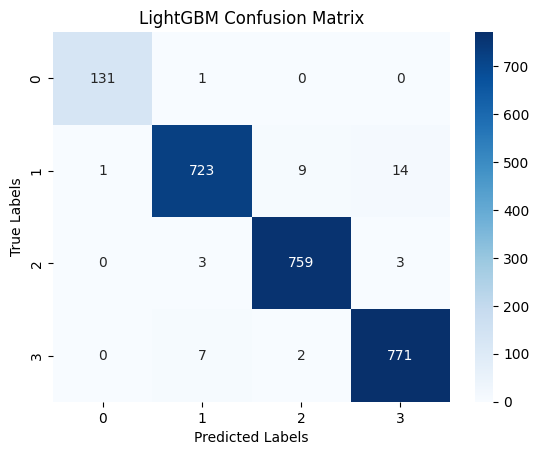

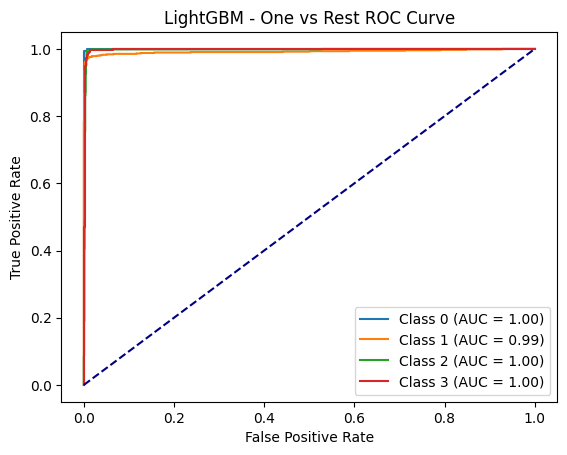

XGBoost AUC values: {0: 0.9999636416521234, 1: 0.9922472637518869, 2: 0.9973556792618594, 3: 0.998565880591428}
XGBoost Execution Time: 16.41641068458557 seconds
XGBoost Accuracy: 0.9834983498349835
XGBoost 10-Fold Cross-Validation Accuracy: 0.9827758450097347
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       132
           1       0.99      0.97      0.98       747
           2       0.99      0.99      0.99       765
           3       0.98      0.99      0.98       780

    accuracy                           0.98      2424
   macro avg       0.98      0.99      0.98      2424
weighted avg       0.98      0.98      0.98      2424



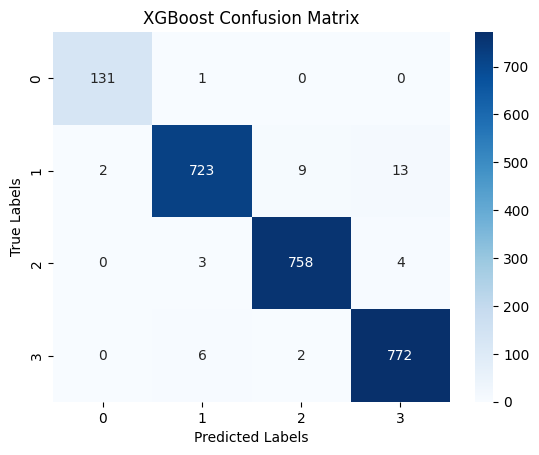

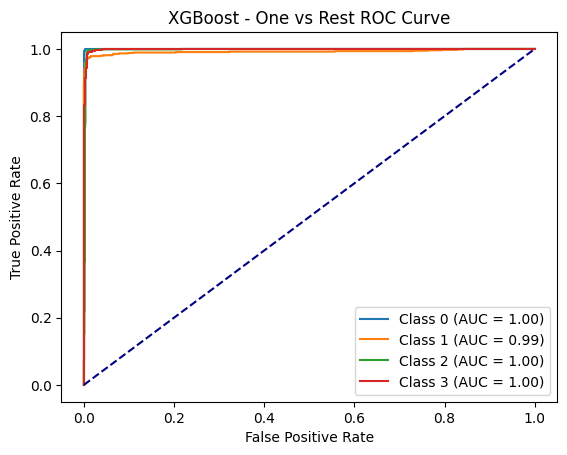

RandomForest AUC values: {0: 0.9997173964778677, 1: 0.9933472710160857, 2: 0.9977315258030076, 3: 0.9986489331836048}
RandomForest Execution Time: 90.22890019416809 seconds
RandomForest Accuracy: 0.9801980198019802
RandomForest 10-Fold Cross-Validation Accuracy: 0.9785467002861914
RandomForest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       132
           1       0.98      0.96      0.97       747
           2       0.99      0.99      0.99       765
           3       0.97      0.99      0.98       780

    accuracy                           0.98      2424
   macro avg       0.98      0.98      0.98      2424
weighted avg       0.98      0.98      0.98      2424



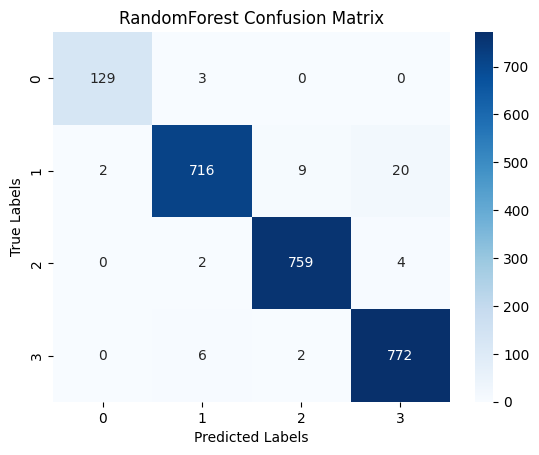

ExtraTrees AUC values: {0: 0.9994678459992596, 1: 0.9915376073963913, 2: 0.9965161310656471, 3: 0.99915660677522}
ExtraTrees Execution Time: 28.26284670829773 seconds
ExtraTrees Accuracy: 0.9806105610561056
ExtraTrees 10-Fold Cross-Validation Accuracy: 0.978031023586863
ExtraTrees Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       132
           1       0.99      0.96      0.97       747
           2       0.98      0.99      0.99       765
           3       0.98      0.99      0.98       780

    accuracy                           0.98      2424
   macro avg       0.98      0.98      0.98      2424
weighted avg       0.98      0.98      0.98      2424



Bagging AUC values: {0: 0.9997983764345021, 1: 0.9929126164766399, 2: 0.995781378655541, 3: 0.9974858069748581}
Bagging Execution Time: 419.3011894226074 seconds
Bagging Accuracy: 0.981023102310231
Bagging 10-Fold Cross-Validation Accuracy: 0.9757611737044247
Bagging Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       132
           1       0.99      0.96      0.97       747
           2       0.98      0.99      0.99       765
           3       0.97      0.99      0.98       780

    accuracy                           0.98      2424
   macro avg       0.98      0.98      0.98      2424
weighted avg       0.98      0.98      0.98      2424



KNeighbors AUC values: {0: 0.9491098815378921, 1: 0.9508030132855013, 2: 0.9766459044940057, 3: 0.9540754257907543}
KNeighbors Execution Time: 4.528522491455078 seconds
KNeighbors Accuracy: 0.8898514851485149
KNeighbors 10-Fold Cross-Validation Accuracy: 0.8921177108933644
KNeighbors Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       132
           1       0.95      0.83      0.88       747
           2       0.90      0.96      0.93       765
           3       0.85      0.89      0.87       780

    accuracy                           0.89      2424
   macro avg       0.87      0.87      0.87      2424
weighted avg       0.89      0.89      0.89      2424



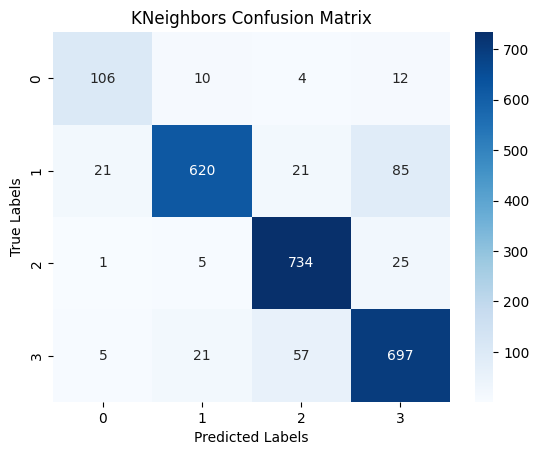

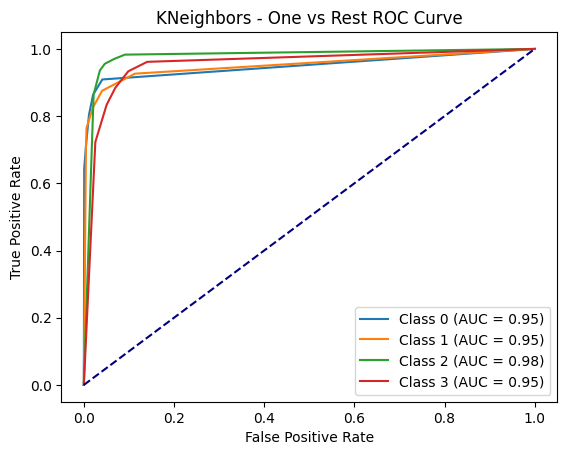

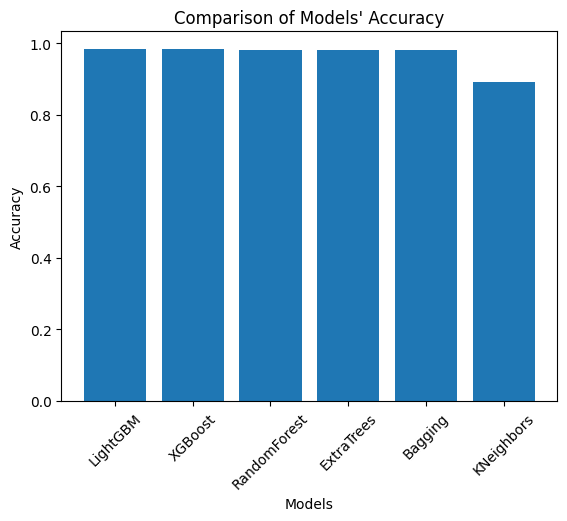

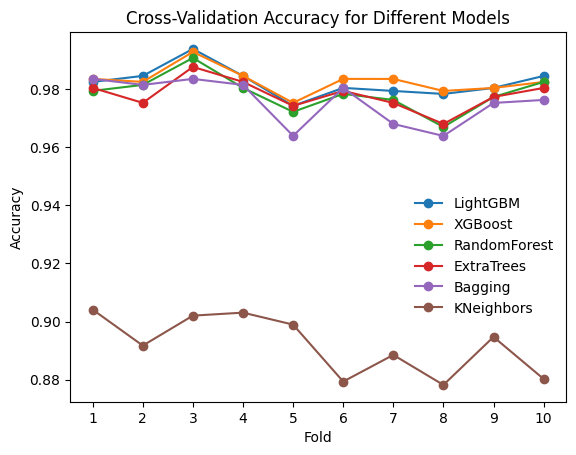

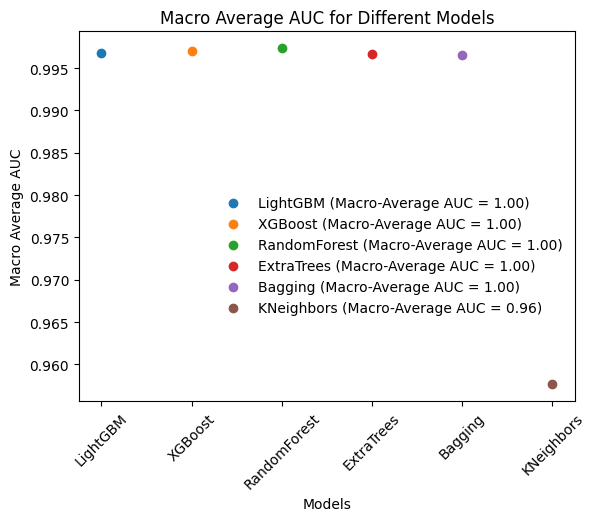

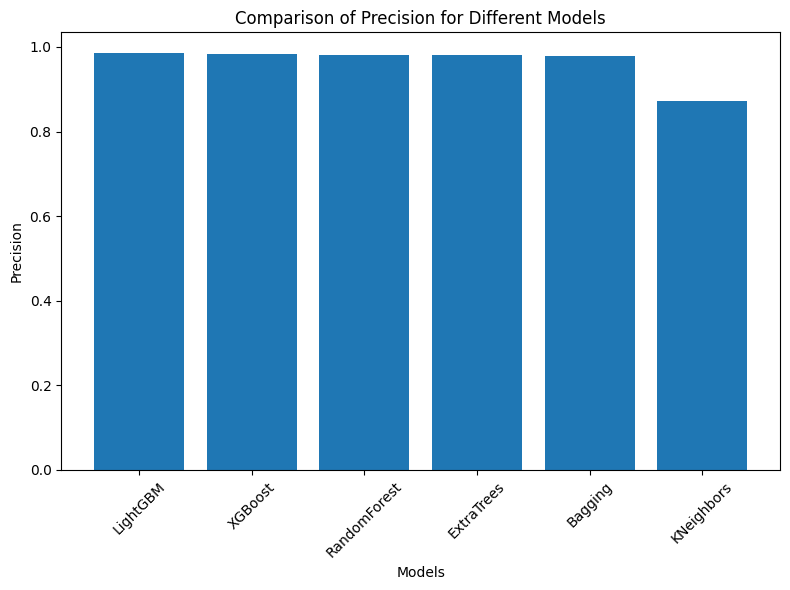

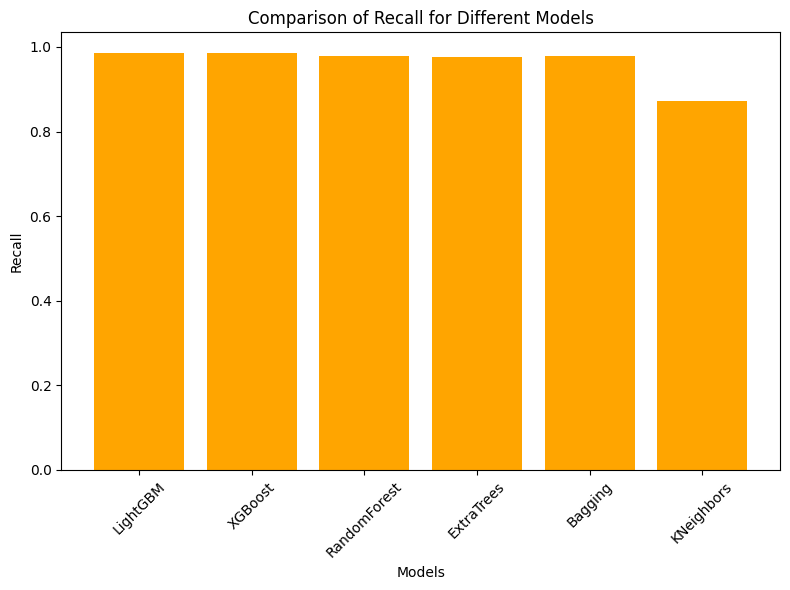

In [55]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc, classification_report, confusion_matrix
import lightgbm as lgb
import xgboost as xgb

# Separate features (X) and the target variable (y)
X = df11.drop('category', axis=1)  # Replace 'category' with the name of your target column
y = df11['category']

# Calculate Information Gain for each feature
info_gain = mutual_info_classif(X, y)

# Get the top 20 features
top_20_indices = np.argsort(info_gain)[-20:]
top_20_features = X.columns[top_20_indices]

# Use only the top 20 features for training and testing
X_selected = X[top_20_features]

# Print the names of the selected features
print("Selected Features:")
for feature_name in top_20_features:
    print(feature_name)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

algorithms = {
    "LightGBM": lgb.LGBMClassifier(verbosity=0),
    "XGBoost": xgb.XGBClassifier(),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "ExtraTrees": ExtraTreesClassifier(n_estimators=100, random_state=42),
    "Bagging": BaggingClassifier(n_estimators=100, random_state=42),
    "KNeighbors": KNeighborsClassifier(),
}

accuracy_values = {}
cv_accuracy_values = {}
auc_values = {}
precision_values = {}
recall_values = {}
f1_score_values = {}

for alg_name, clf in algorithms.items():
    start_time = time.time()

    # Train the classifier using the one-vs-rest approach with selected features
    clf_ovr = OneVsRestClassifier(clf)
    clf_ovr.fit(X_train, y_train)

    # Calculate accuracy
    y_pred = clf_ovr.predict(X_test)
    accuracy = np.mean(y_pred == y_test)
    accuracy_values[alg_name] = accuracy

    # Calculate cross-validation accuracy with 10-fold
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    cross_val_acc = cross_val_score(clf_ovr, X_train, y_train, cv=cv, scoring='accuracy')
    cv_accuracy_values[alg_name] = cross_val_acc

    # Predict probabilities for each class
    y_score = clf_ovr.predict_proba(X_test)

    # Set zero probabilities to a small value to avoid division by zero
    y_score[y_score == 0] = 1e-10

    # Calculate AUC for each class
    auc_values[alg_name] = {}
    for i in range(4):
        y_true = (y_test == i).astype(int)
        auc_values[alg_name][i] = roc_auc_score(y_true, y_score[:, i])

    end_time = time.time()

    # Print AUC values, execution time, and cross-validation accuracy
    print(f"{alg_name} AUC values:", auc_values[alg_name])
    print(f"{alg_name} Execution Time:", end_time - start_time, "seconds")
    print(f"{alg_name} Accuracy:", accuracy)
    print(f"{alg_name} 10-Fold Cross-Validation Accuracy:", np.mean(cv_accuracy_values[alg_name]))

    # Print Classification Report
    print(f"{alg_name} Classification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate Precision, Recall, and F1-score
    precision = np.mean([classification_report(y_test, y_pred, output_dict=True)[str(i)]['precision'] for i in range(4)])
    recall = np.mean([classification_report(y_test, y_pred, output_dict=True)[str(i)]['recall'] for i in range(4)])
    f1_score = np.mean([classification_report(y_test, y_pred, output_dict=True)[str(i)]['f1-score'] for i in range(4)])

    precision_values[alg_name] = precision
    recall_values[alg_name] = recall
    f1_score_values[alg_name] = f1_score

    # Calculate confusion matrix
    y_pred = clf_ovr.predict(X_test)
    confusion = confusion_matrix(y_test, y_pred)

    # Print confusion matrix using a heatmap
    plt.figure()
    sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"{alg_name} Confusion Matrix")
    plt.show()

    # Plot ROC curve
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(4):
        y_true = (y_test == i).astype(int)
        fpr[i], tpr[i], _ = roc_curve(y_true, y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    for i in range(4):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{alg_name} - One vs Rest ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

# Comparison graph 1: Models' Accuracy
plt.figure()
plt.bar(accuracy_values.keys(), accuracy_values.values())
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Models\' Accuracy')
plt.xticks(rotation=45)  # Rotate the x-axis labels to avoid overlapping
plt.show()

# Comparison graph 2: Cross-Validation Accuracy
plt.figure()
for alg_name, accuracy_scores in cv_accuracy_values.items():
    plt.plot(range(1, 11), accuracy_scores, marker='o', label=alg_name)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy for Different Models')
legend = plt.legend(loc='lower right', bbox_to_anchor=(1, 0.2), frameon=False)
plt.xticks(range(1, 11))  # Set explicit x-axis ticks
plt.show()

# Comparison graph 3: Macro Average AUC
plt.figure()
for alg_name, roc_auc in auc_values.items():
    macro_auc = np.mean(list(roc_auc.values()))
    plt.scatter(alg_name, macro_auc, marker='o', label=f'{alg_name} (Macro-Average AUC = {macro_auc:.2f})')
plt.xlabel('Models')
plt.ylabel('Macro Average AUC')
plt.title('Macro Average AUC for Different Models')
legend = plt.legend(loc='lower right', bbox_to_anchor=(1, 0.2), frameon=False)  # Adjust the values as needed

plt.xticks(rotation=45)  # Rotate the x-axis labels to avoid overlapping
plt.show()

# Comparison graph 4: Precision
plt.figure(figsize=(8, 6))
plt.bar(algorithms.keys(), precision_values.values())
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Comparison of Precision for Different Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Comparison graph 5: Recall
plt.figure(figsize=(8, 6))
plt.bar(algorithms.keys(), recall_values.values(), color='orange')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Comparison of Recall for Different Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Comparison graph 6: F1-score
plt.figure(figsize=(8, 6))
plt.bar(algorithms.keys(), f1_score_values.values(), color='green')
plt.xlabel('Models')
plt.ylabel('F1-score')
plt.title('Comparison of F1-score for Different Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
